Loading mask: /Volumes/advent/test/LS011/LS011_R_Multifidus_MASK.nii
Loading mask: /Volumes/advent/test/LS011/LS011_R_ES_MASK.nii
Loading mask: /Volumes/advent/test/LS011/LS011_L_Multifidus_MASK.nii
Loading mask: /Volumes/advent/test/LS011/LS011_L_ES_MASK.nii

=== Loading IDEAL (main) from /Volumes/advent/test/LS011/LS011_S1_IDEAL.nii ===
Visualizing IDEAL (main) slices 10 to 12 with overlay...


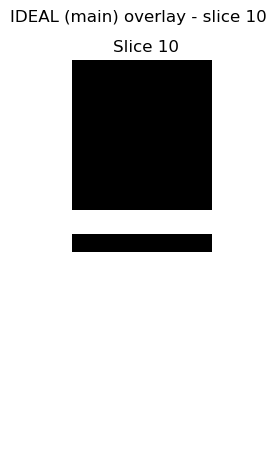

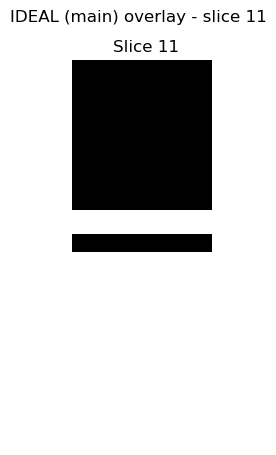

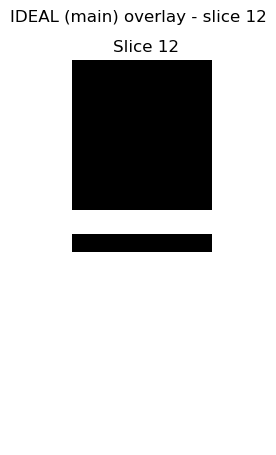


=== Loading IDEALWater from /Volumes/advent/test/LS011/LS011_IDEALWater.nii ===
Visualizing IDEALWater slices 10 to 12 with overlay...


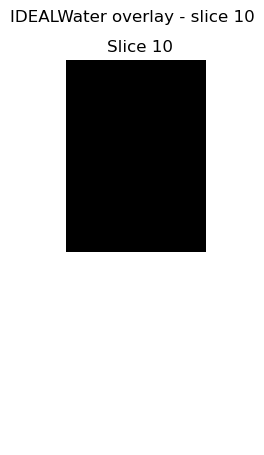

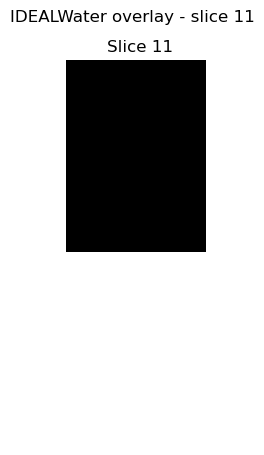

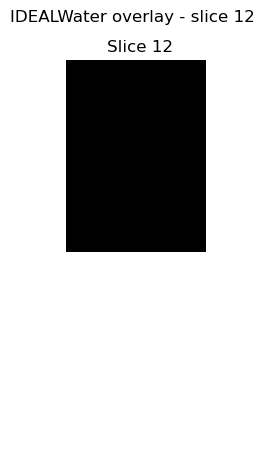


=== Loading IDEALFat from /Volumes/advent/test/LS011/LS011_IDEALFat.nii ===
Visualizing IDEALFat slices 10 to 12 with overlay...


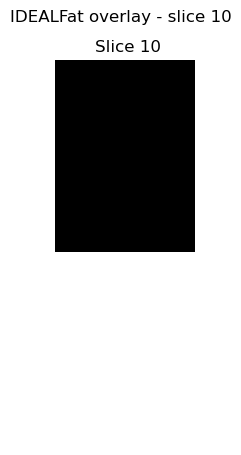

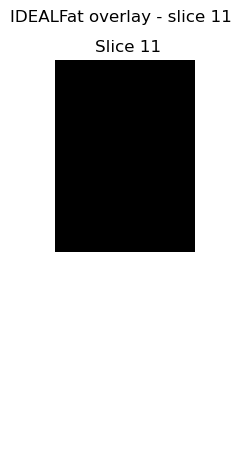

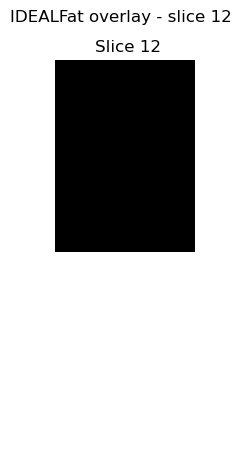


=== Visualizing each mask separately (no background image) ===
Showing masks from slice 10 to 12


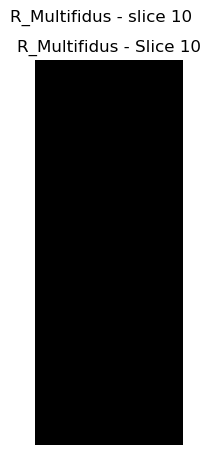

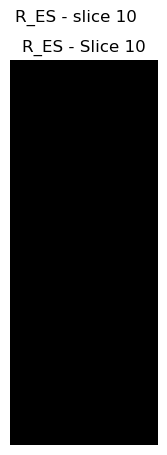

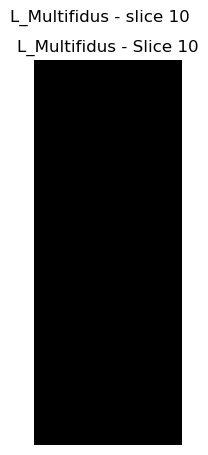

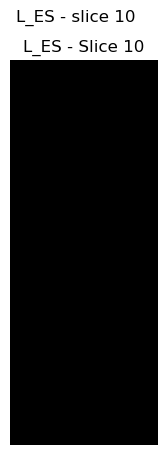

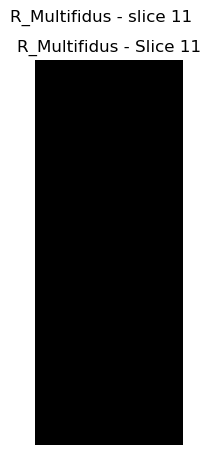

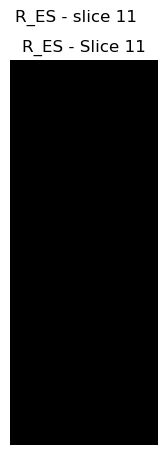

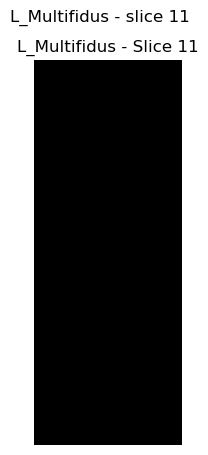

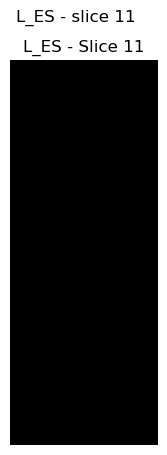

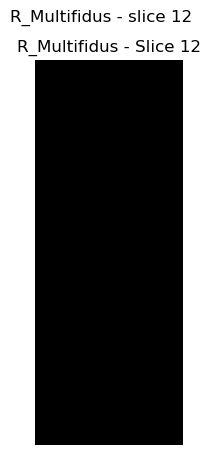

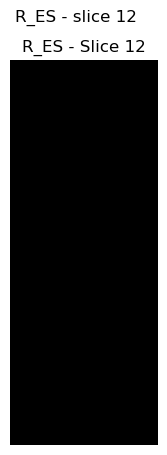

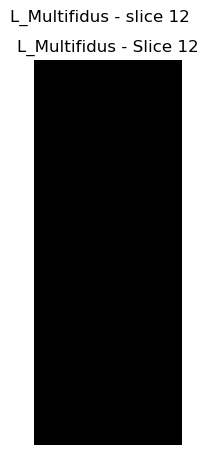

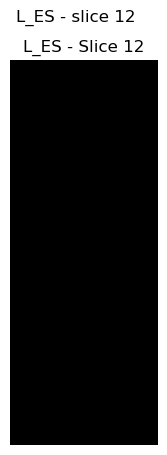


Done!


In [10]:
###############################
# Configuration / Parameters  #
###############################

# Subject ID
subject_id = "LS011"

# Folder containing the .nii files
base_dir = "/Volumes/advent/test"

# Slice range to visualize (inclusive of start, exclusive of end)
start_slice = 10
end_slice   = 13

# Whether to show each image (IDEAL, Water, Fat)
show_ideal       = True
show_ideal_water = True
show_ideal_fat   = True

# If True, will additionally show each mask by itself (no underlying image)
show_masks_separately = True

###############################
# Imports & Setup            #
###############################

import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Increase figure size in Jupyter if desired
plt.rcParams["figure.figsize"] = (6,5)

###############################
# Define file paths           #
###############################
# Example naming: LS003_S1_IDEAL.nii, LS003_IDEALWater.nii, LS003_IDEALFat.nii
# and LS003_R_Multifidus.nii, LS003_R_ES.nii, LS003_L_Multifidus.nii, LS003_L_ES.nii

subject_folder = os.path.join(base_dir, subject_id)

ideal_path       = os.path.join(subject_folder, f"{subject_id}_S1_IDEAL.nii")
ideal_water_path = os.path.join(subject_folder, f"{subject_id}_IDEALWater.nii")
ideal_fat_path   = os.path.join(subject_folder, f"{subject_id}_IDEALFat.nii")

mask_paths = {
    "R_Multifidus": os.path.join(subject_folder, f"{subject_id}_R_Multifidus_MASK.nii"),
    "R_ES":         os.path.join(subject_folder, f"{subject_id}_R_ES_MASK.nii"),
    "L_Multifidus": os.path.join(subject_folder, f"{subject_id}_L_Multifidus_MASK.nii"),
    "L_ES":         os.path.join(subject_folder, f"{subject_id}_L_ES_MASK.nii"),
}

###############################
# Load data helper            #
###############################

def load_nifti_volume(filepath):
    """
    Load a NIfTI file from 'filepath' into a NumPy array of shape (D,H,W).
    """
    if not os.path.isfile(filepath):
        raise FileNotFoundError(f"Cannot find file: {filepath}")
    nii = nib.load(filepath)
    data = nii.get_fdata()  # float64
    return np.asarray(data)

###############################
# Visualization functions     #
###############################

def visualize_overlay_slice(image_data, masks_dict, slice_idx):
    """
    Visualize one slice of 'image_data' with multiple masks overlaid.
    """
    # You can customize these colors:
    mask_colors = {
        "R_Multifidus": "yellow",
        "R_ES":         "blue",
        "L_Multifidus": "green",
        "L_ES":         "red",
    }

    plt.imshow(image_data[slice_idx], cmap="gray", interpolation="none")
    for mname, mvol in masks_dict.items():
        color = mask_colors.get(mname, "magenta")
        cmap = ListedColormap(["none", color])
        plt.imshow(mvol[slice_idx], cmap=cmap, alpha=0.4, interpolation="none")

    plt.title(f"Slice {slice_idx}")
    plt.axis("off")
    plt.show()

def visualize_mask_slice(mask_data, slice_idx, mask_name):
    """
    Visualize one mask by itself (no underlying image).
    """
    color = "white"  # or any color you like
    # If you want different colors per mask, you could do a dict like above.
    cmap = ListedColormap(["black", color])

    plt.imshow(mask_data[slice_idx], cmap=cmap, interpolation="none")
    plt.title(f"{mask_name} - Slice {slice_idx}")
    plt.axis("off")
    plt.show()


###############################
# Load and Visualize          #
###############################

# 1) Load the four masks into memory
masks_dict = {}
for mname, mpath in mask_paths.items():
    if os.path.isfile(mpath):
        print(f"Loading mask: {mpath}")
        masks_dict[mname] = load_nifti_volume(mpath)
    else:
        print(f"Warning: Could not find mask file {mpath}. Skipping.")

# 2) Decide which images to load/visualize
images_to_show = []
if show_ideal:
    images_to_show.append(("IDEAL (main)", ideal_path))
if show_ideal_water:
    images_to_show.append(("IDEALWater", ideal_water_path))
if show_ideal_fat:
    images_to_show.append(("IDEALFat", ideal_fat_path))

# 3) Loop through each chosen image, load it, then visualize
for label, image_path in images_to_show:
    print(f"\n=== Loading {label} from {image_path} ===")
    try:
        img_data = load_nifti_volume(image_path)
    except FileNotFoundError as e:
        print(e)
        continue

    depth = img_data.shape[0]
    # Check slice range
    if end_slice > depth:
        print(f"end_slice {end_slice} is beyond volume depth {depth}, adjusting.")
        end_slice = depth
    if start_slice >= depth:
        print(f"start_slice {start_slice} is outside volume depth {depth}, no slices to show.")
        continue

    print(f"Visualizing {label} slices {start_slice} to {end_slice-1} with overlay...")
    for slice_idx in range(start_slice, end_slice):
        plt.figure(figsize=(6,5))
        plt.suptitle(f"{label} overlay - slice {slice_idx}")
        visualize_overlay_slice(img_data, masks_dict, slice_idx)

# 4) Optionally visualize each mask separately in the same slice range
if show_masks_separately and masks_dict:
    print("\n=== Visualizing each mask separately (no background image) ===")
    # We'll pick a representative 'depth' from any loaded mask
    some_mask_data = next(iter(masks_dict.values()))
    mask_depth = some_mask_data.shape[0]

    # Adjust slice range if needed
    max_slice = min(mask_depth, end_slice)
    if start_slice >= mask_depth:
        print(f"start_slice {start_slice} is outside mask depth {mask_depth}, skipping mask display.")
    else:
        print(f"Showing masks from slice {start_slice} to {max_slice-1}")
        for slice_idx in range(start_slice, max_slice):
            for mname, mvol in masks_dict.items():
                plt.figure(figsize=(6,5))
                plt.suptitle(f"{mname} - slice {slice_idx}")
                visualize_mask_slice(mvol, slice_idx, mname)

print("\nDone!")


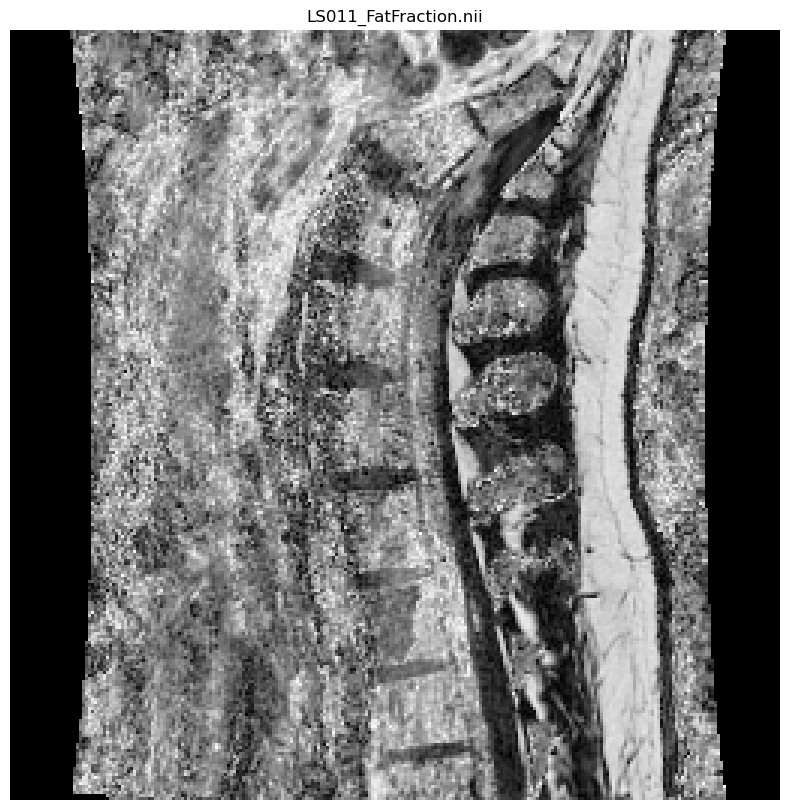

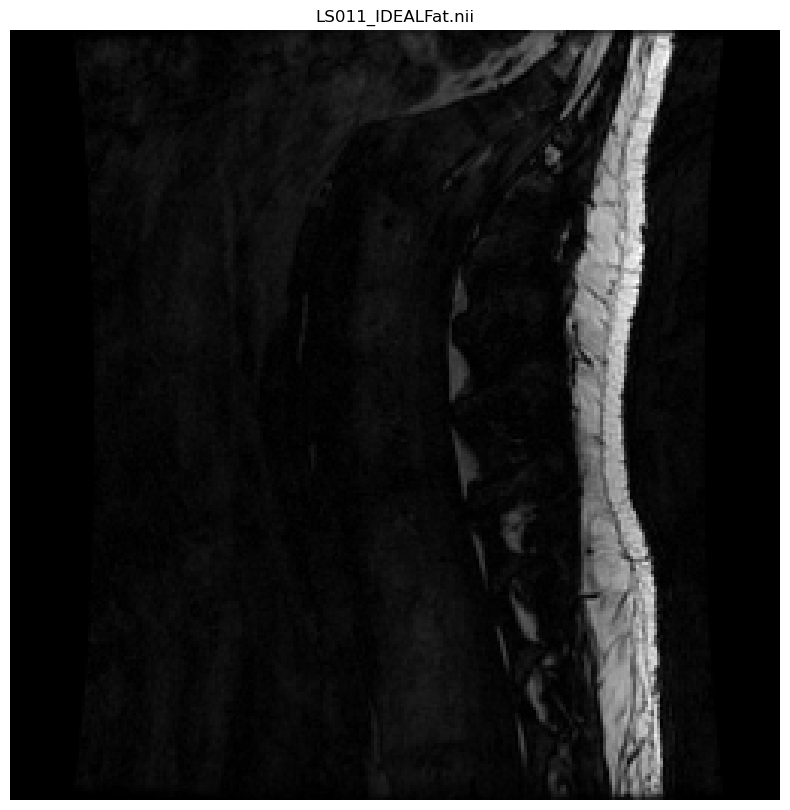

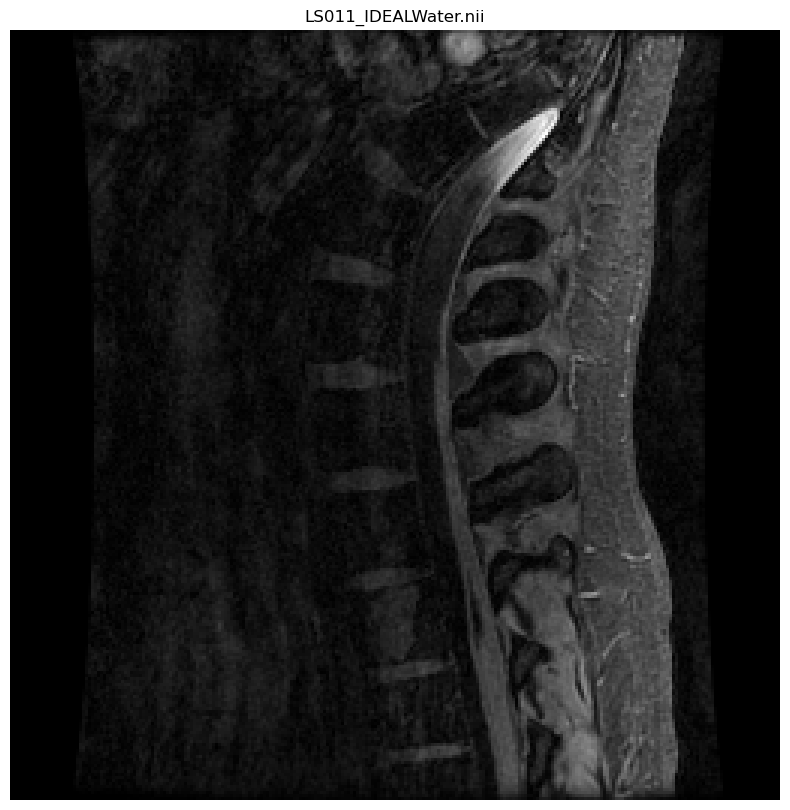

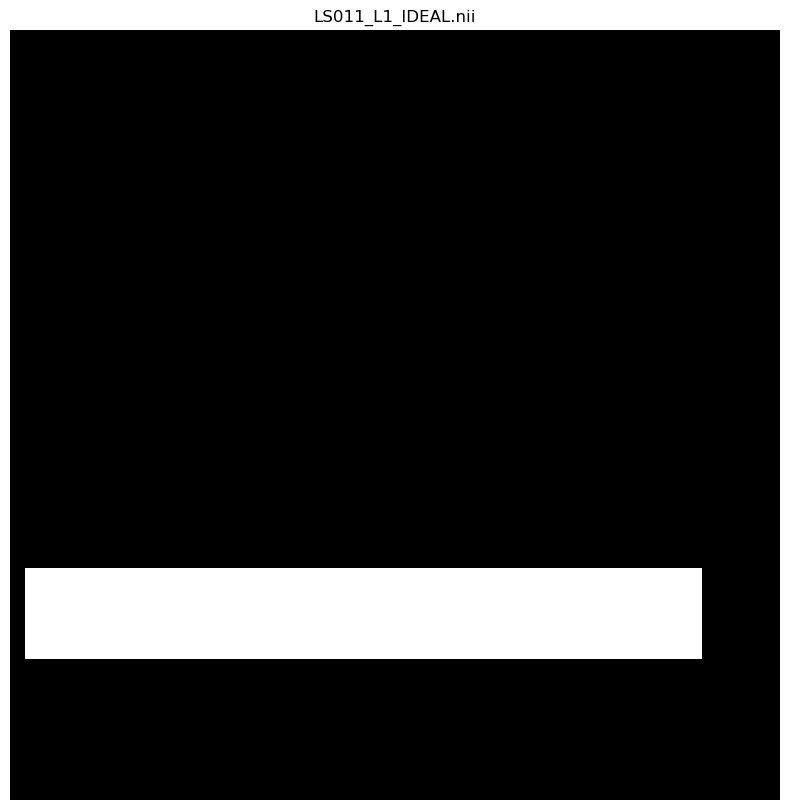

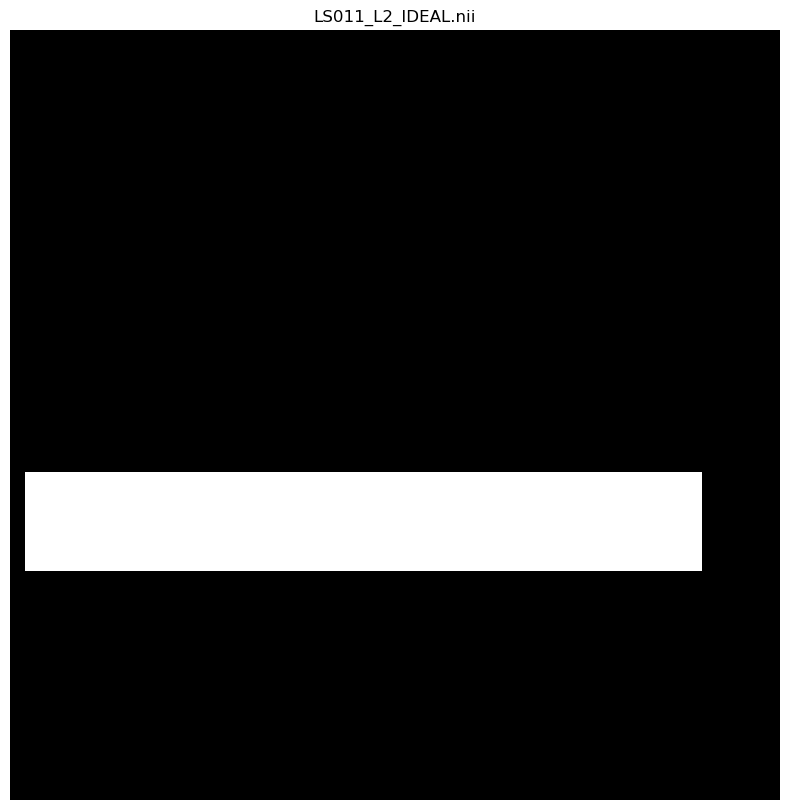

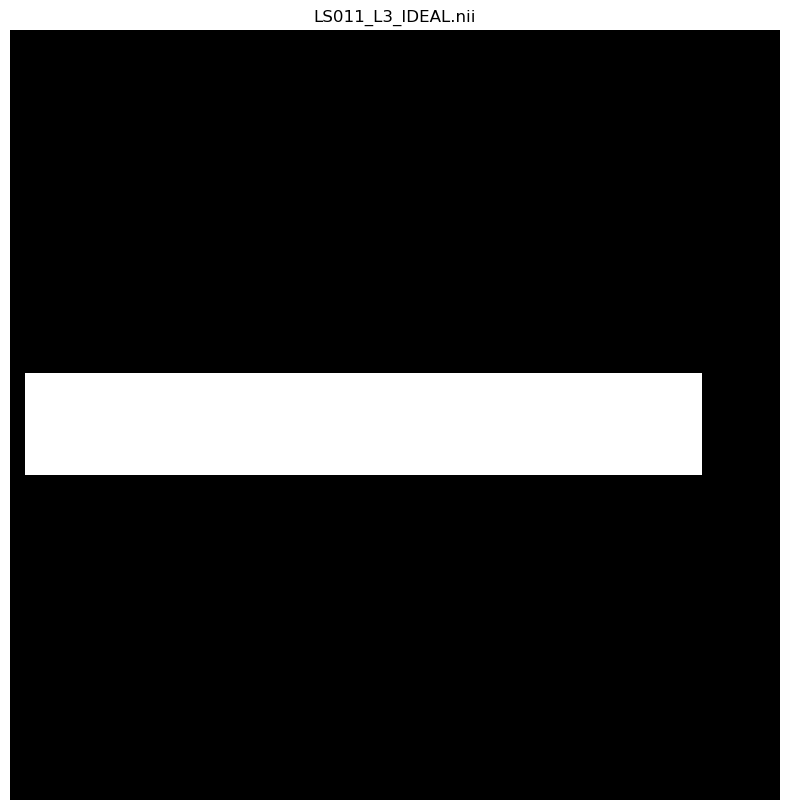

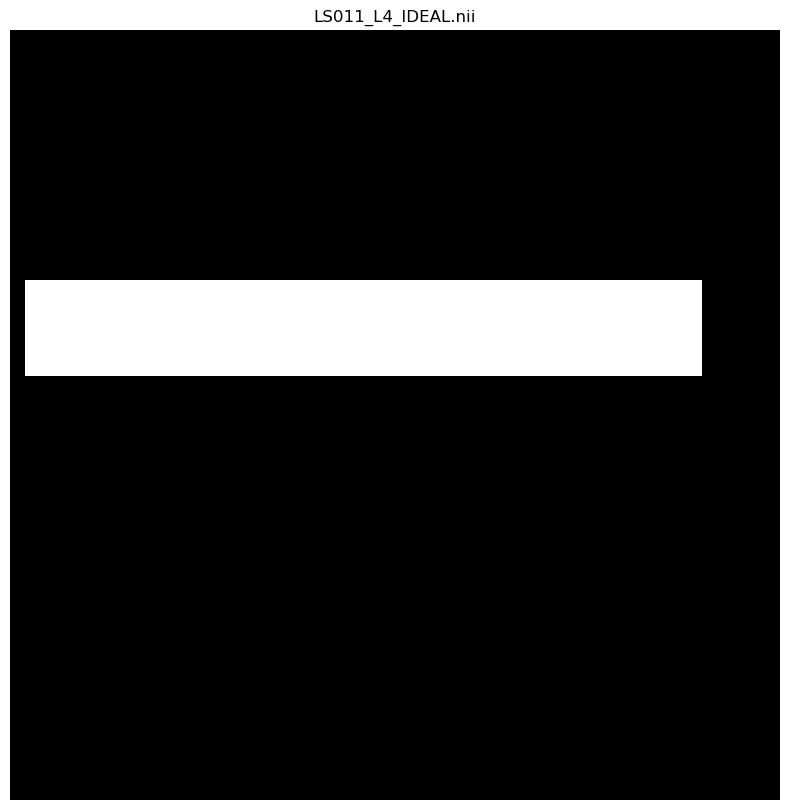

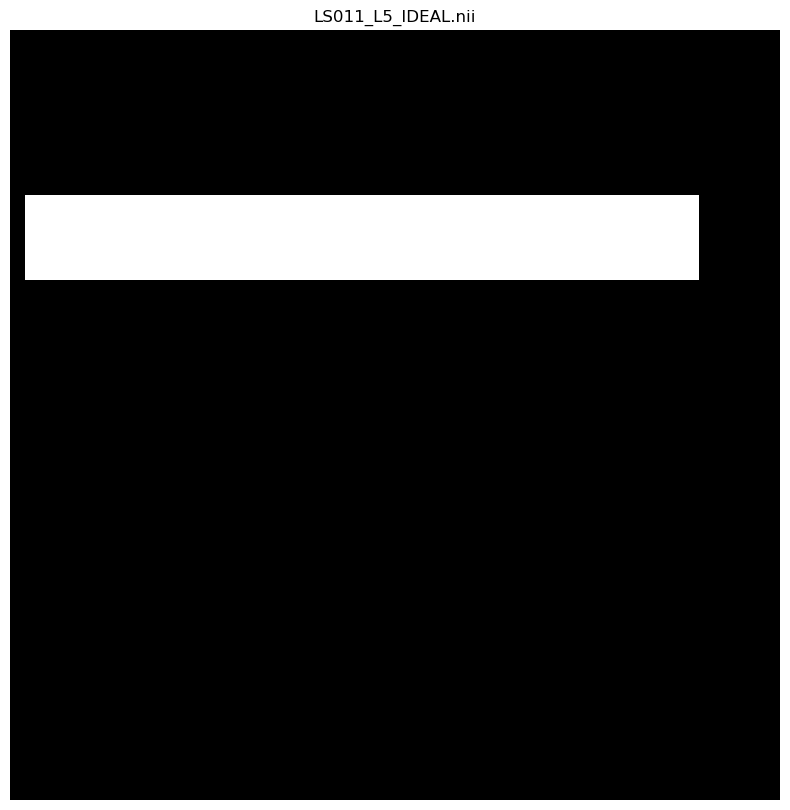

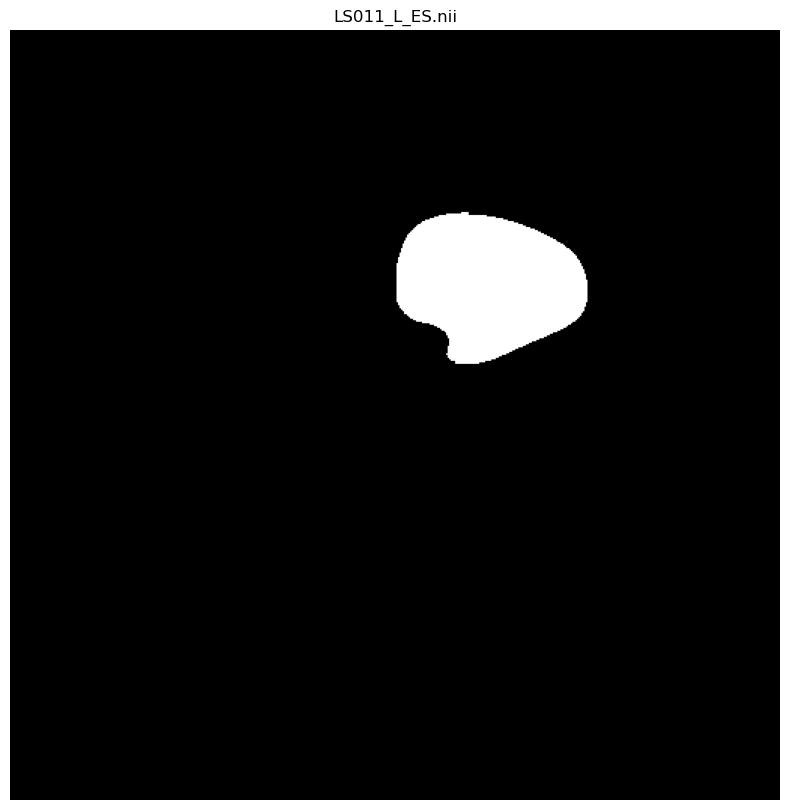

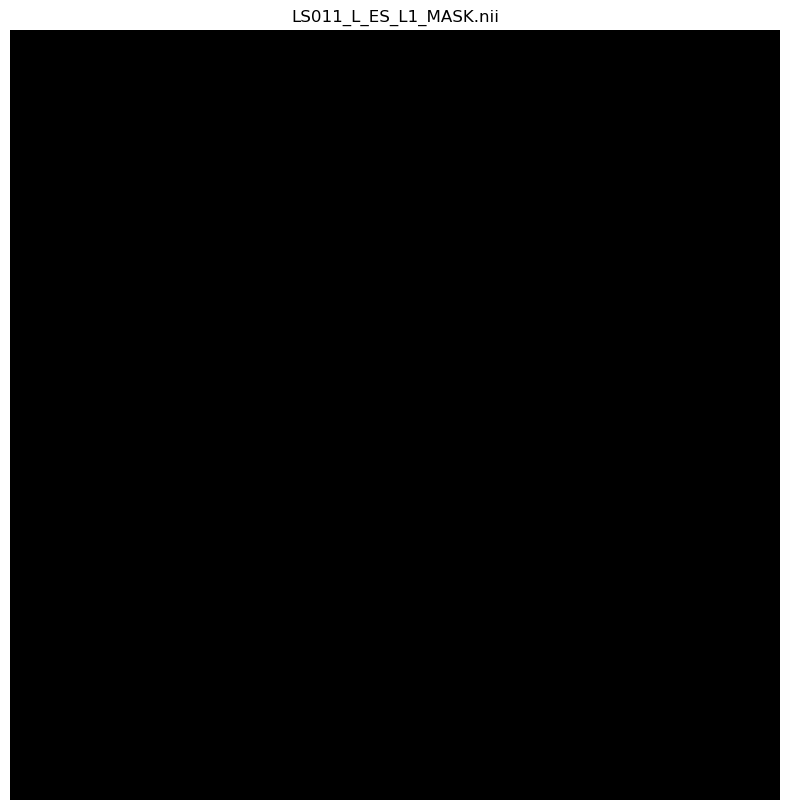

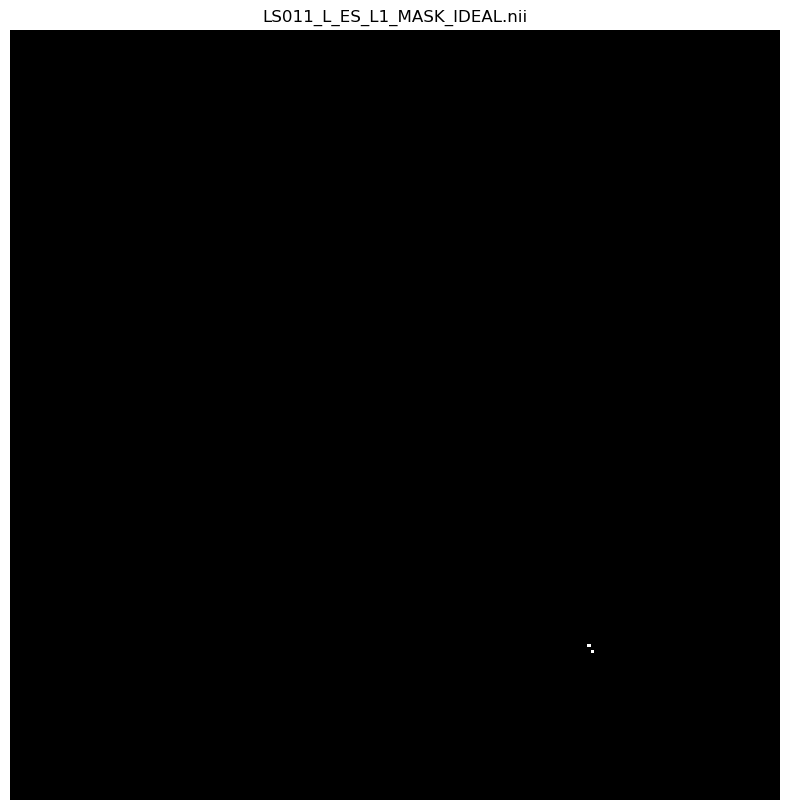

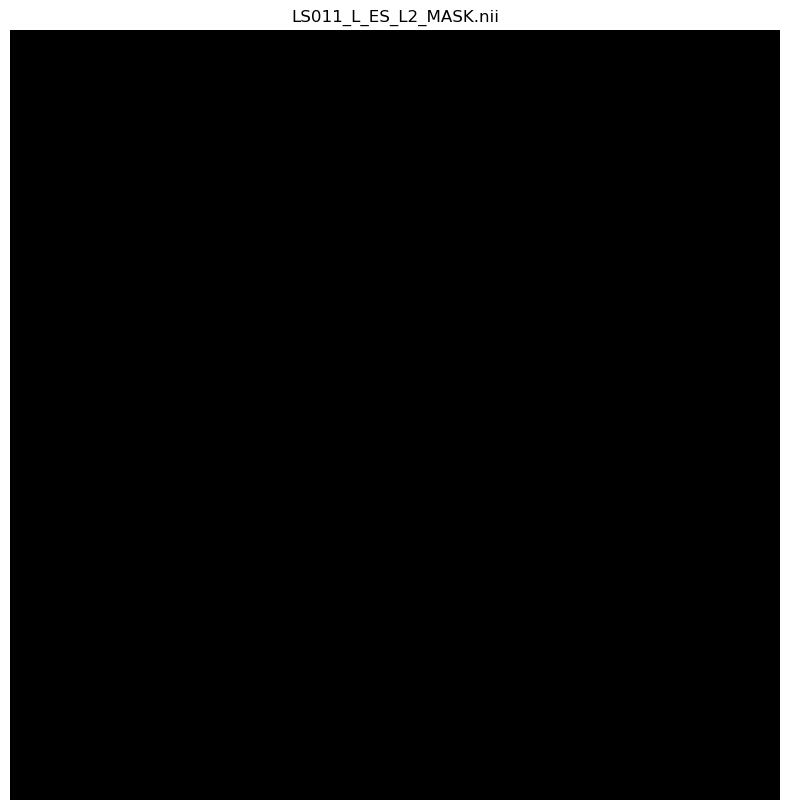

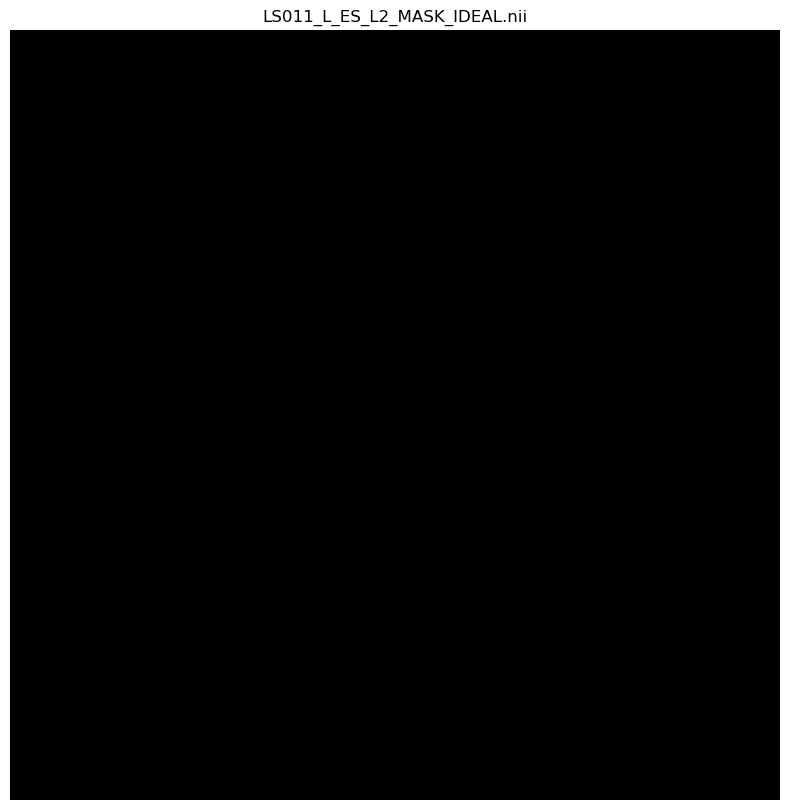

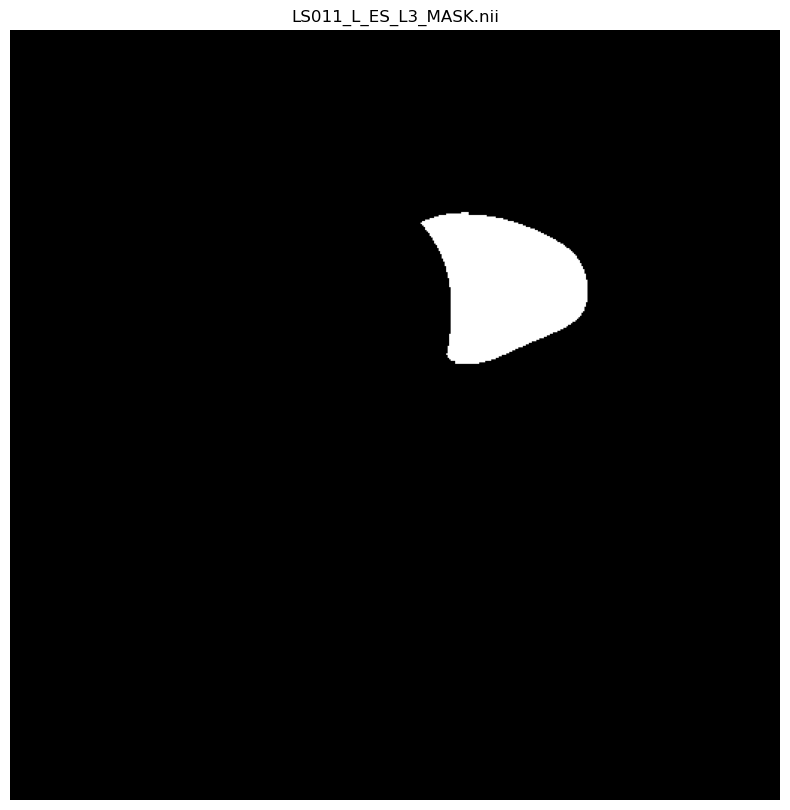

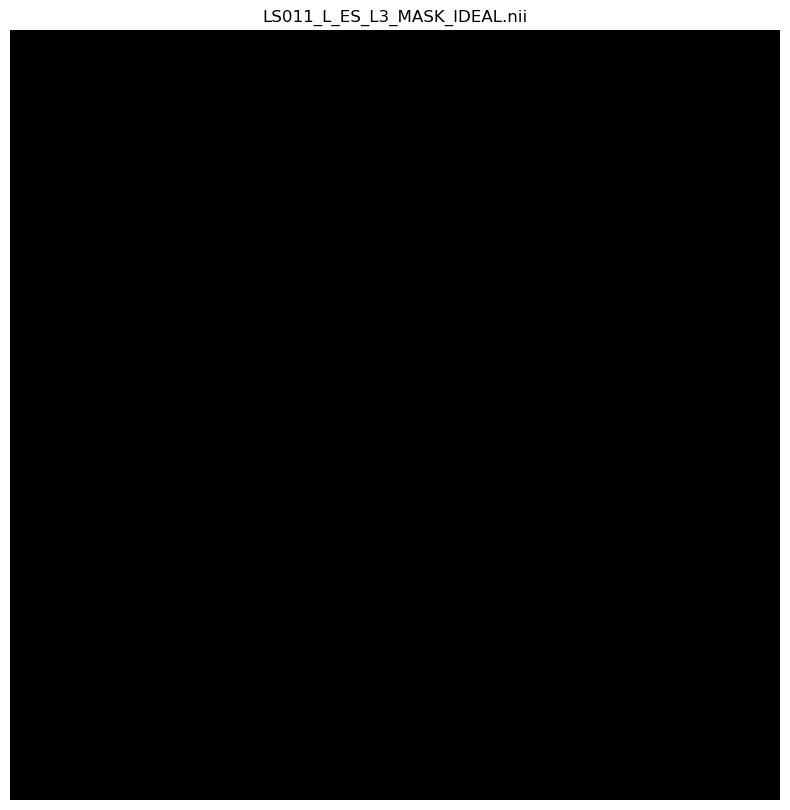

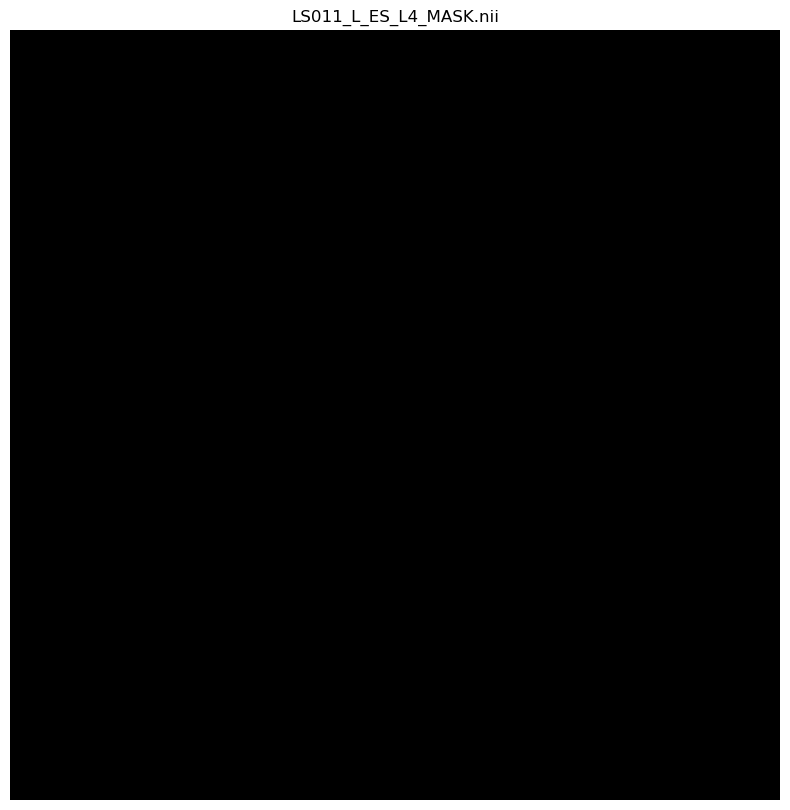

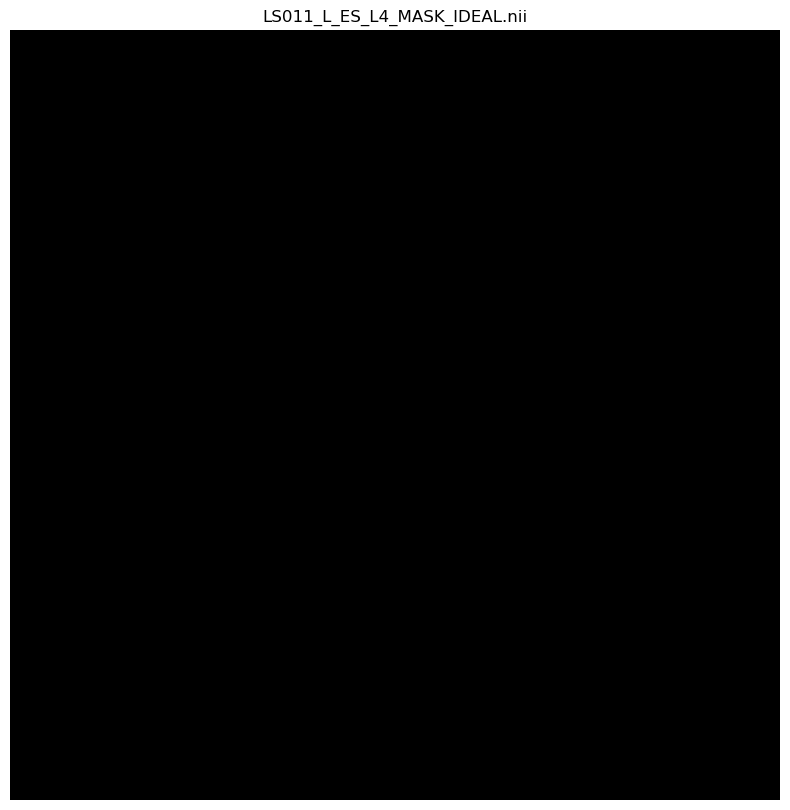

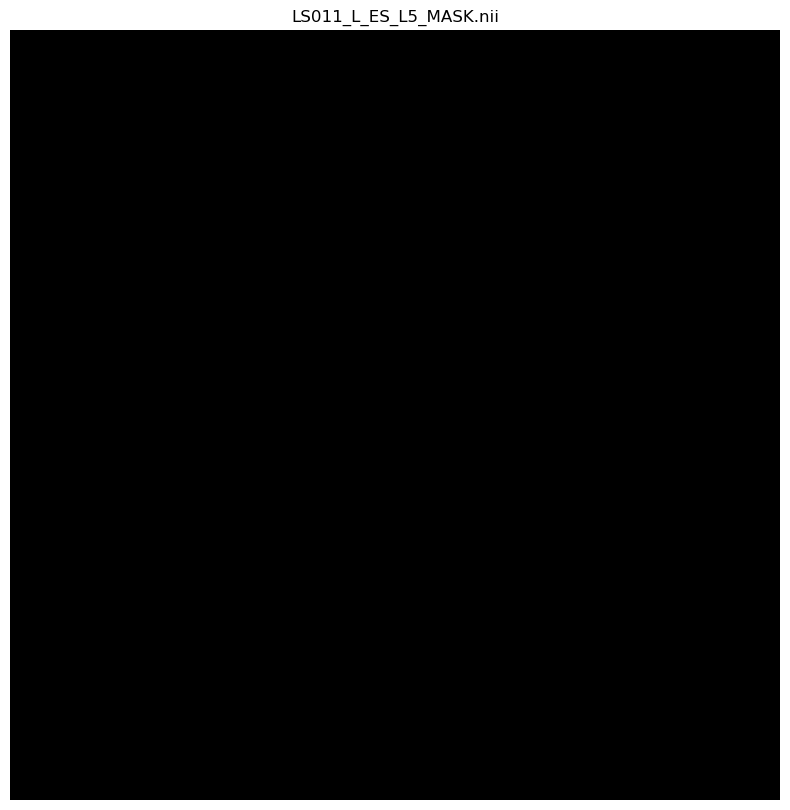

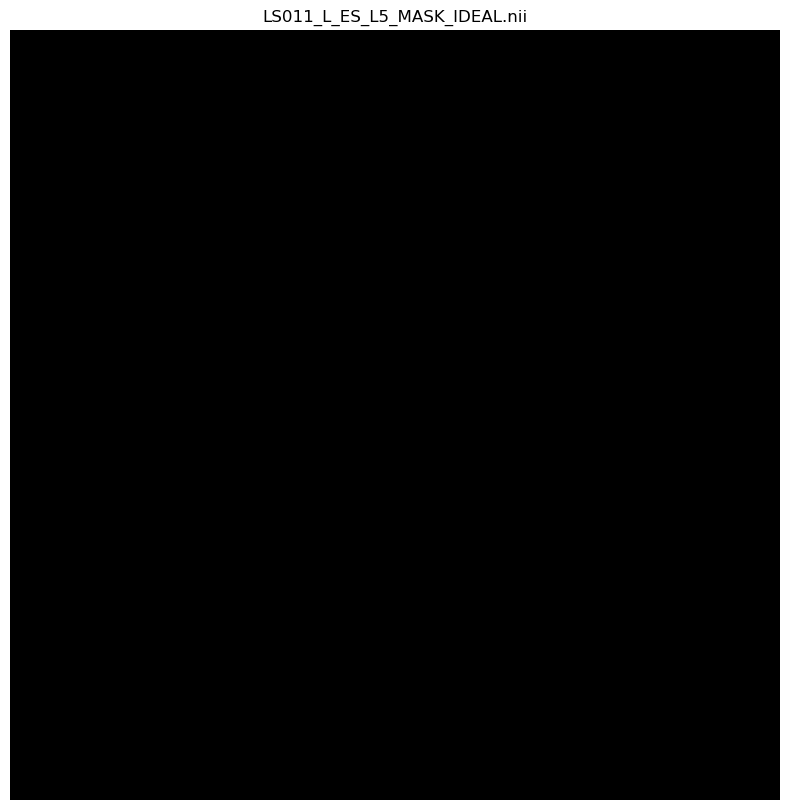

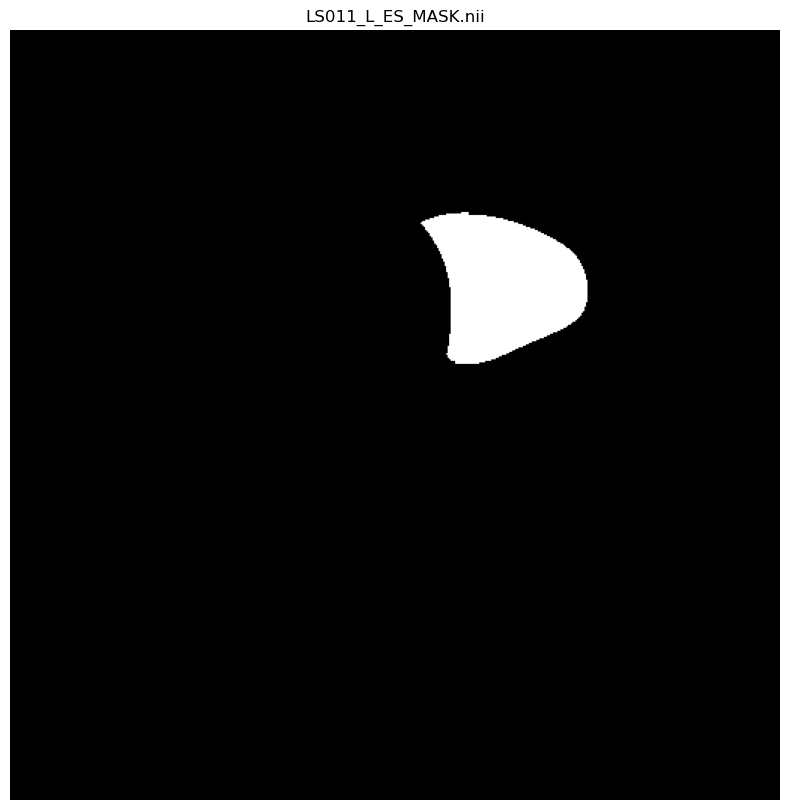

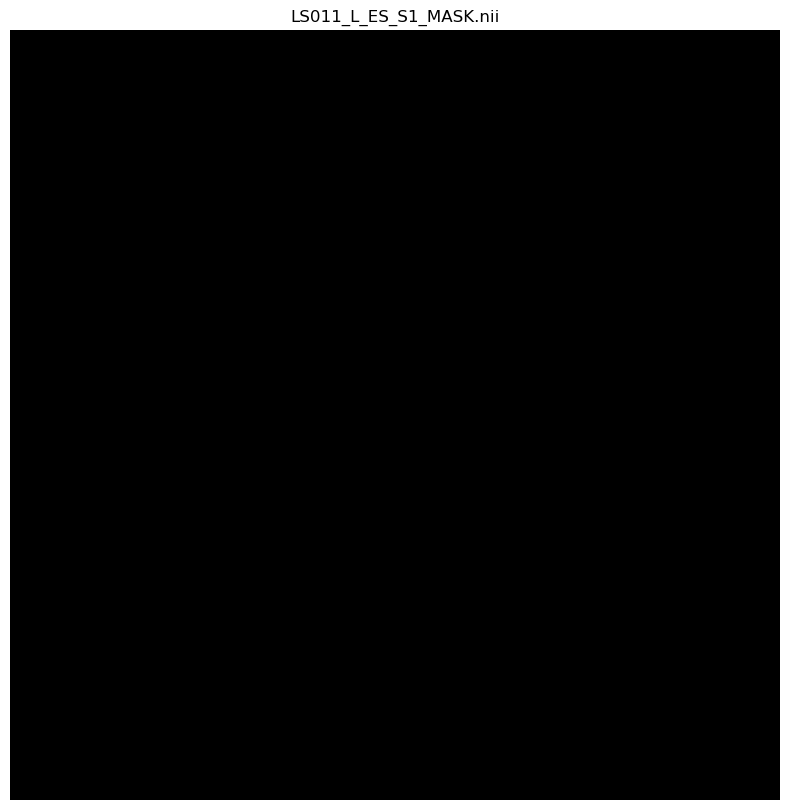

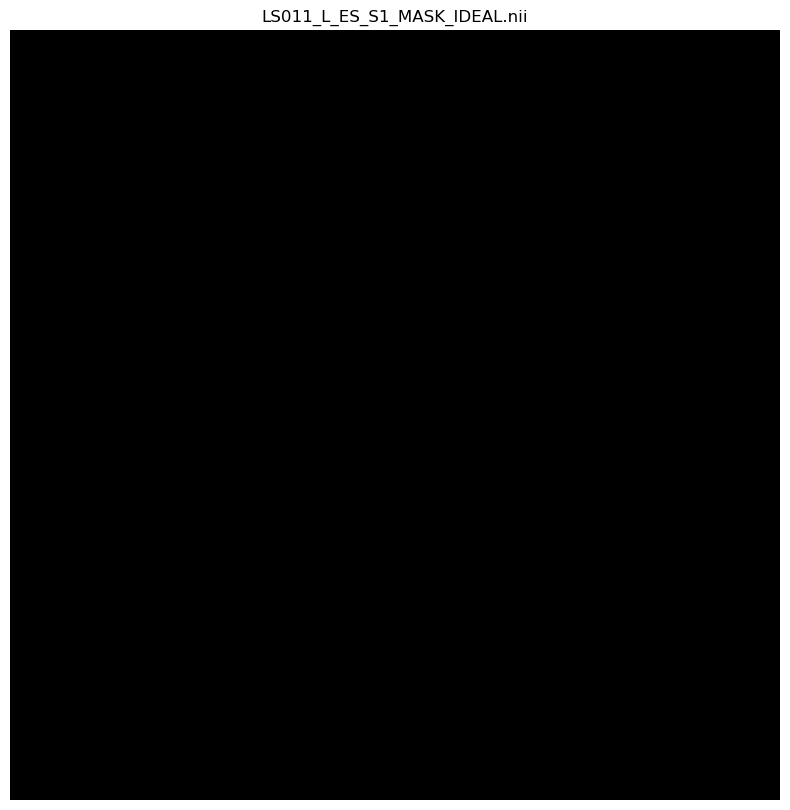

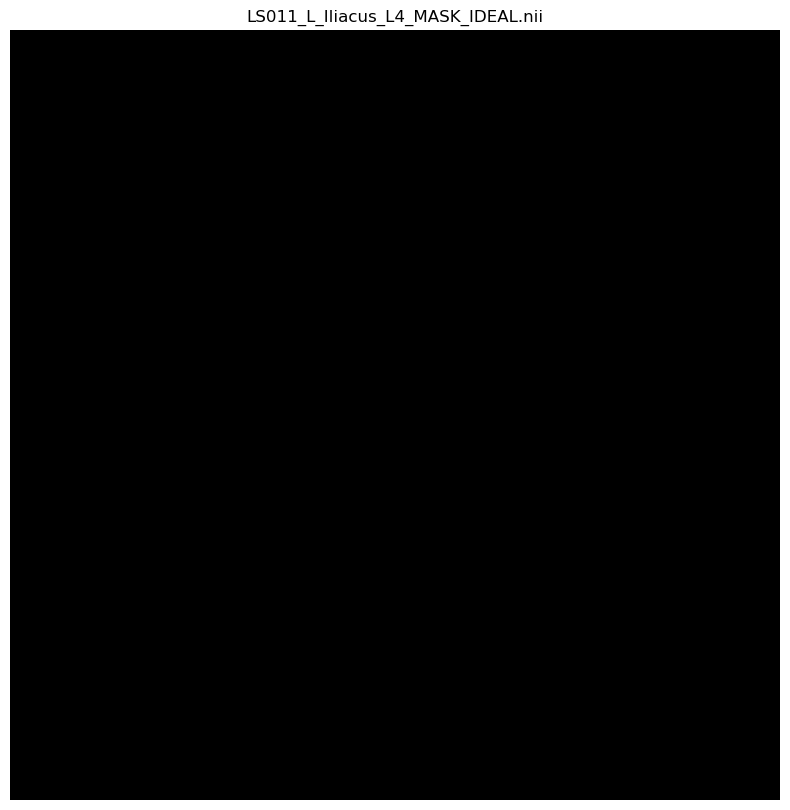

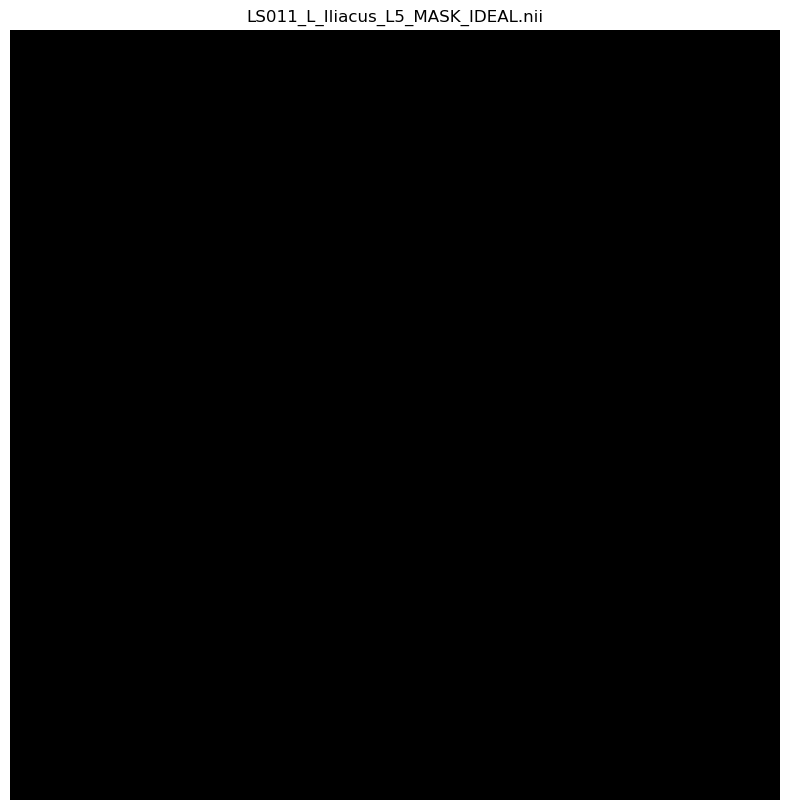

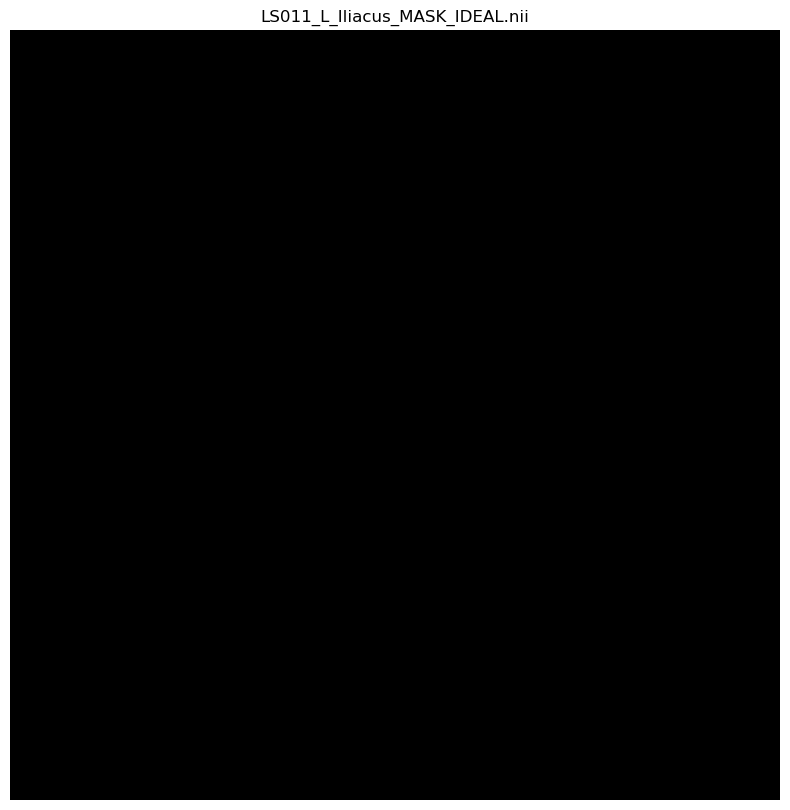

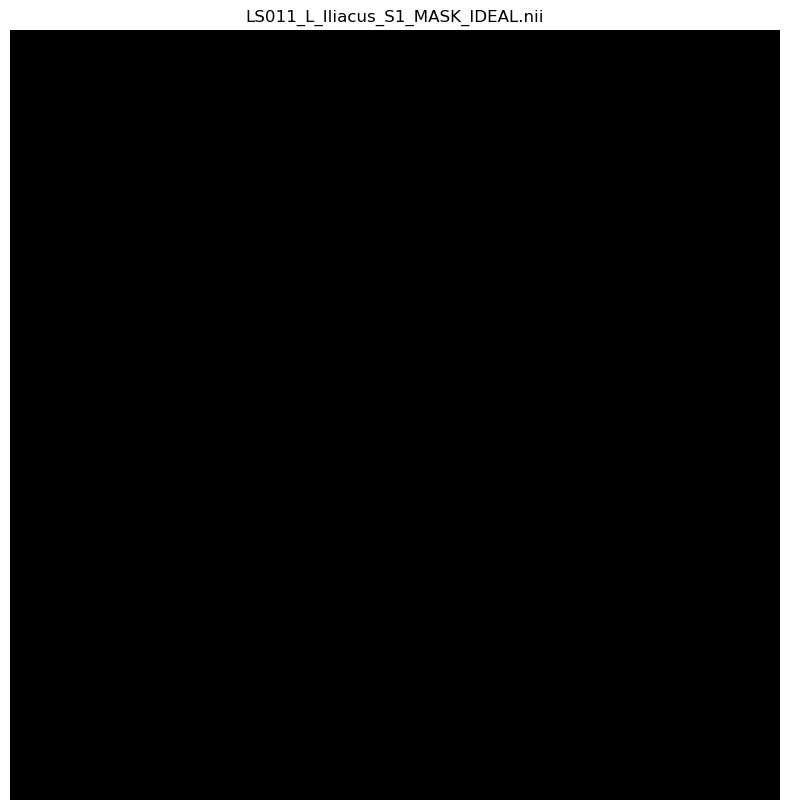

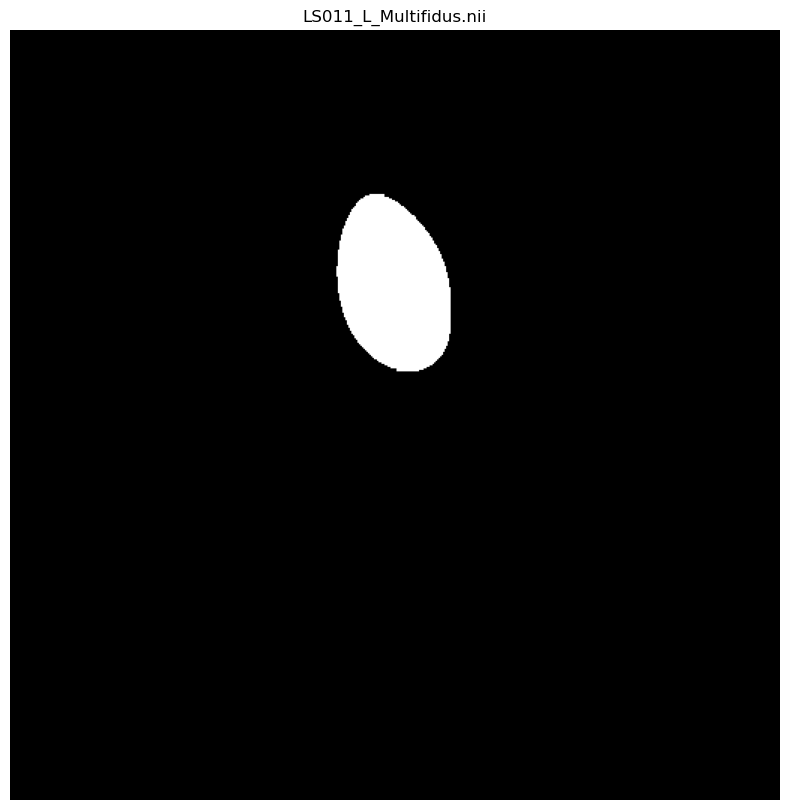

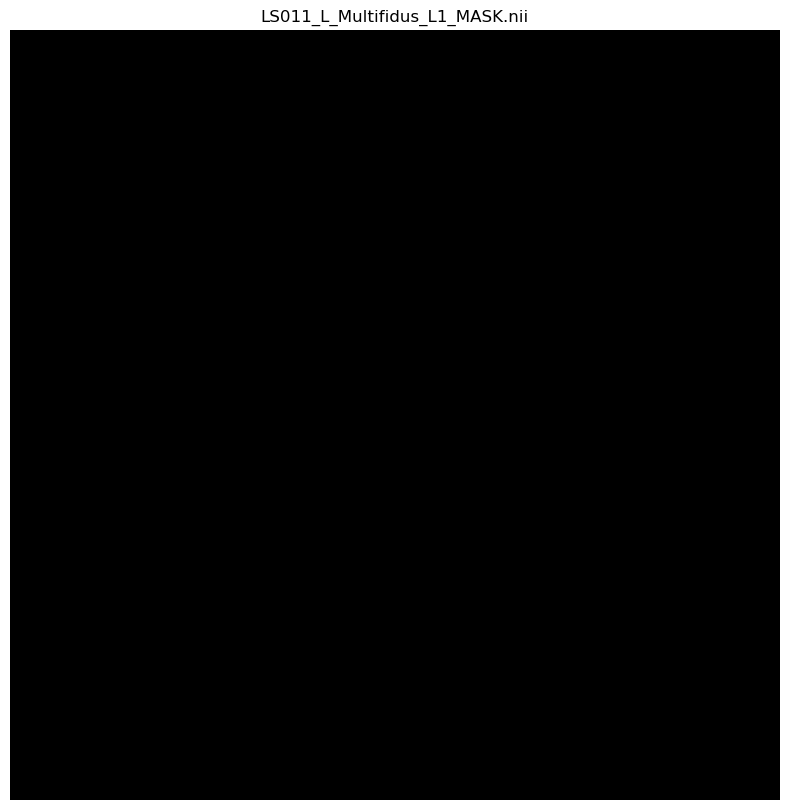

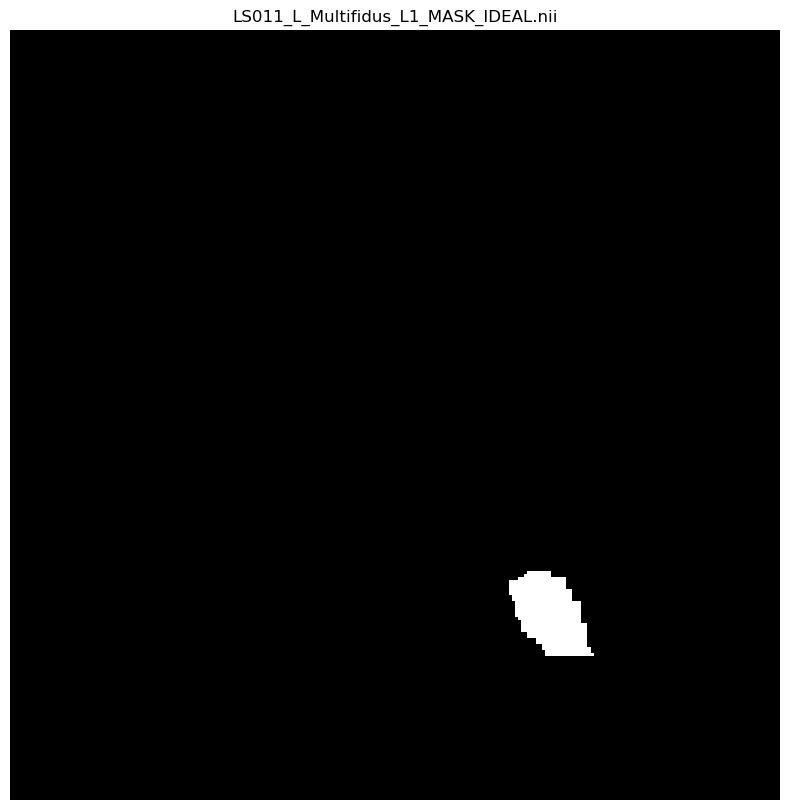

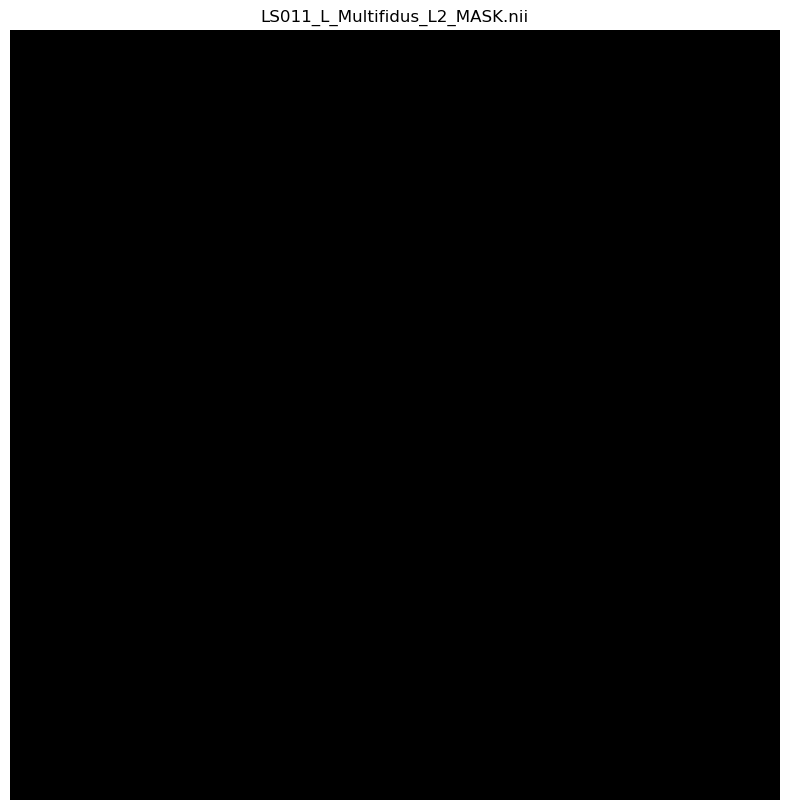

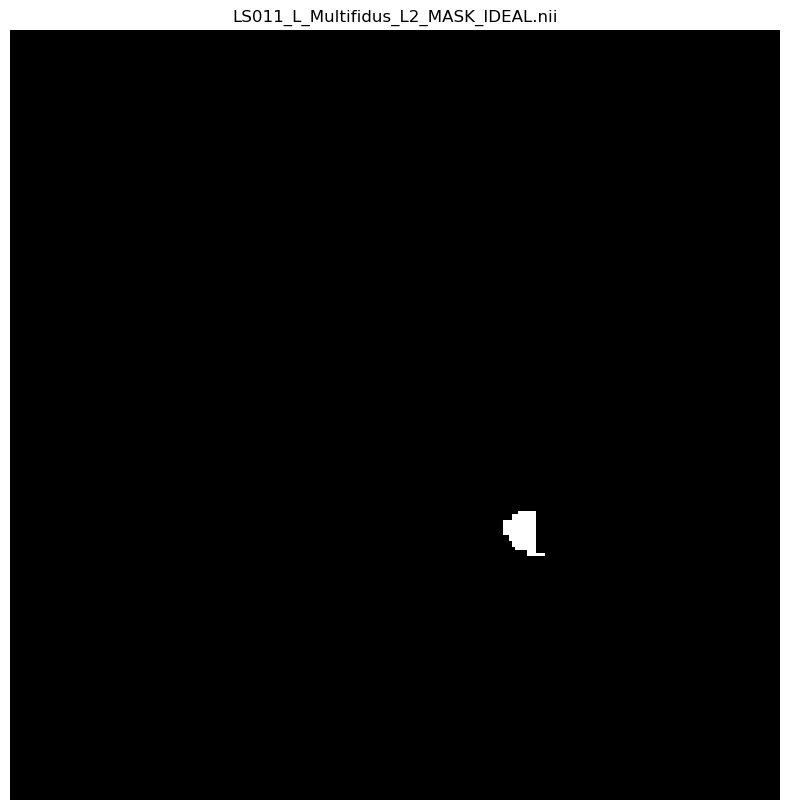

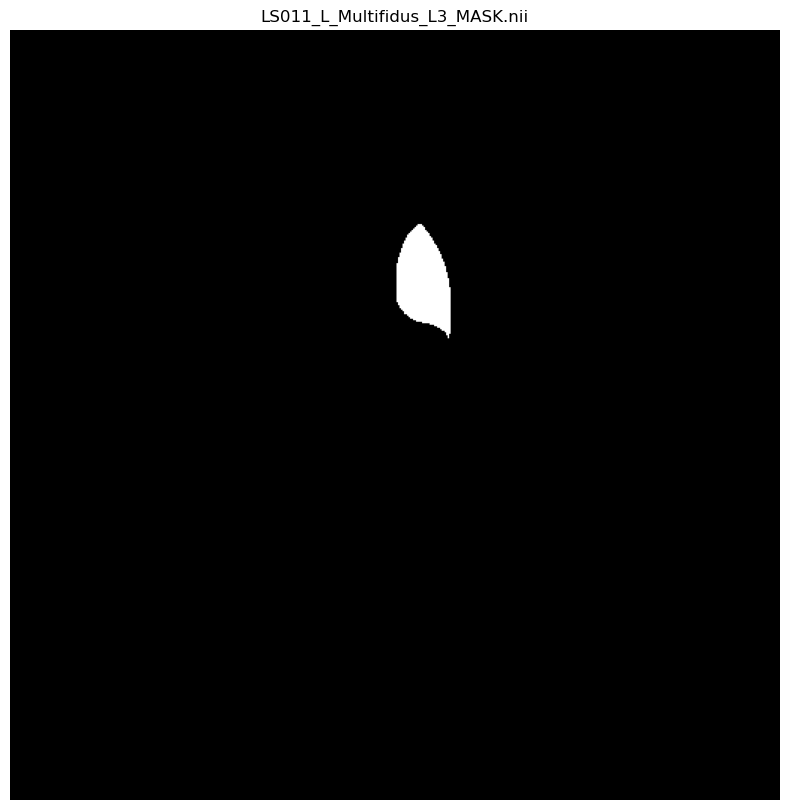

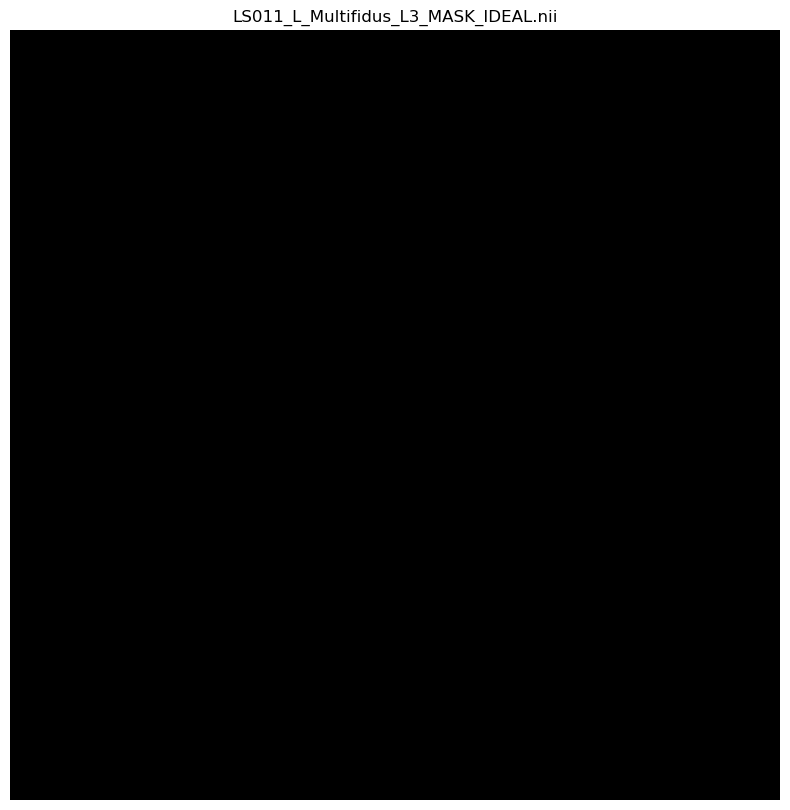

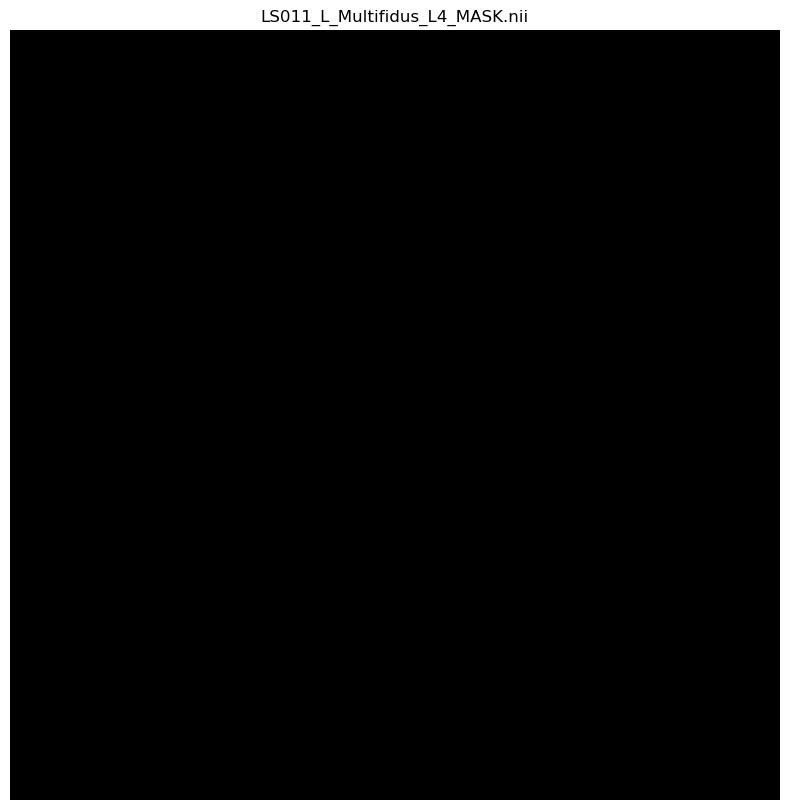

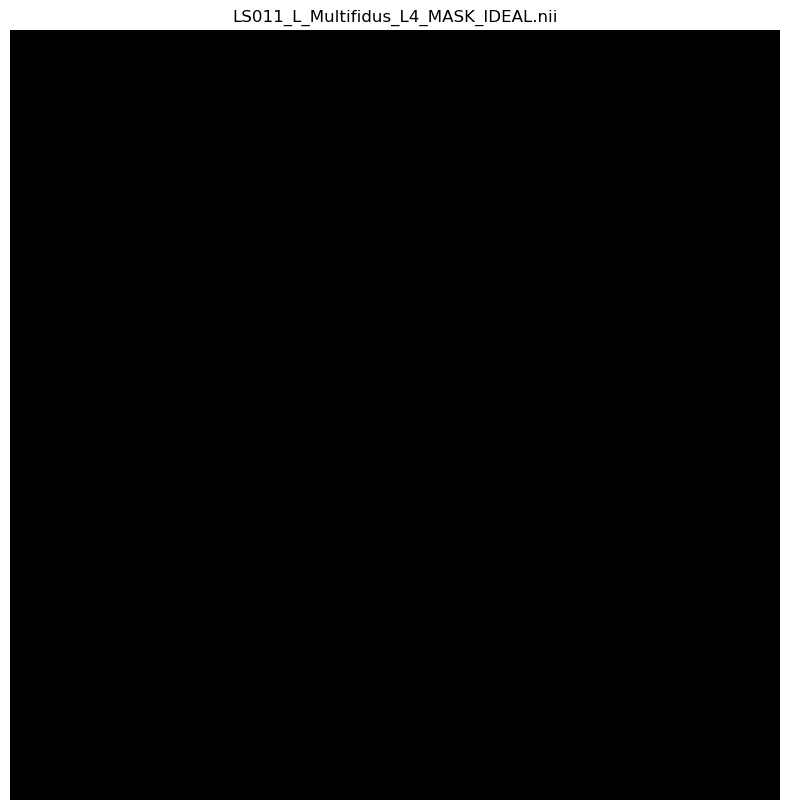

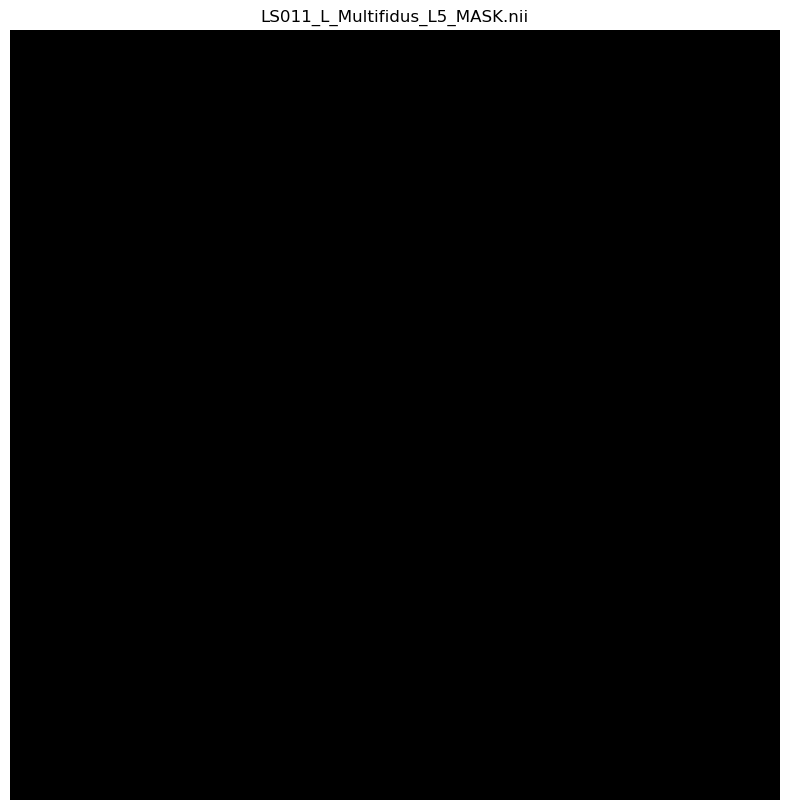

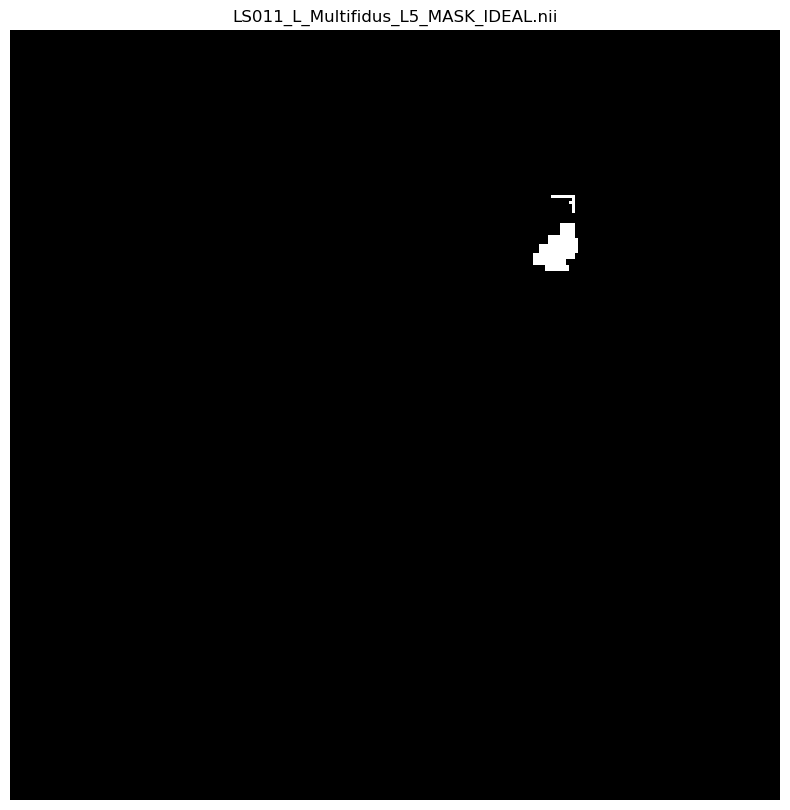

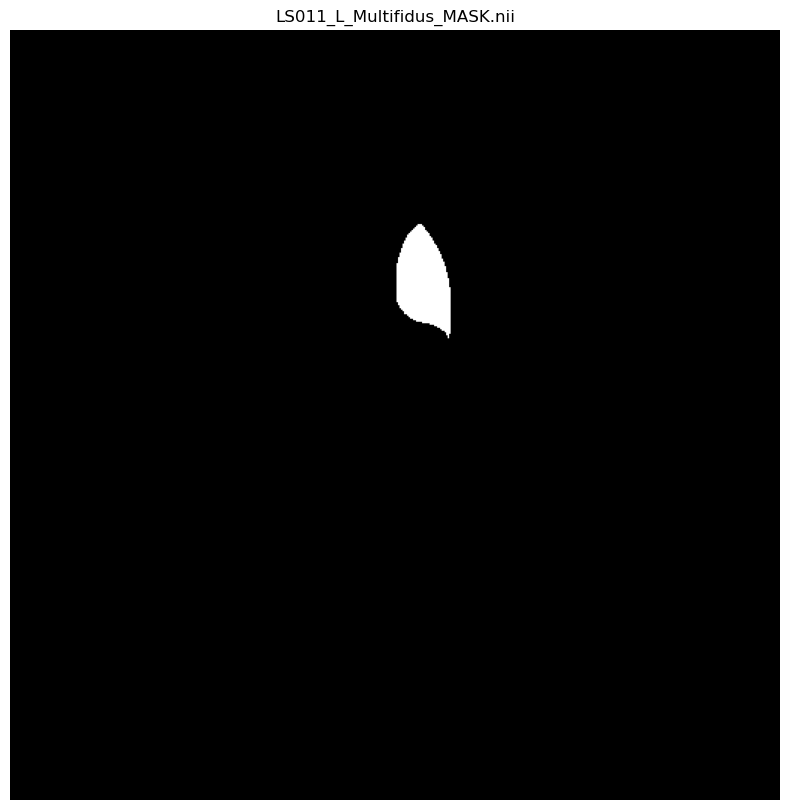

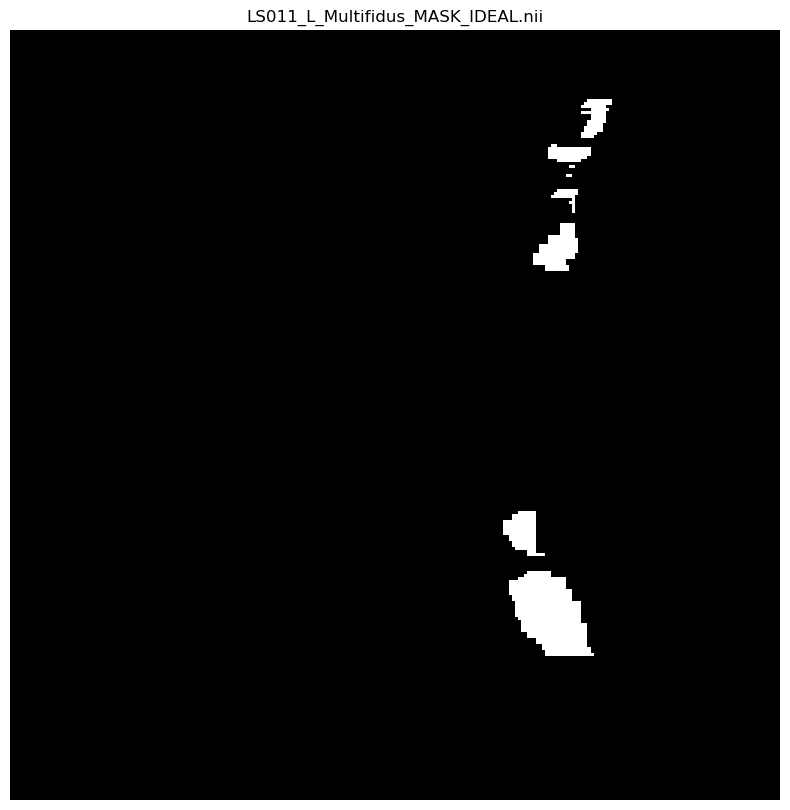

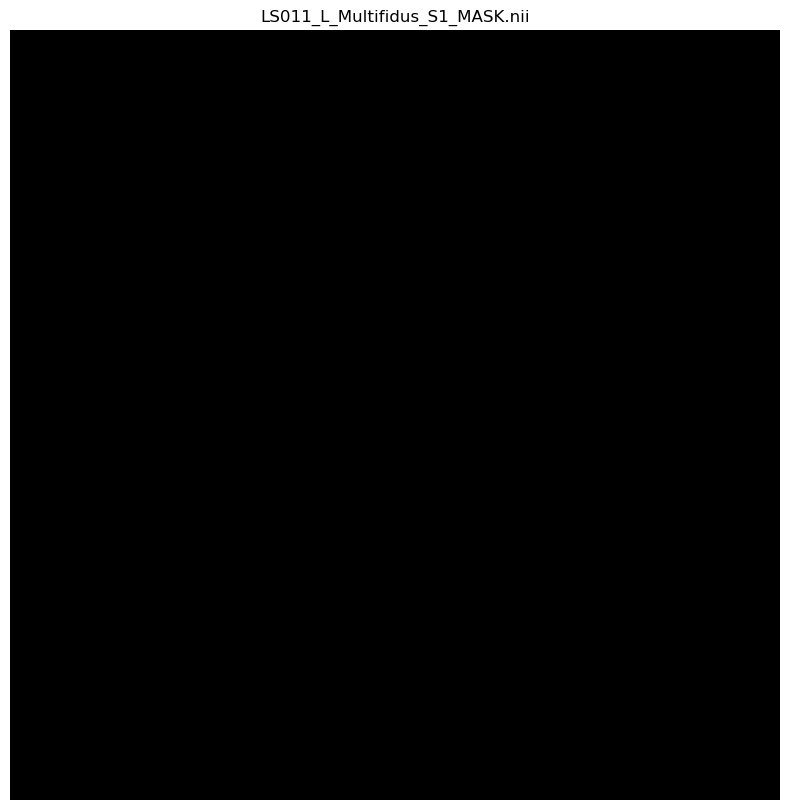

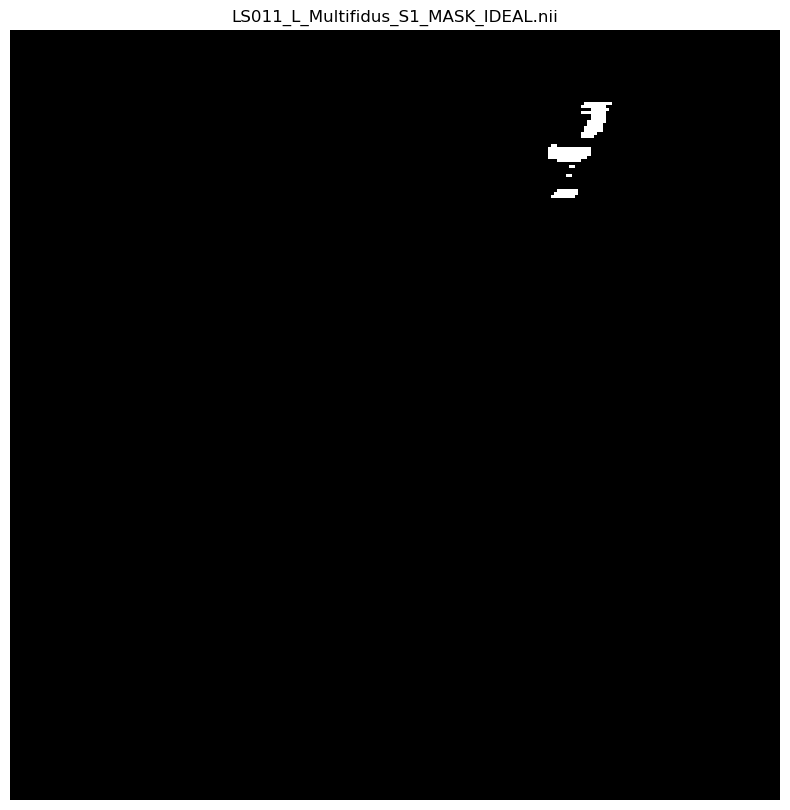

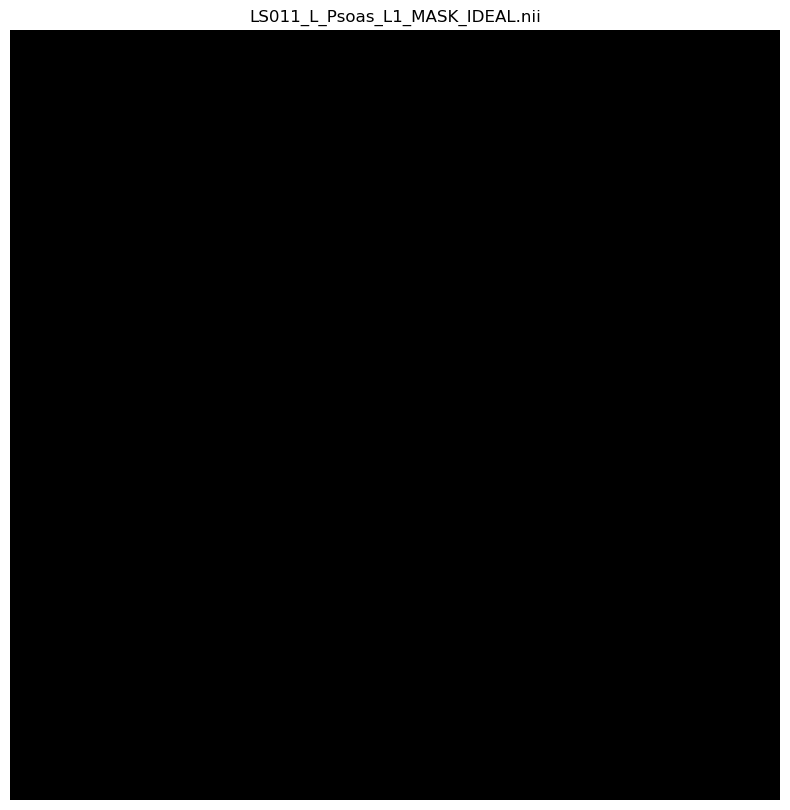

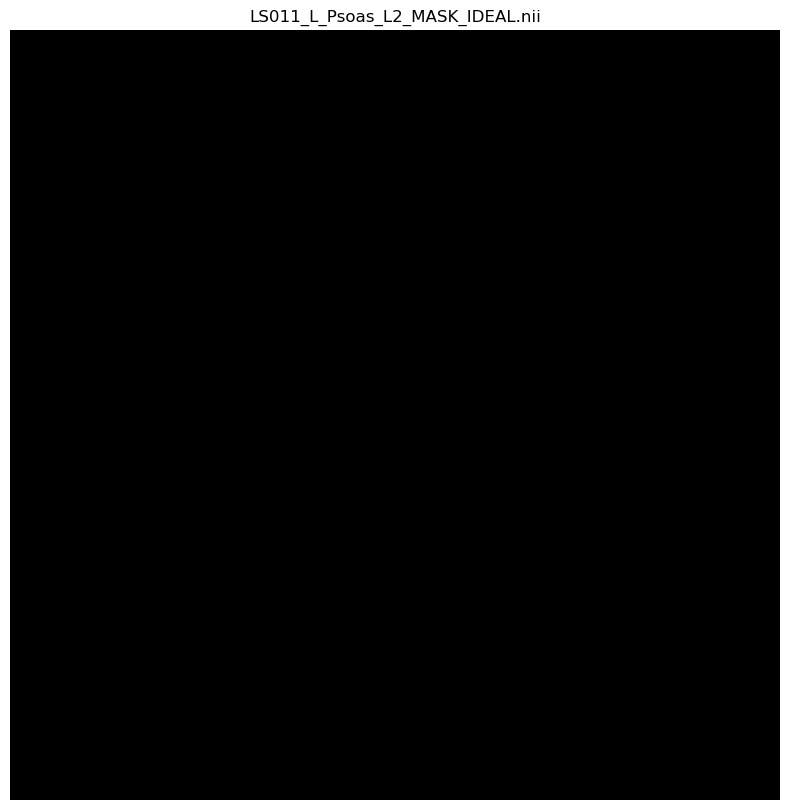

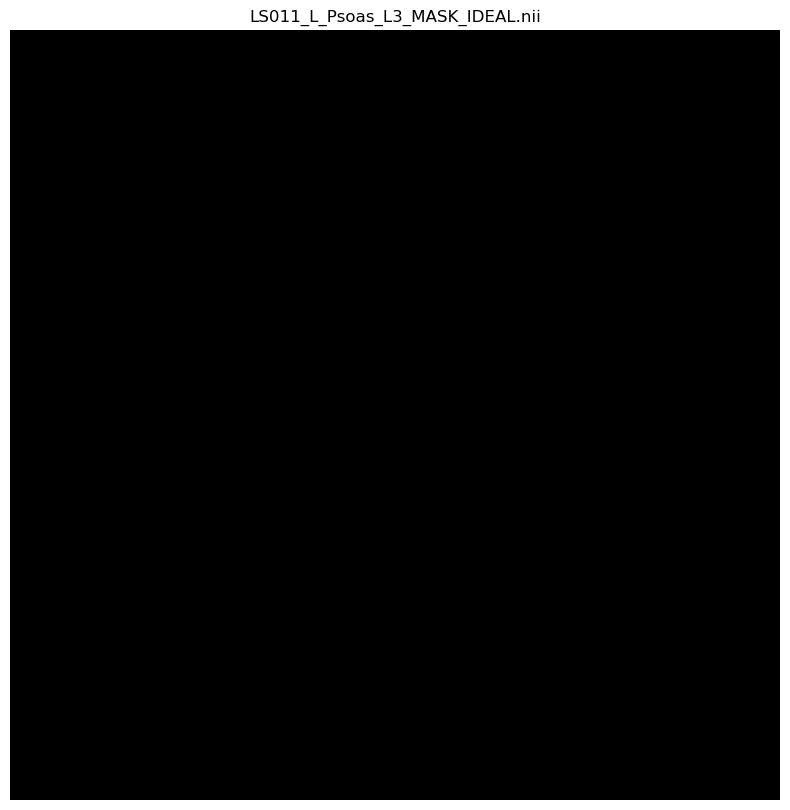

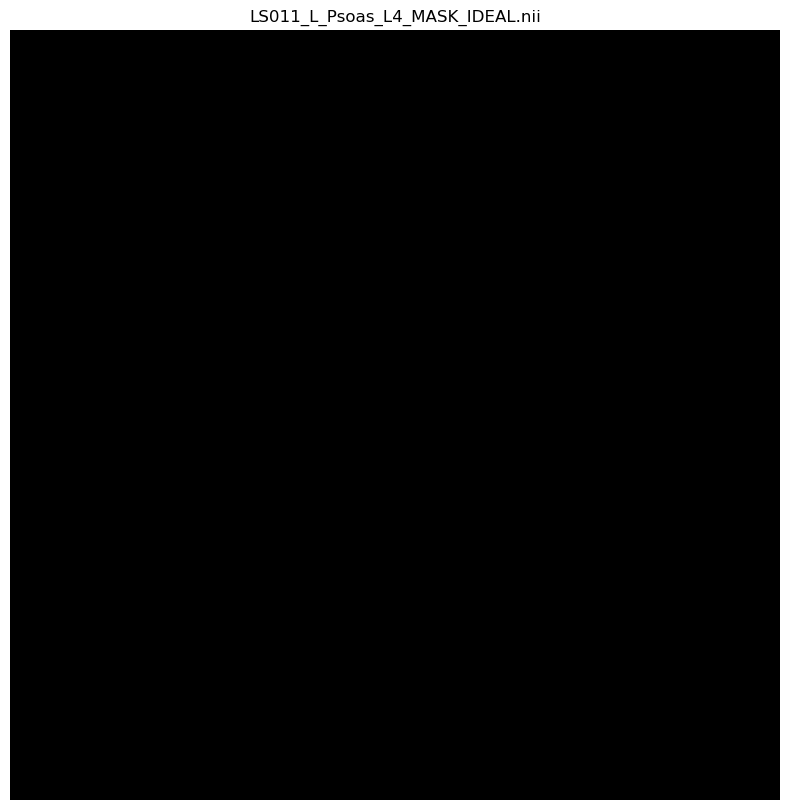

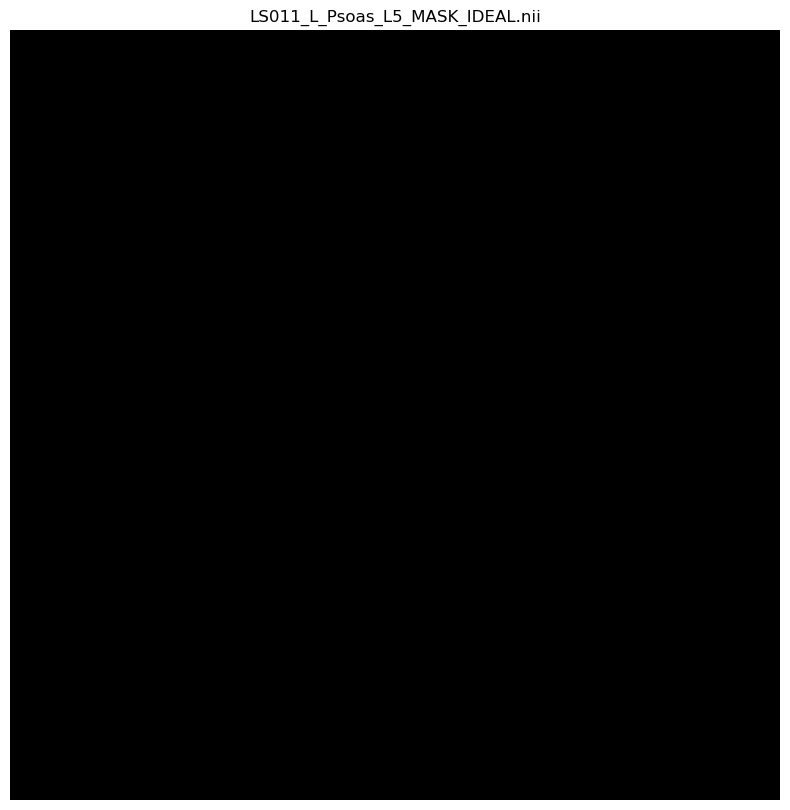

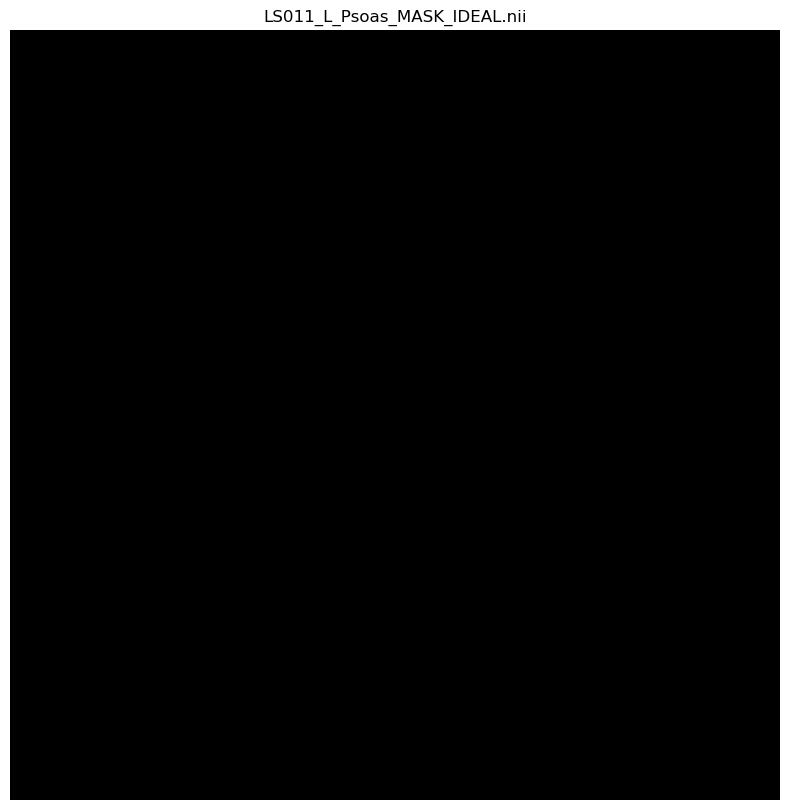

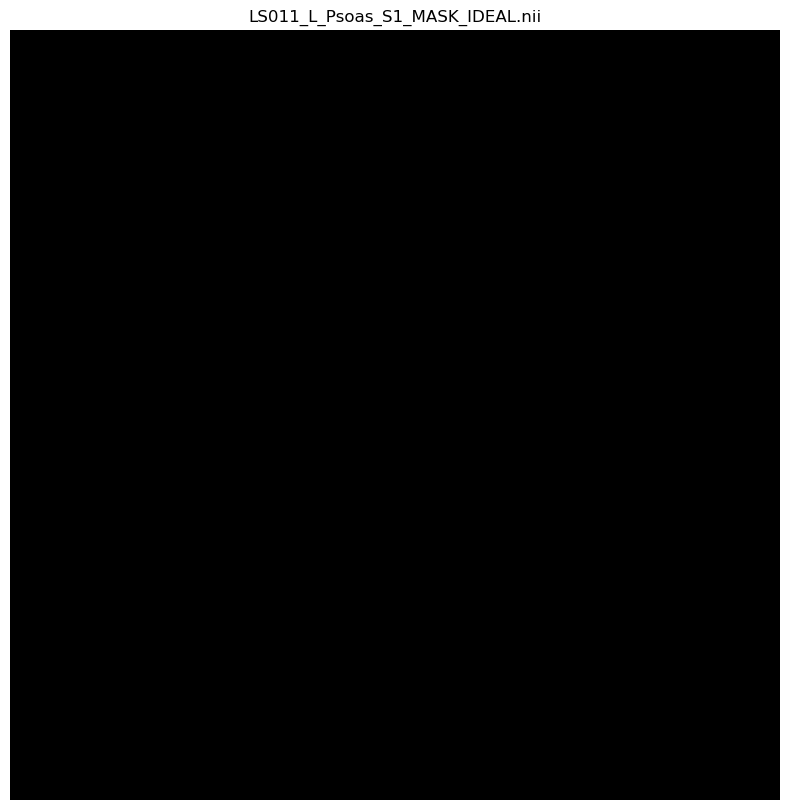

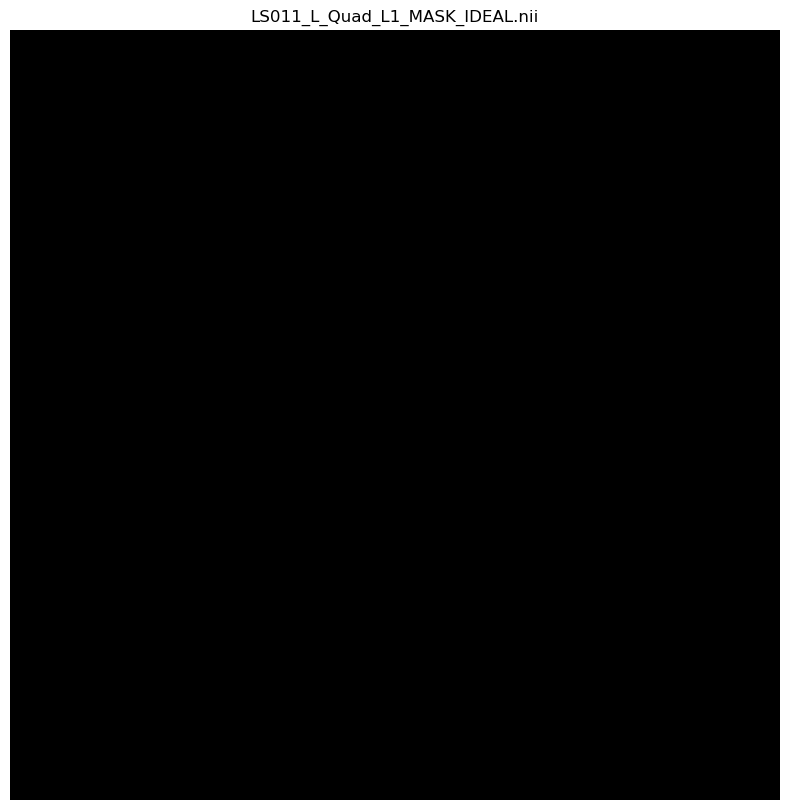

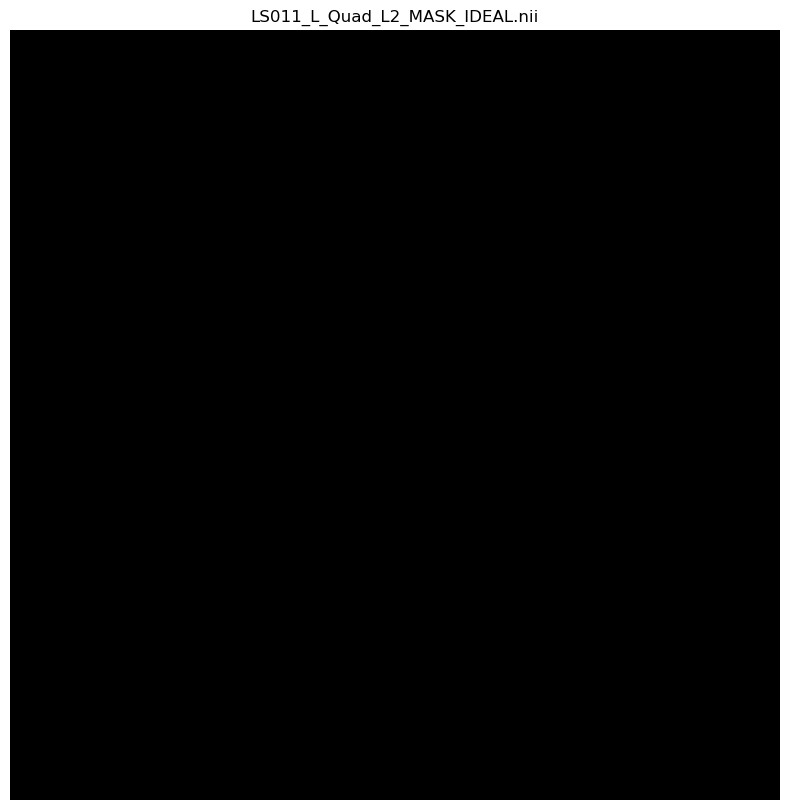

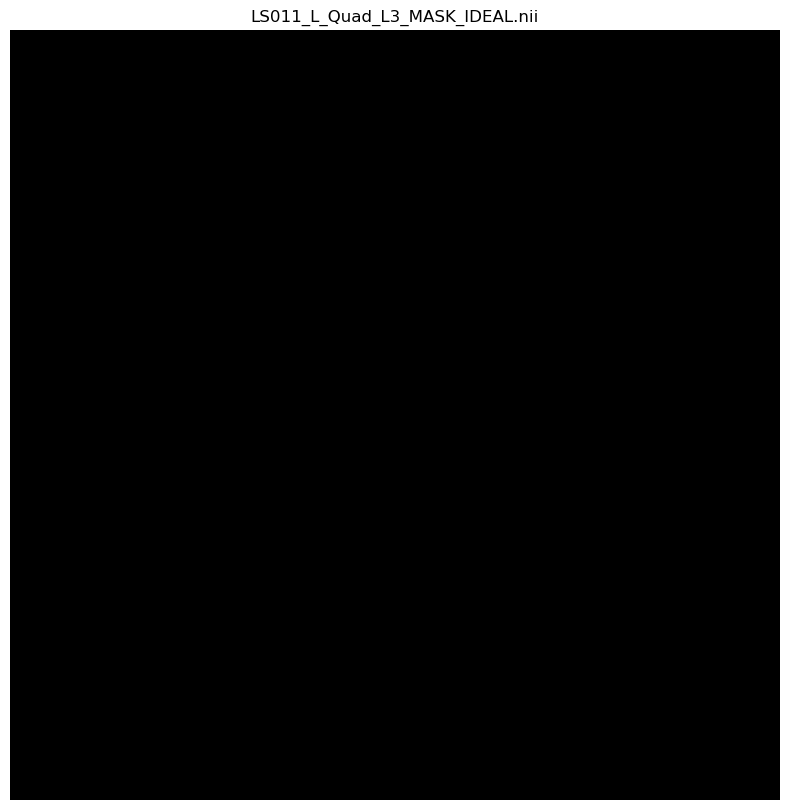

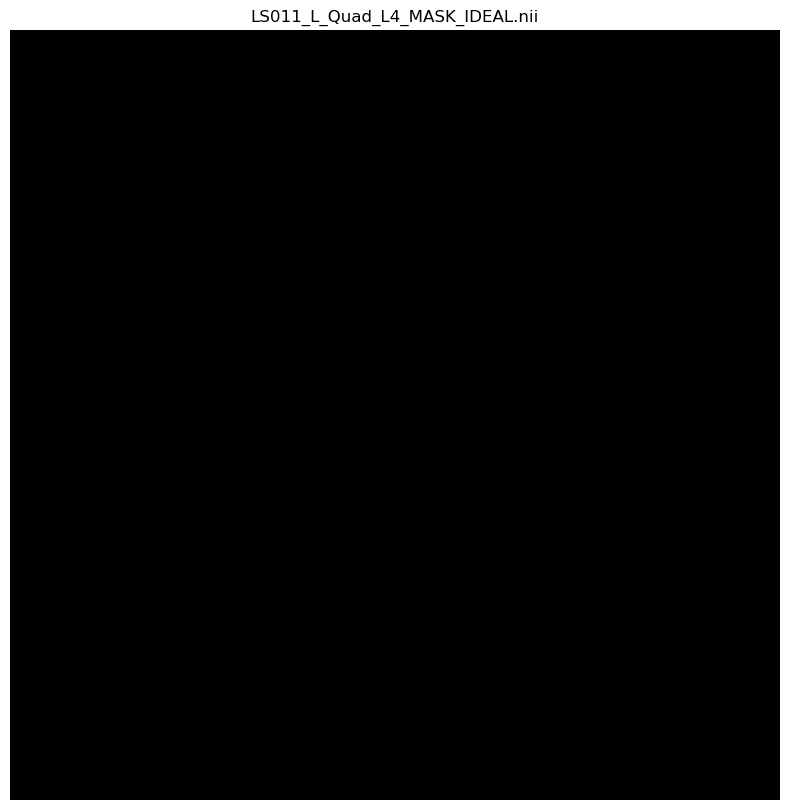

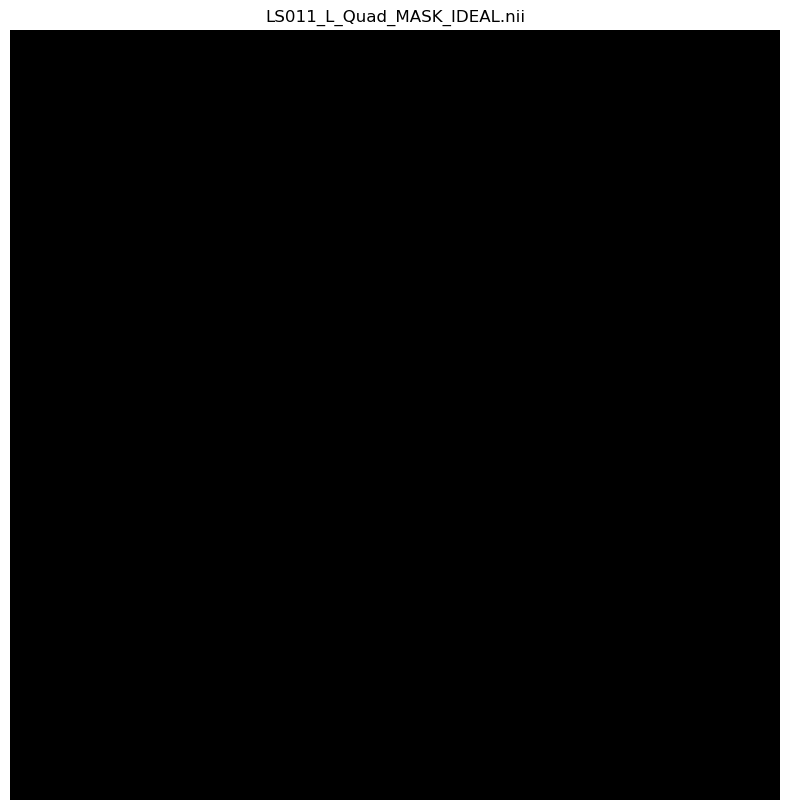

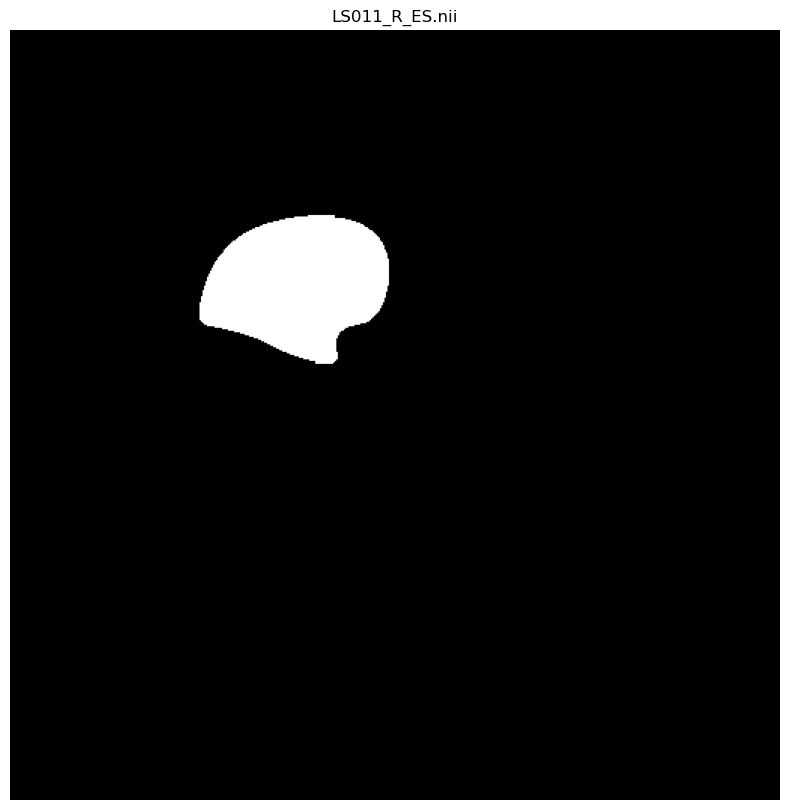

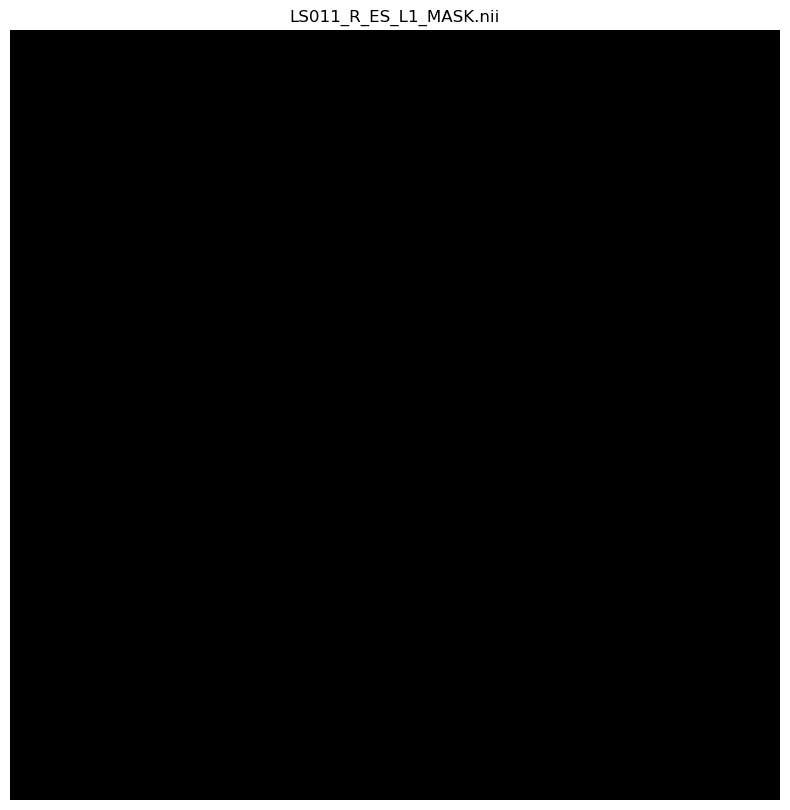

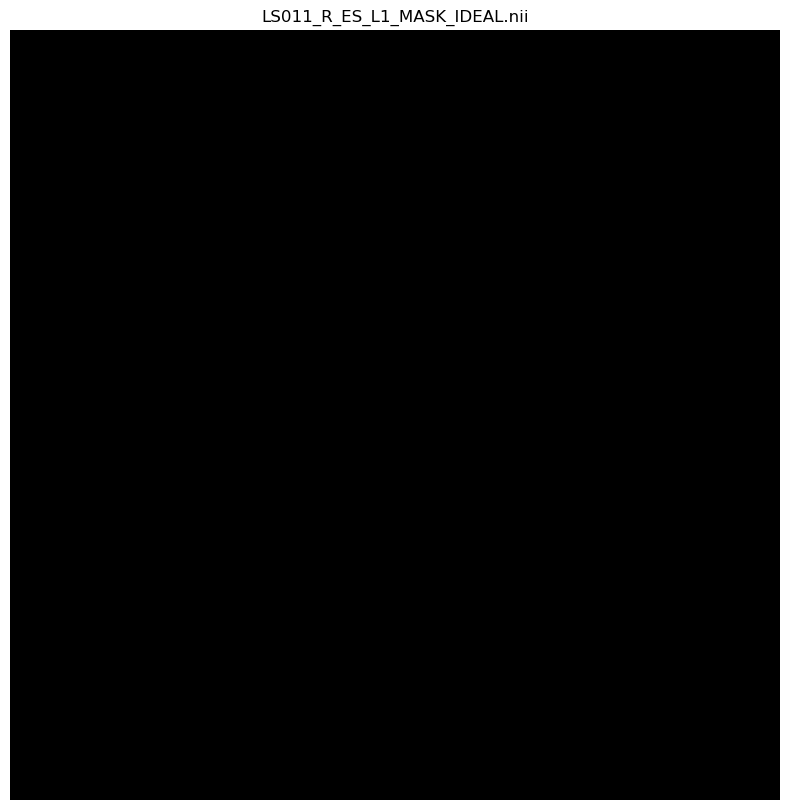

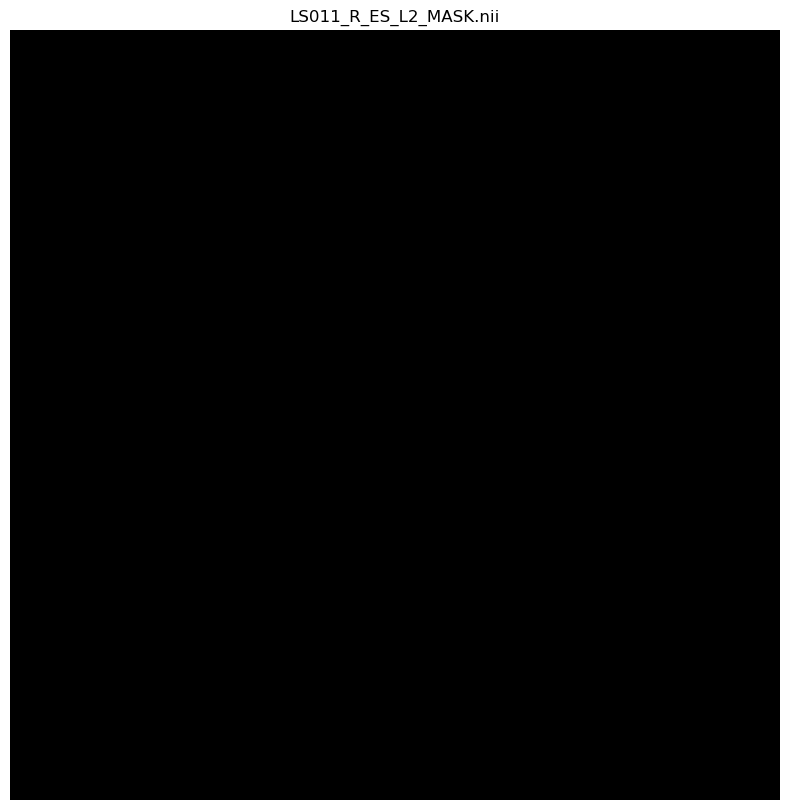

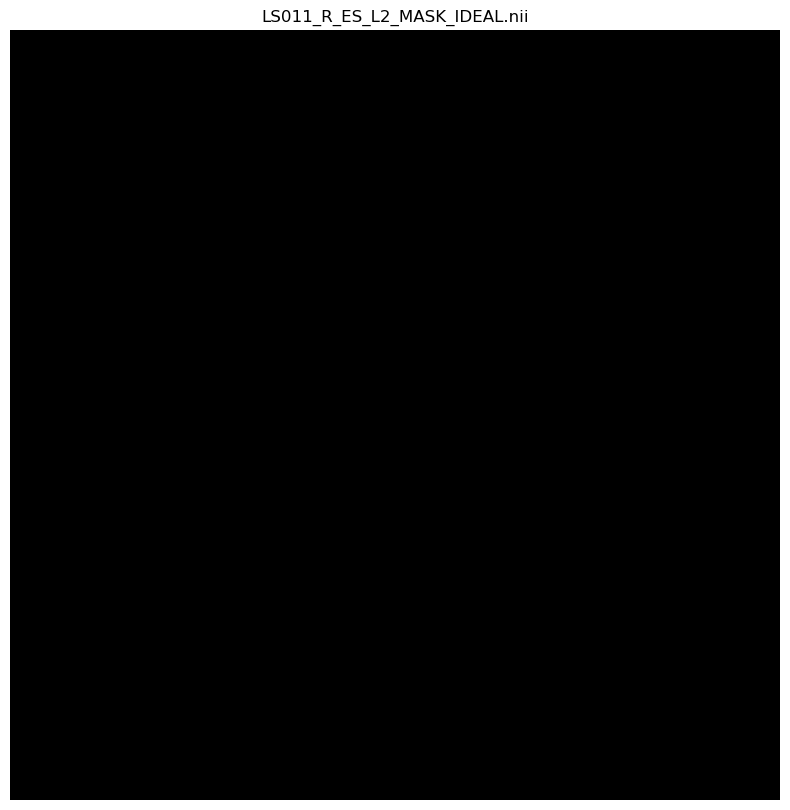

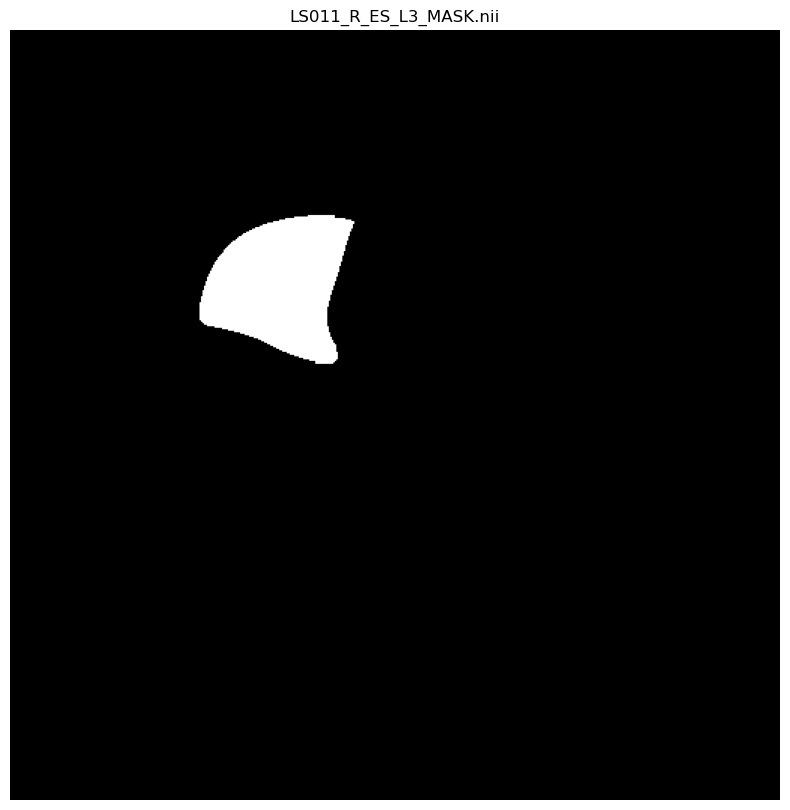

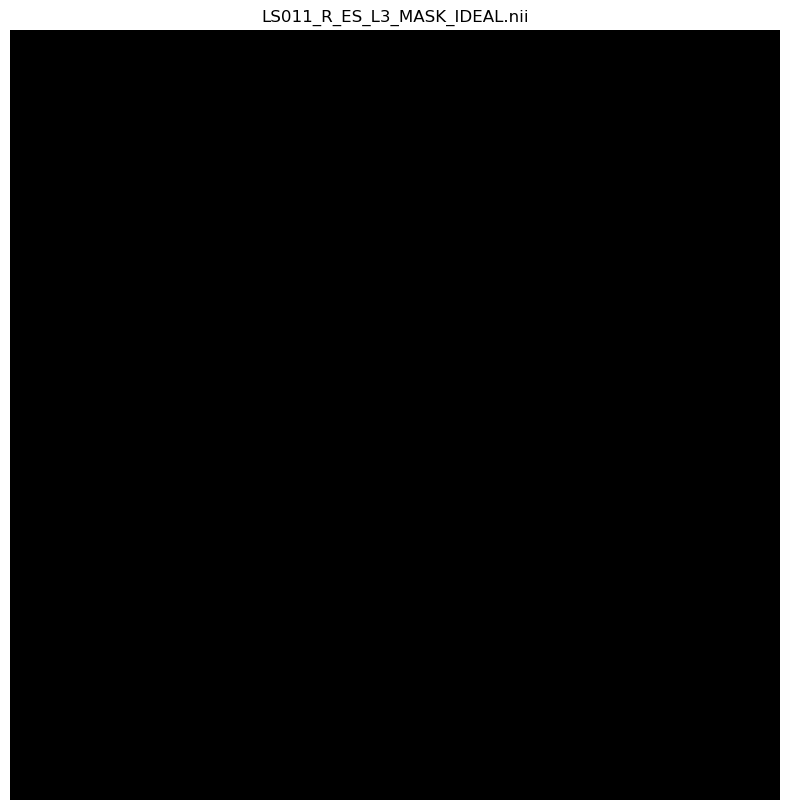

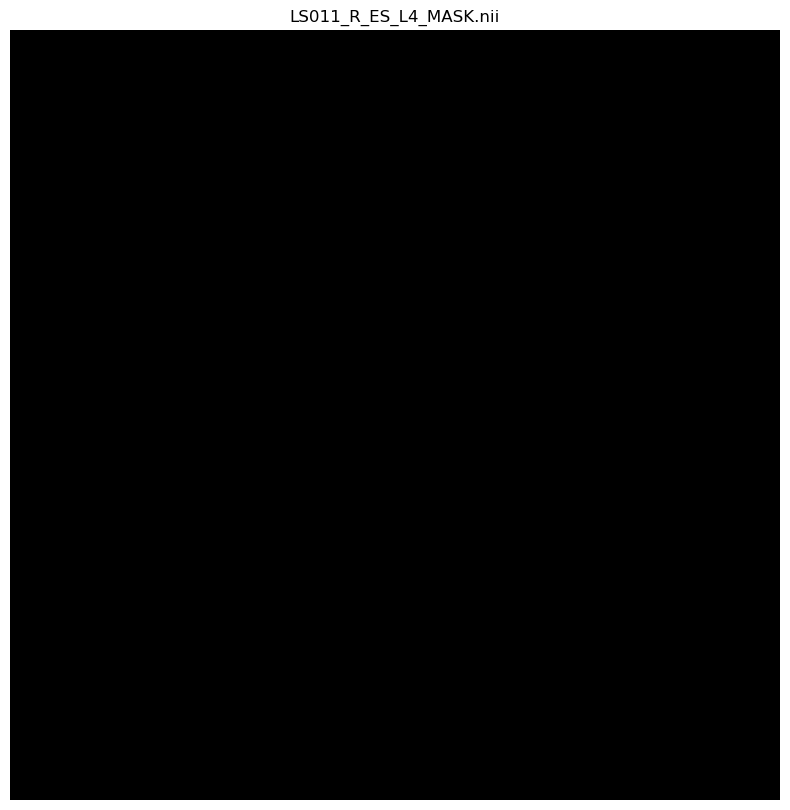

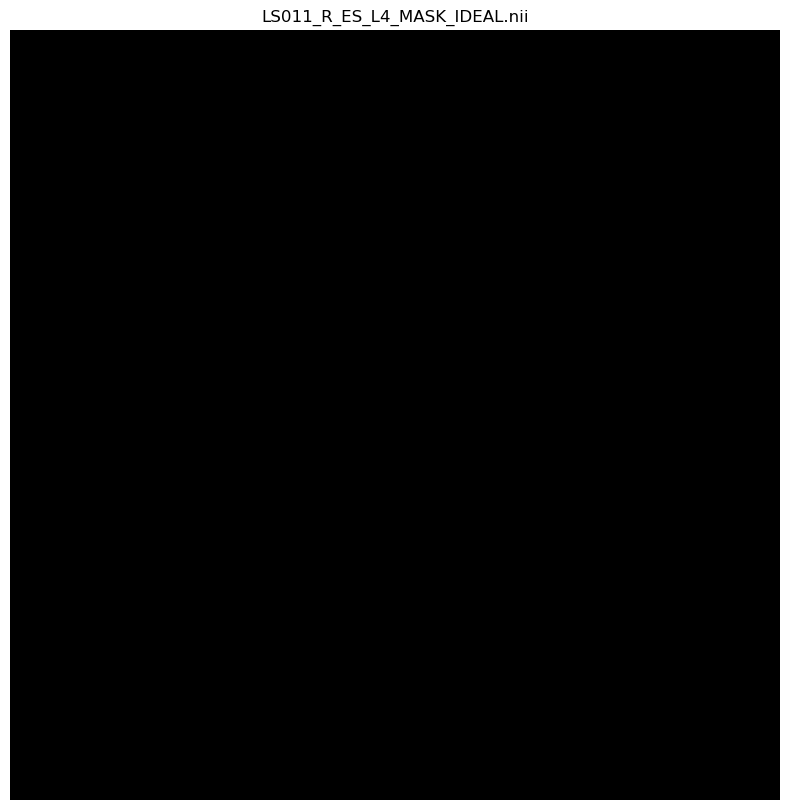

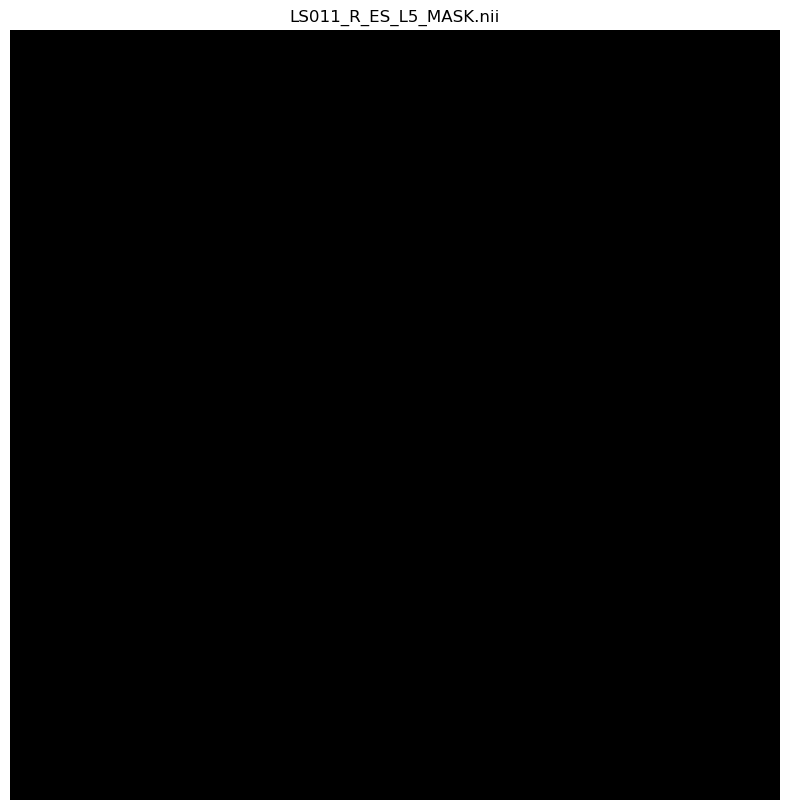

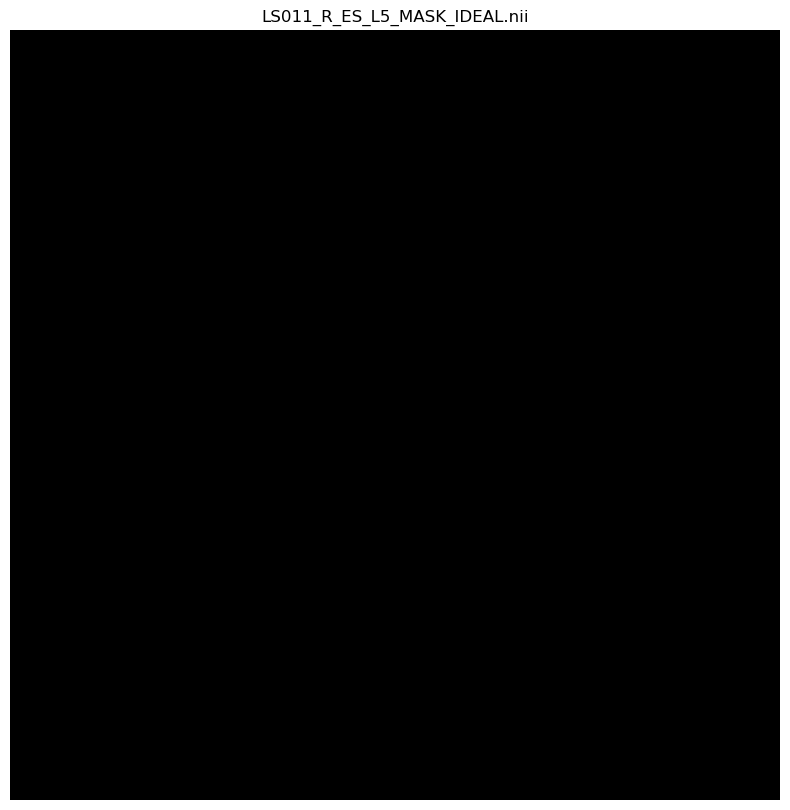

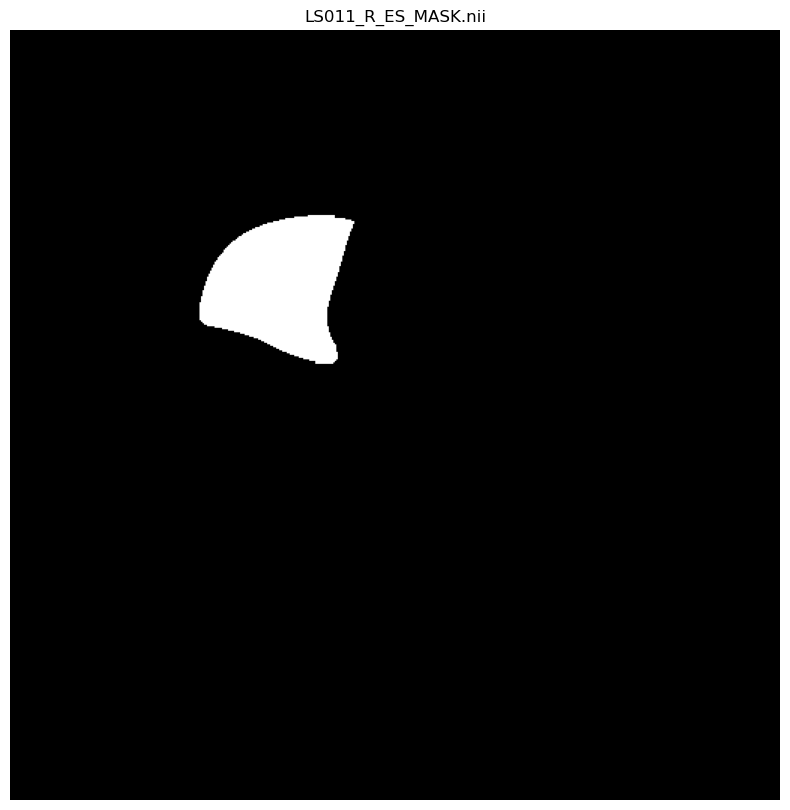

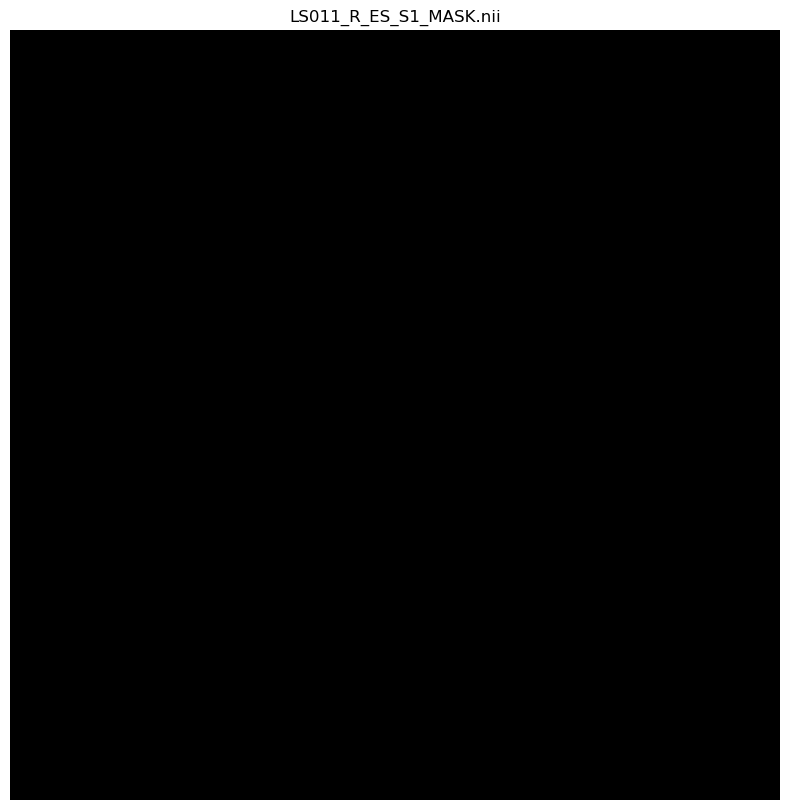

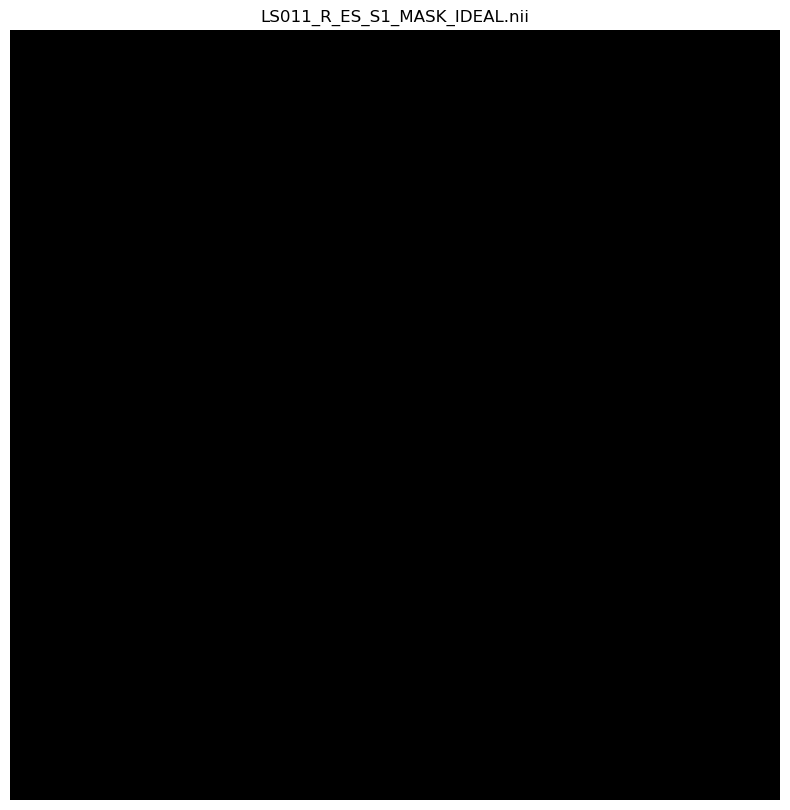

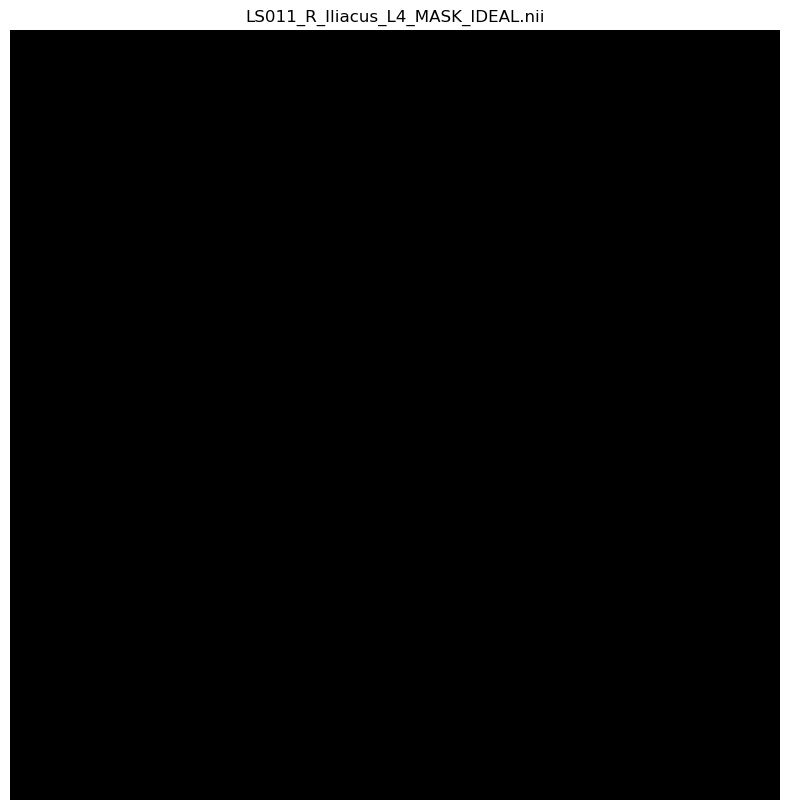

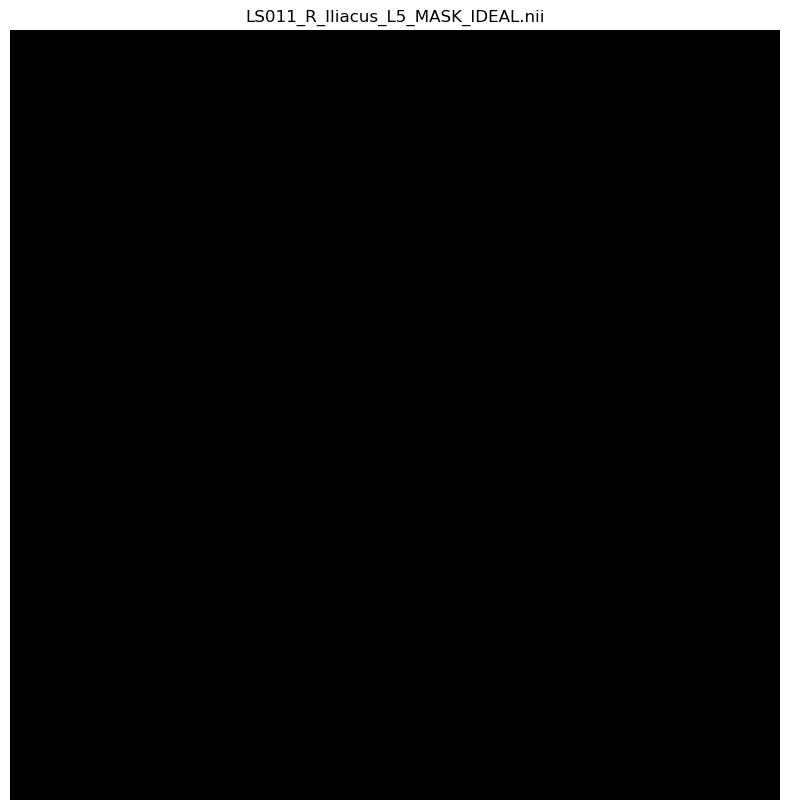

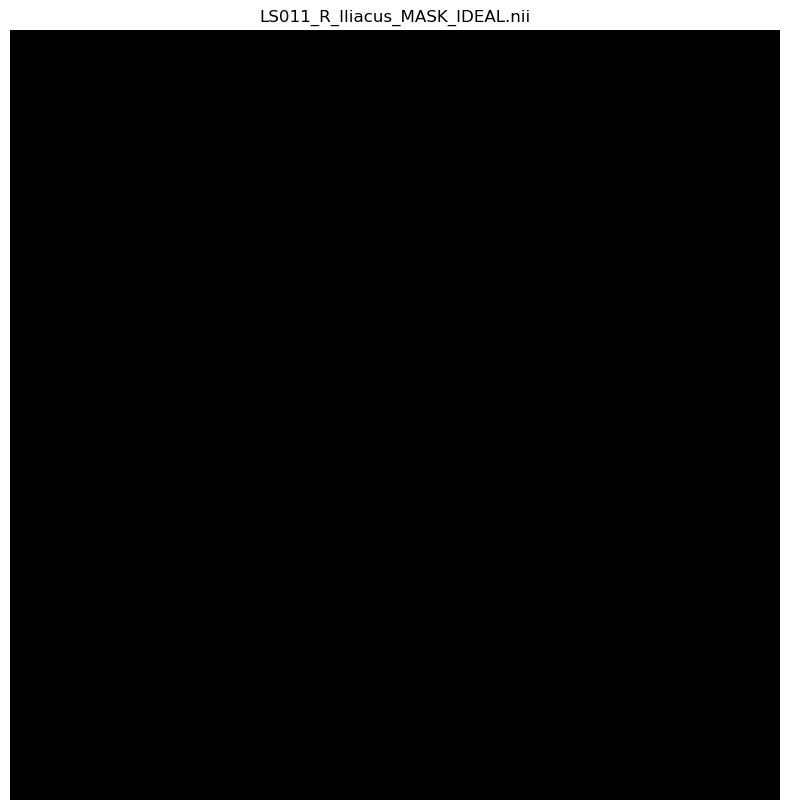

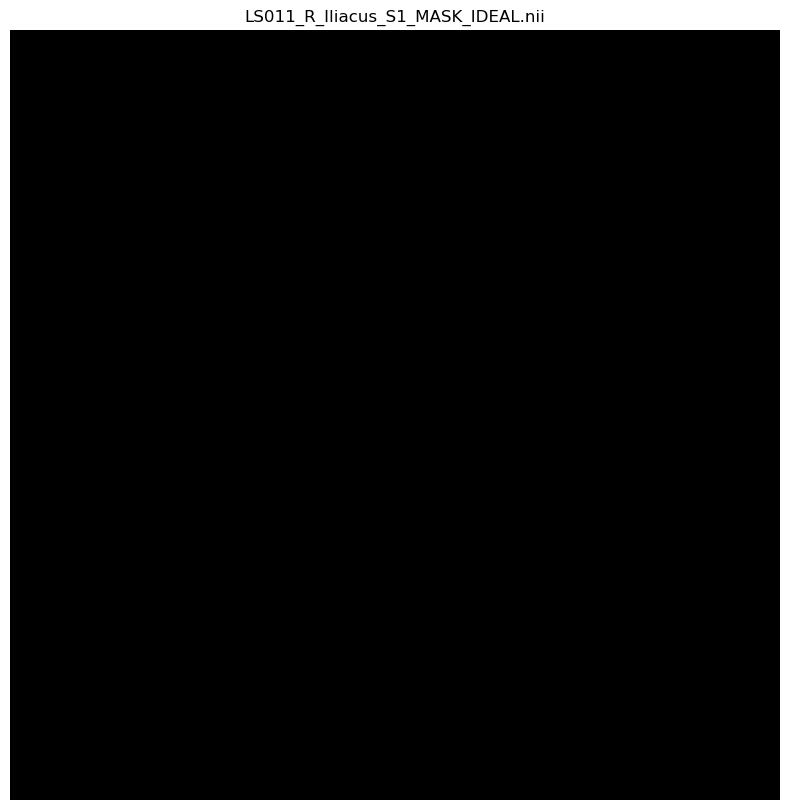

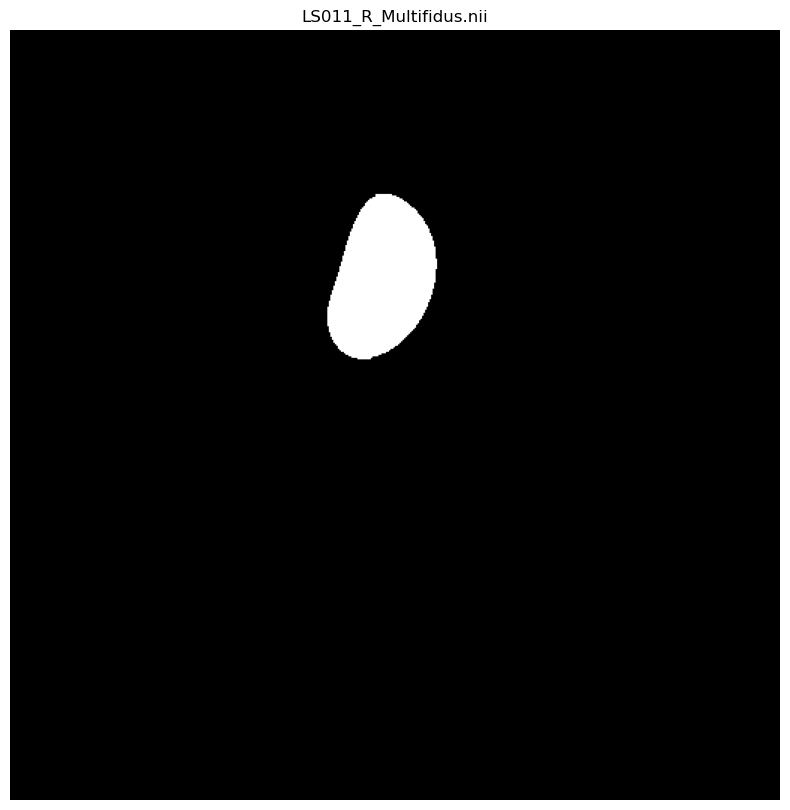

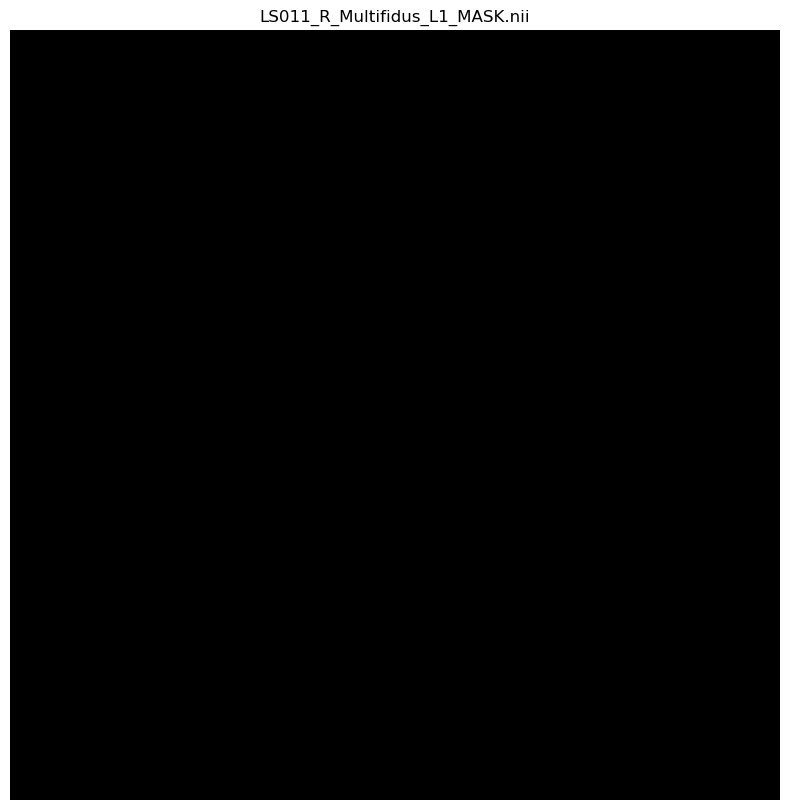

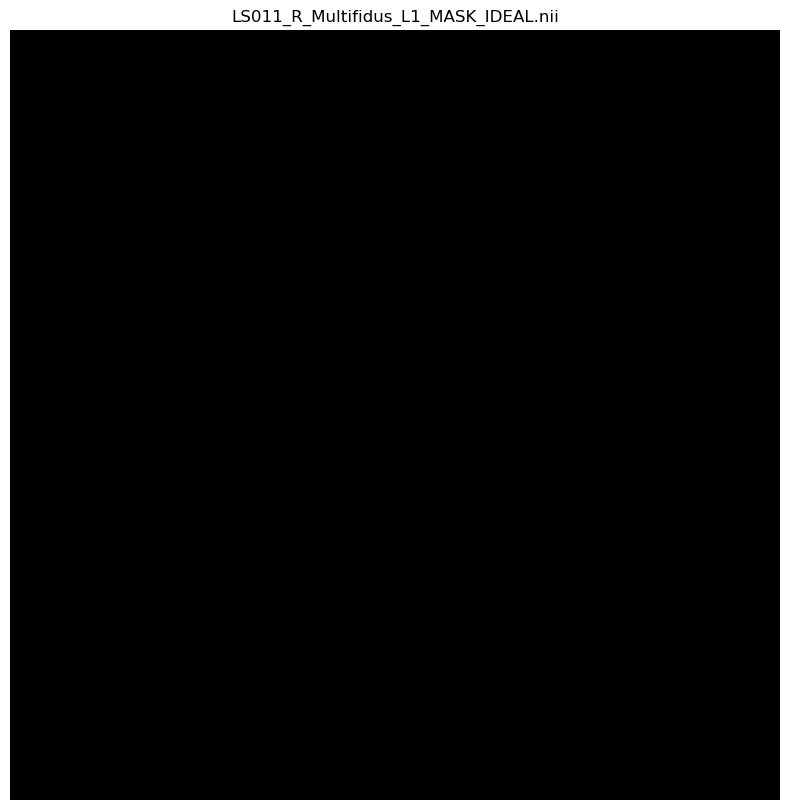

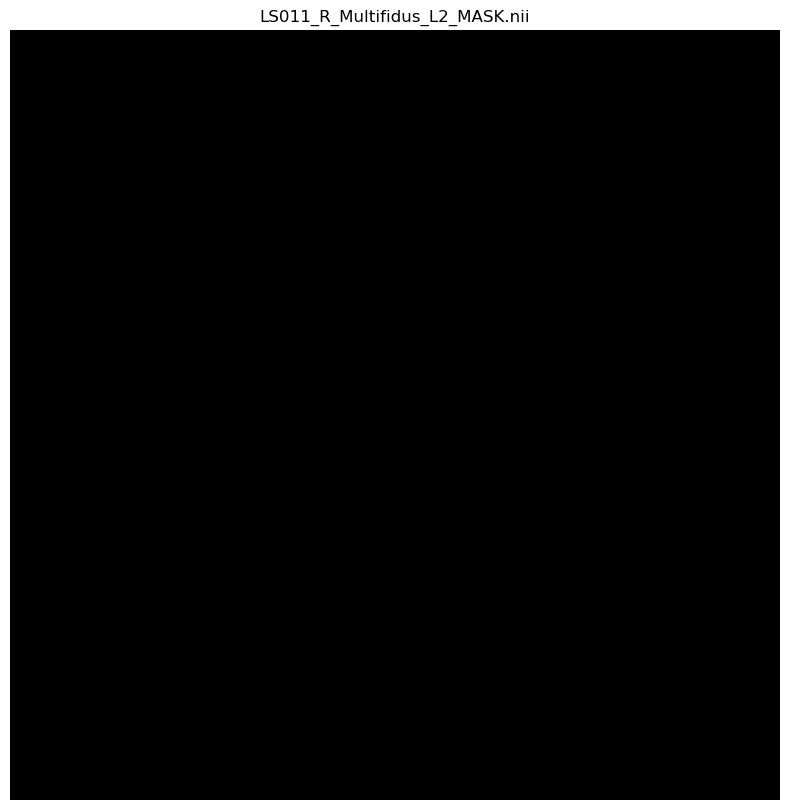

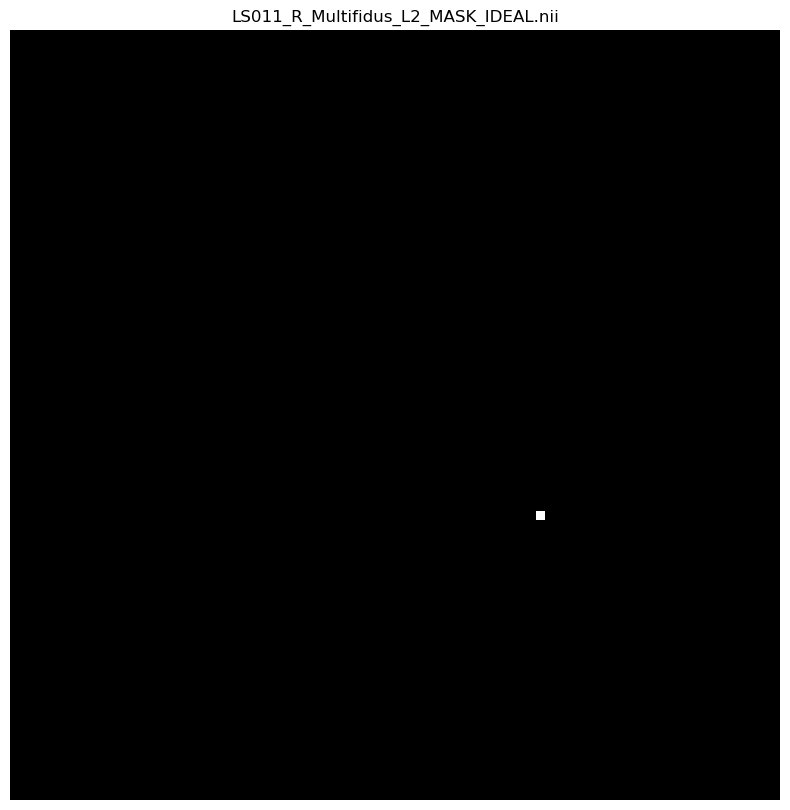

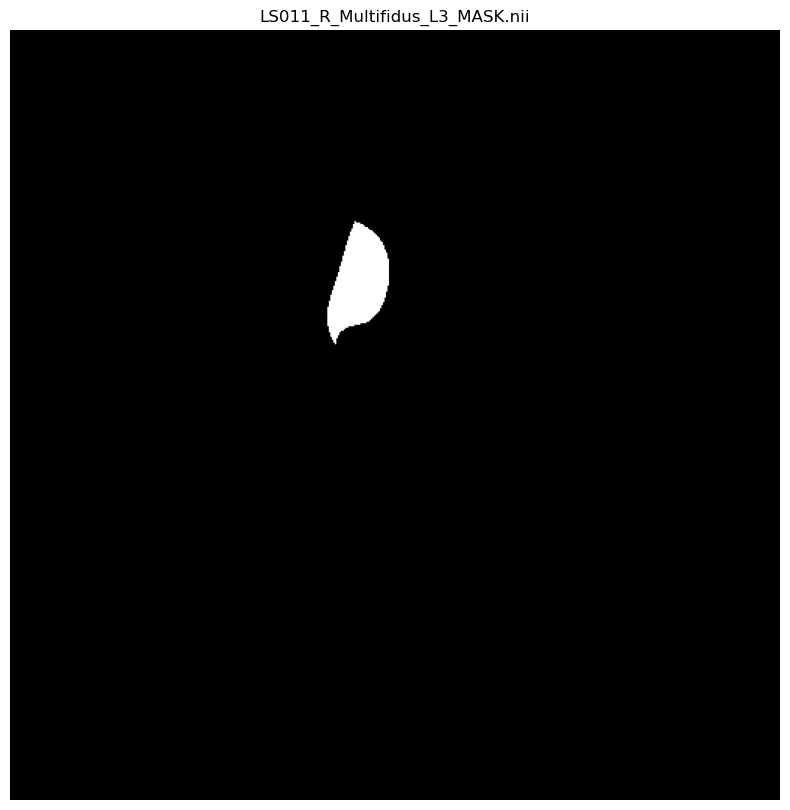

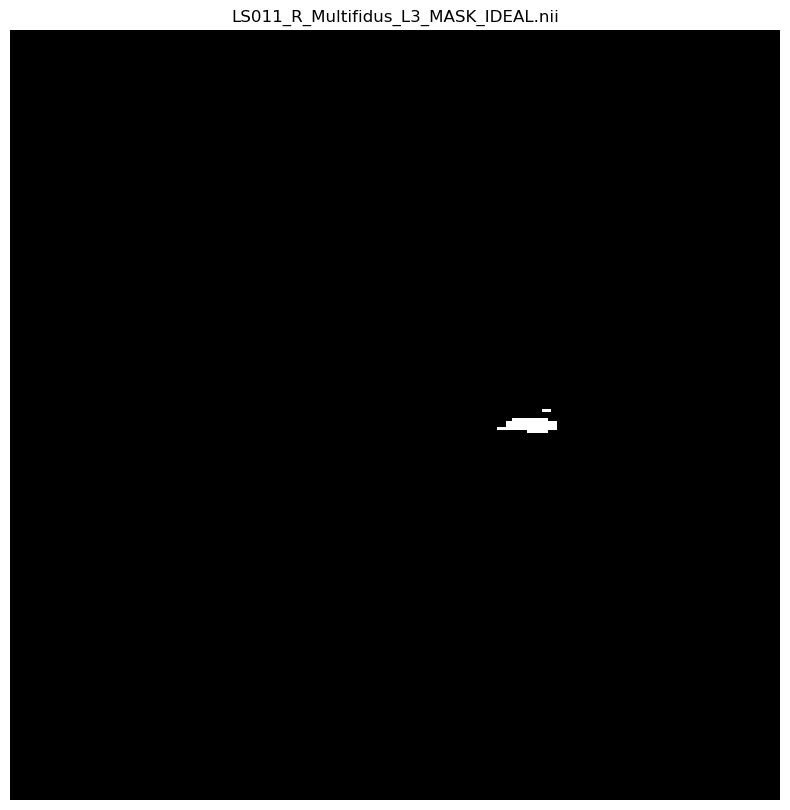

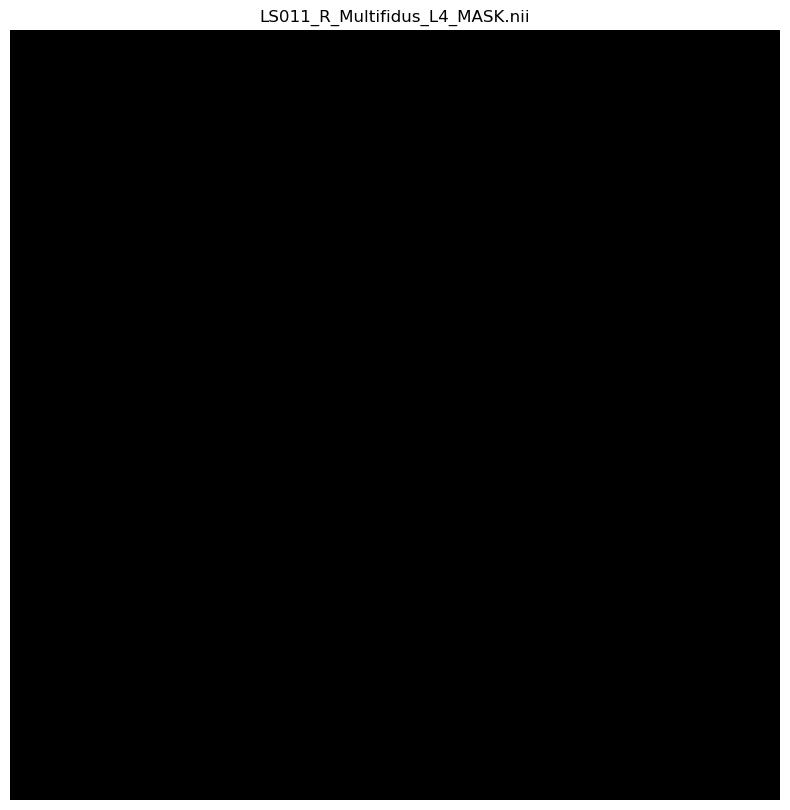

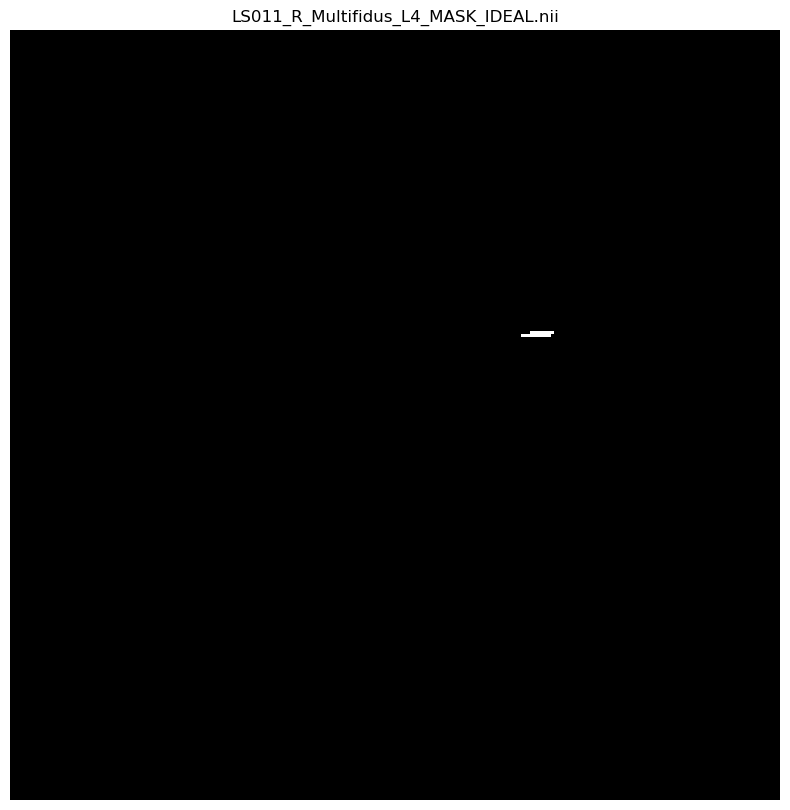

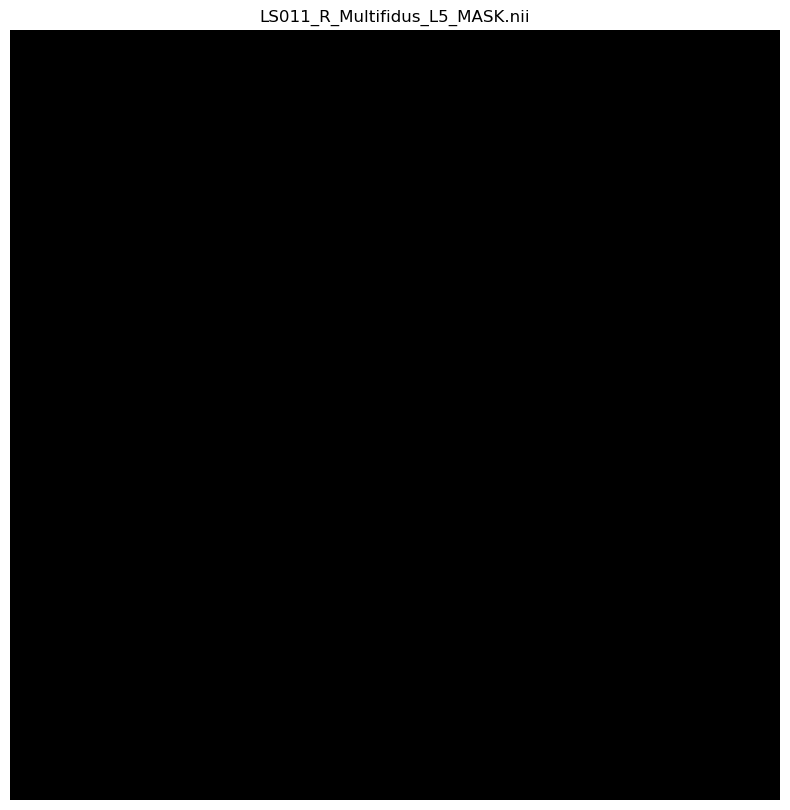

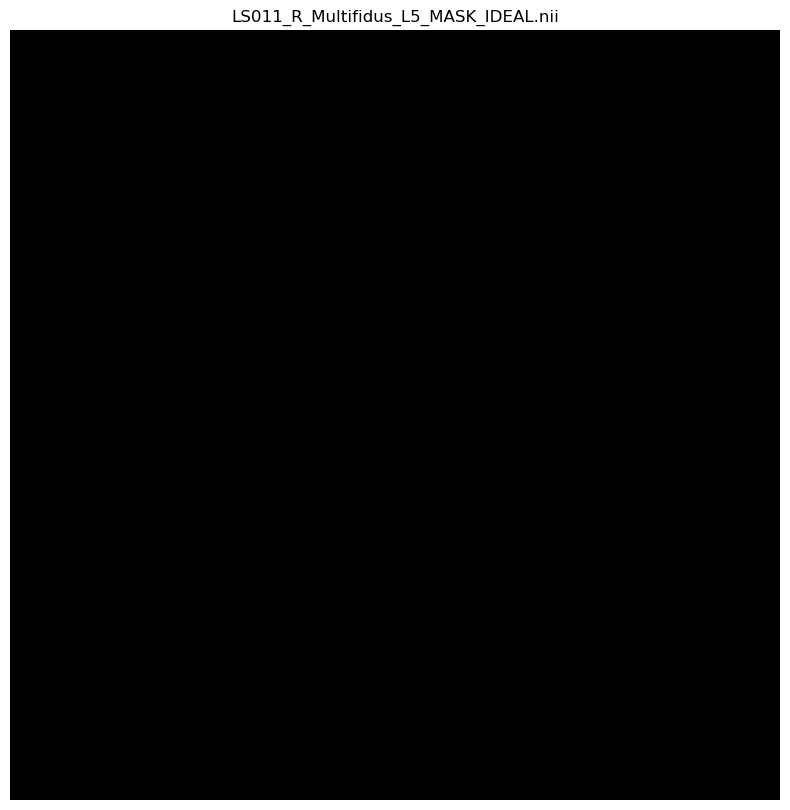

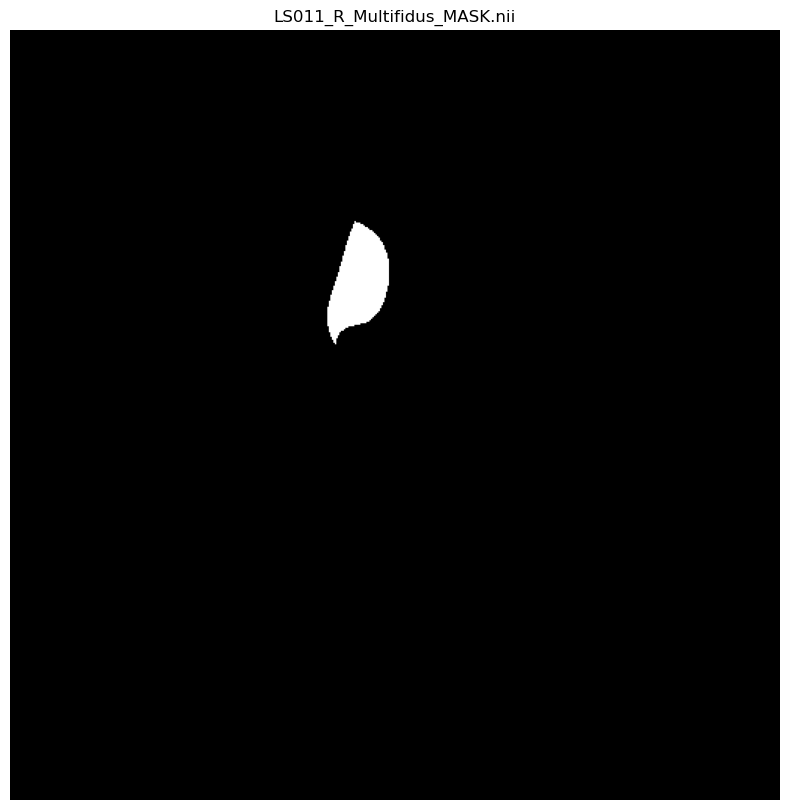

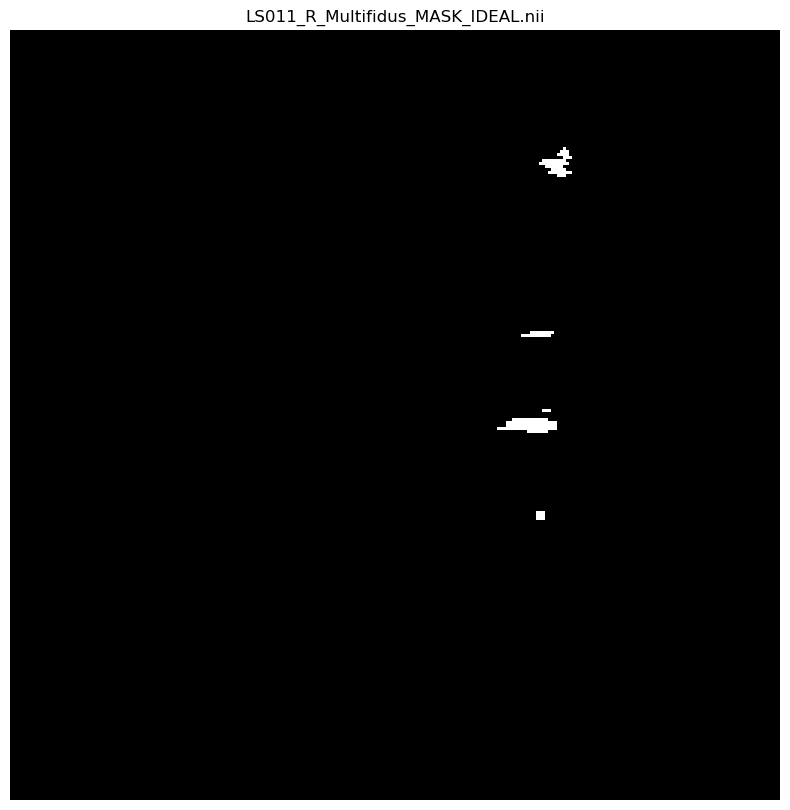

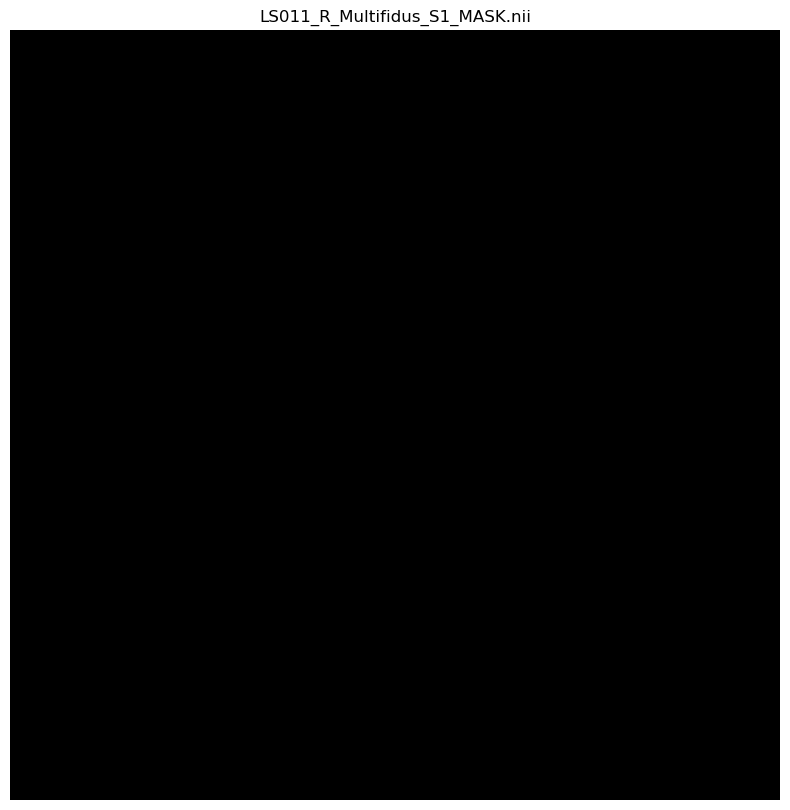

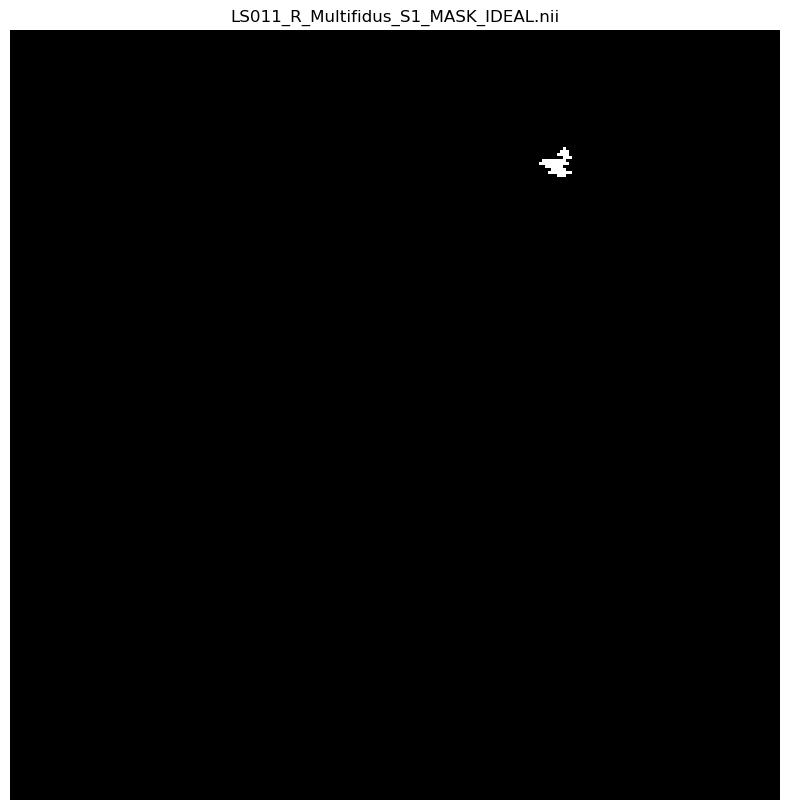

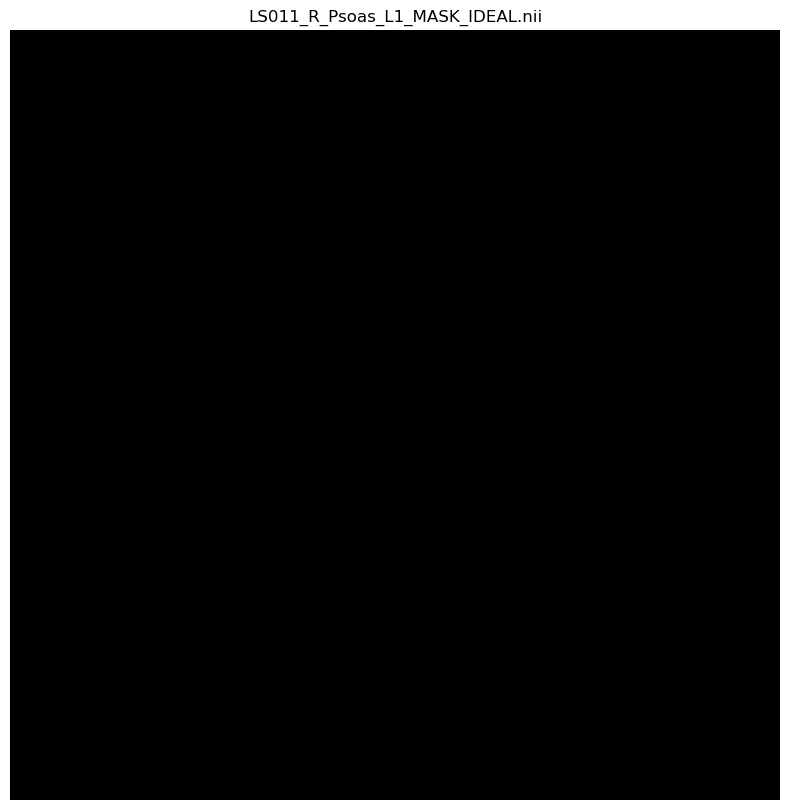

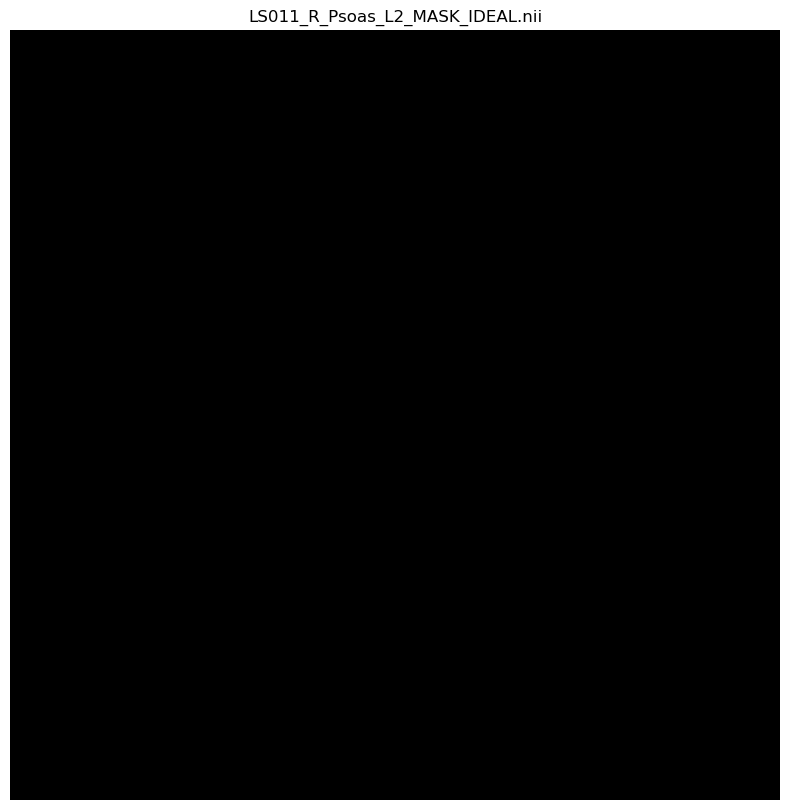

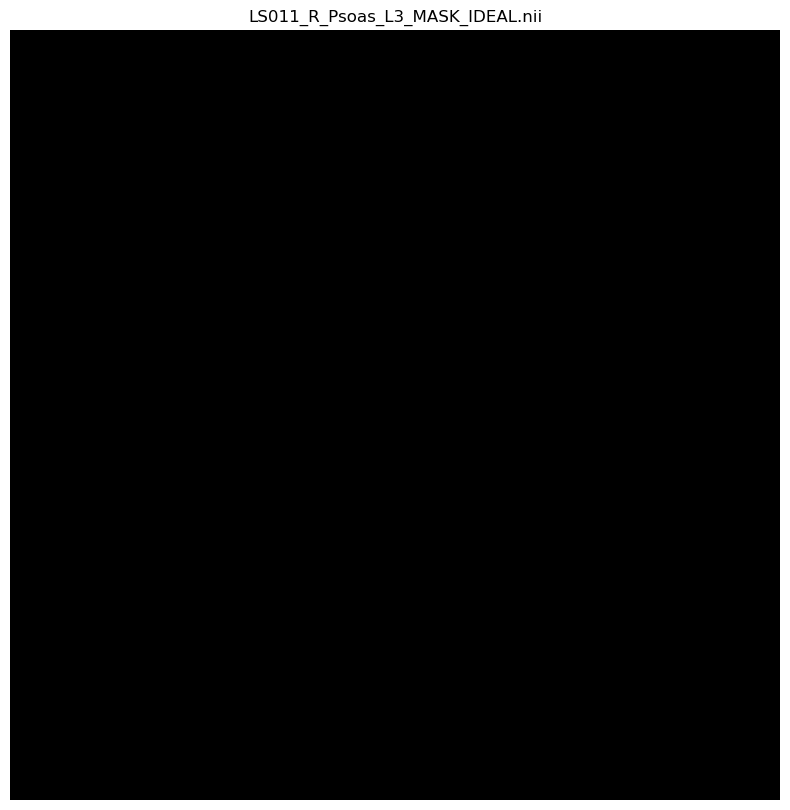

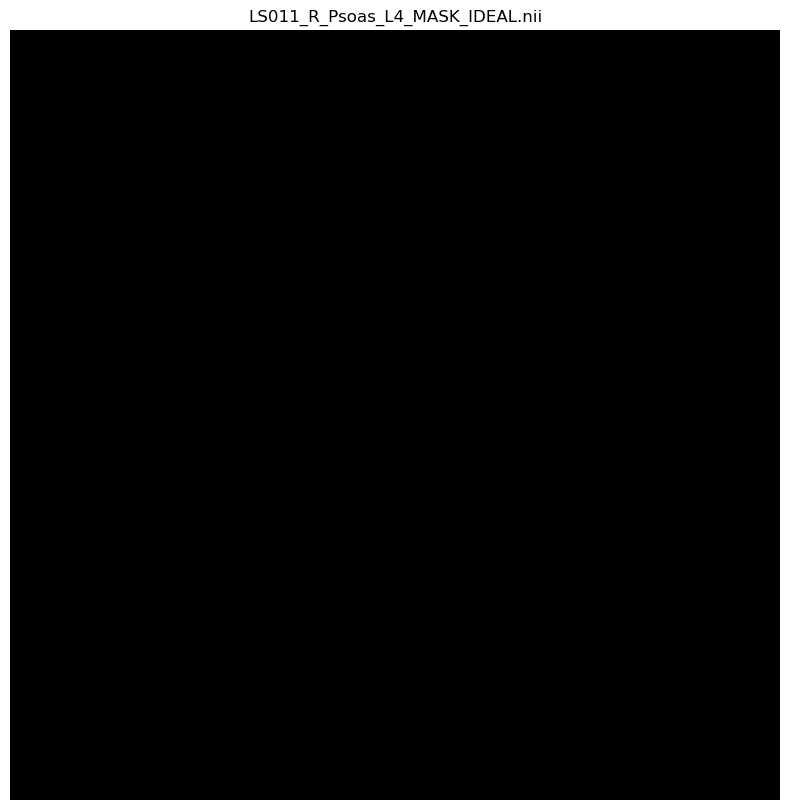

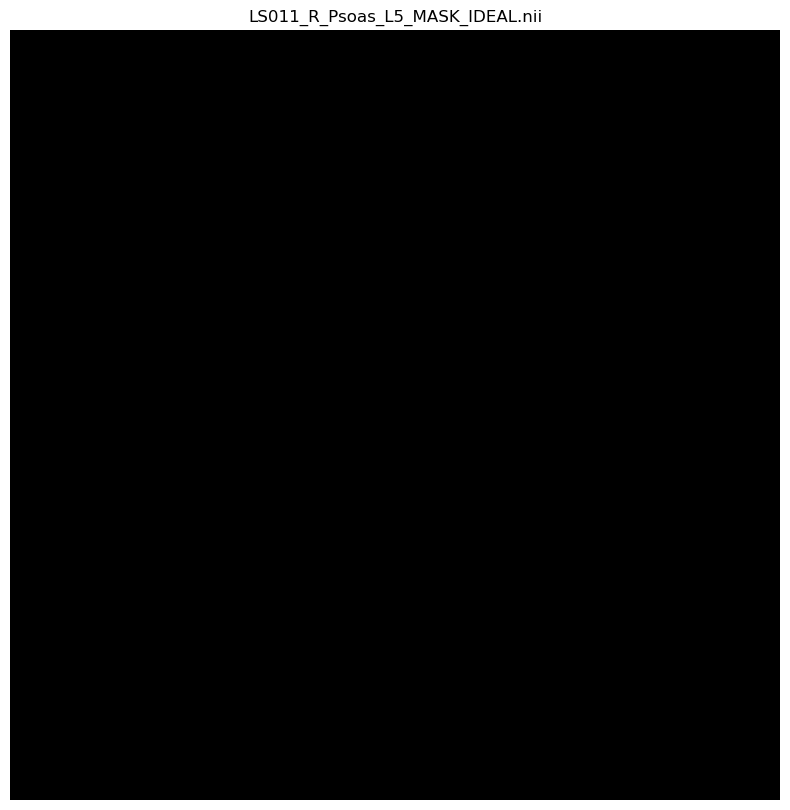

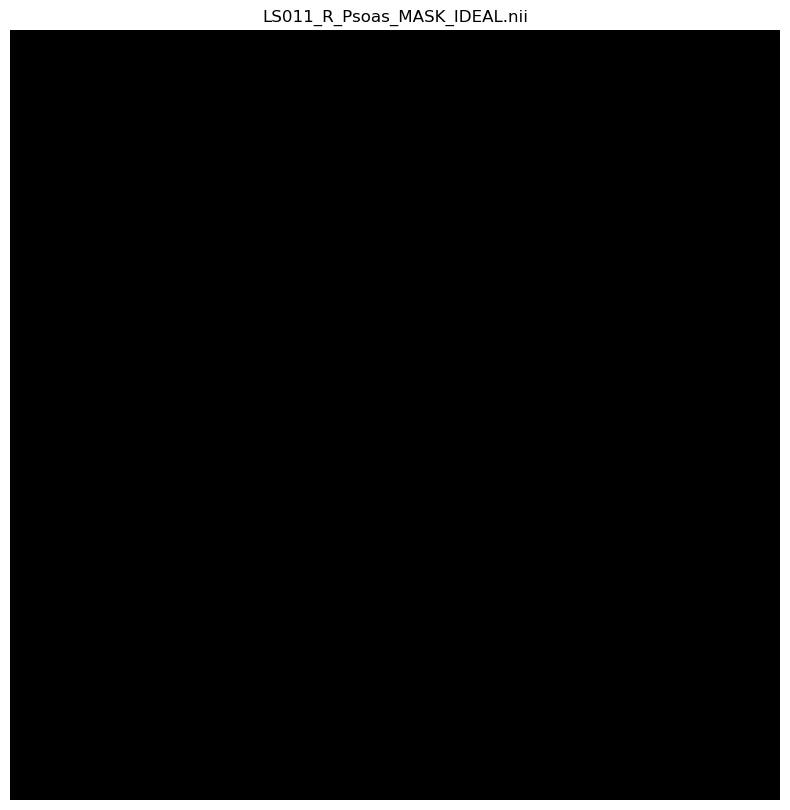

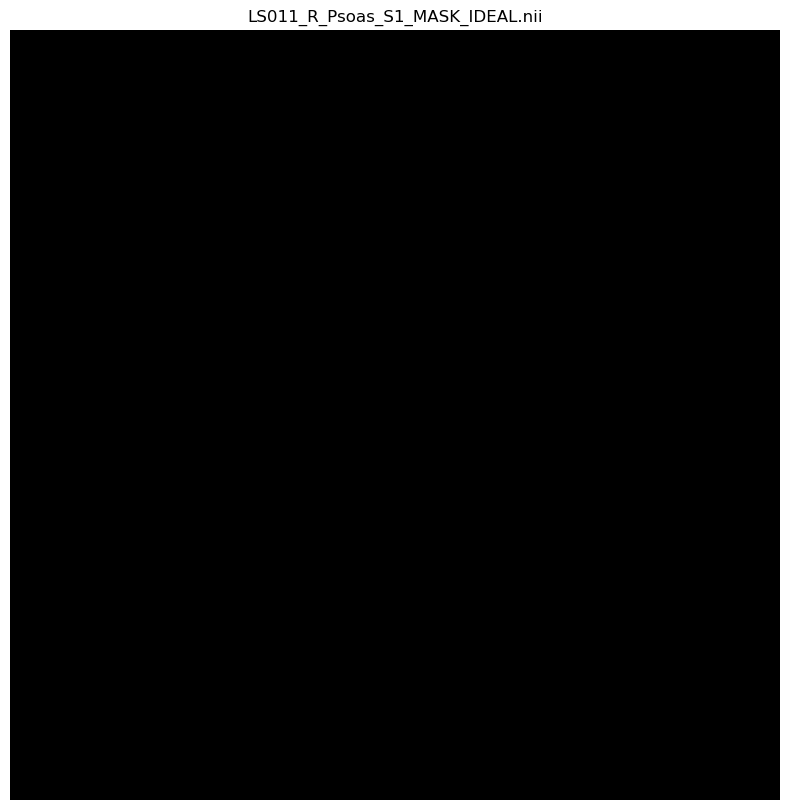

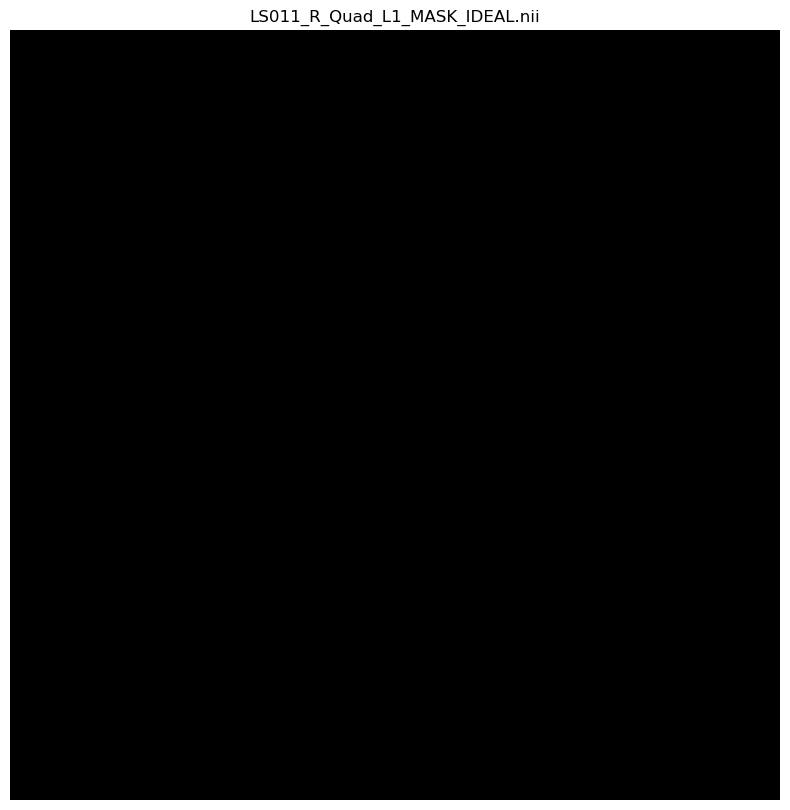

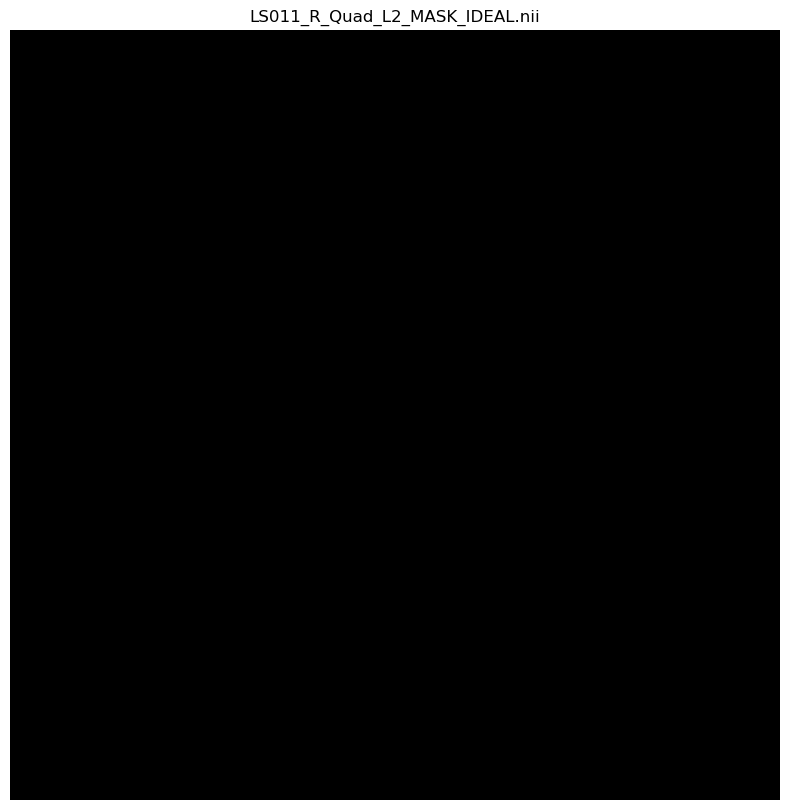

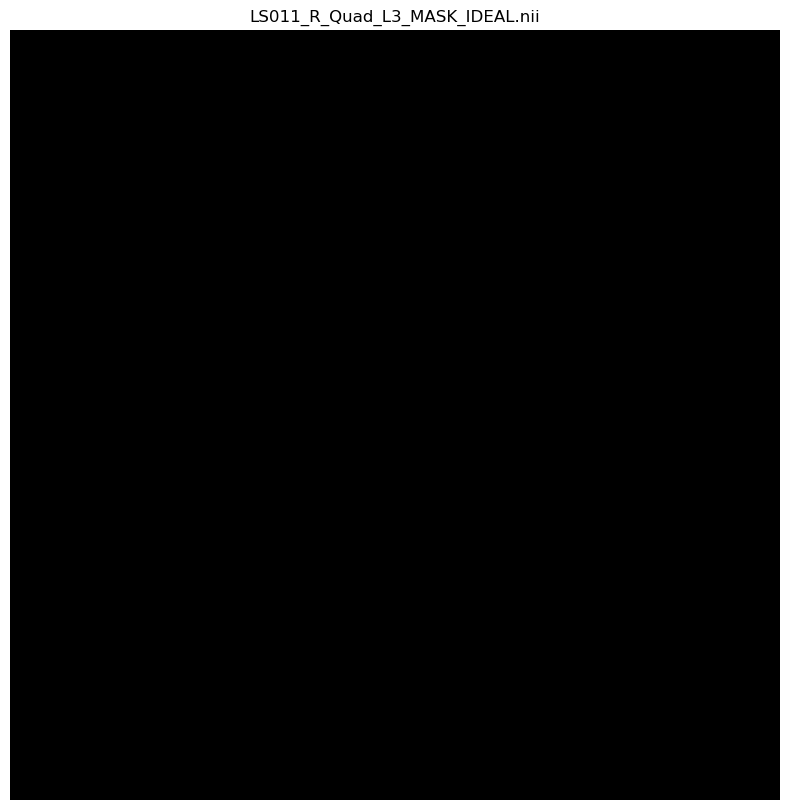

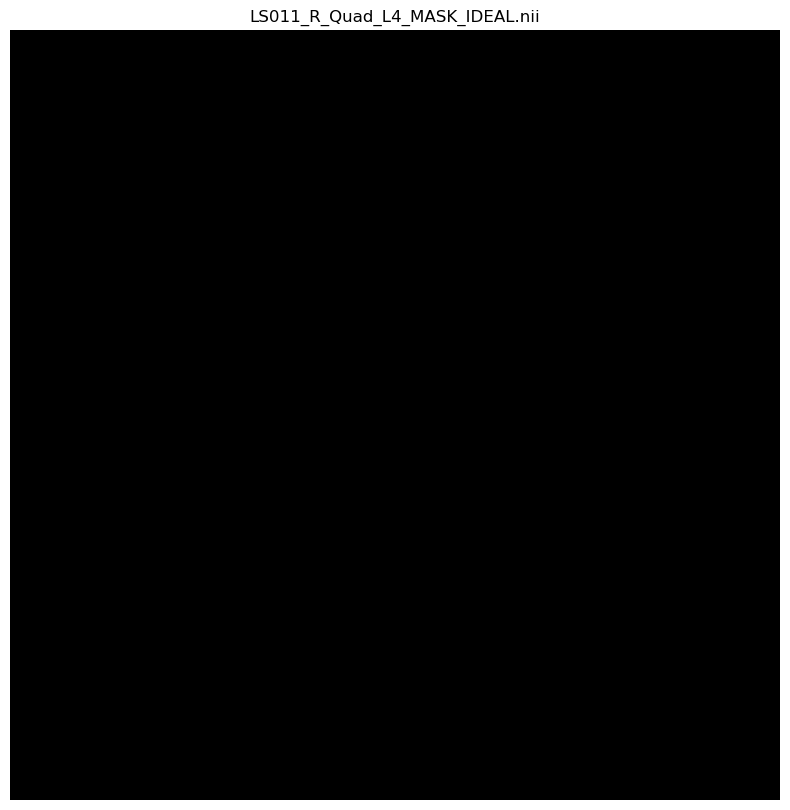

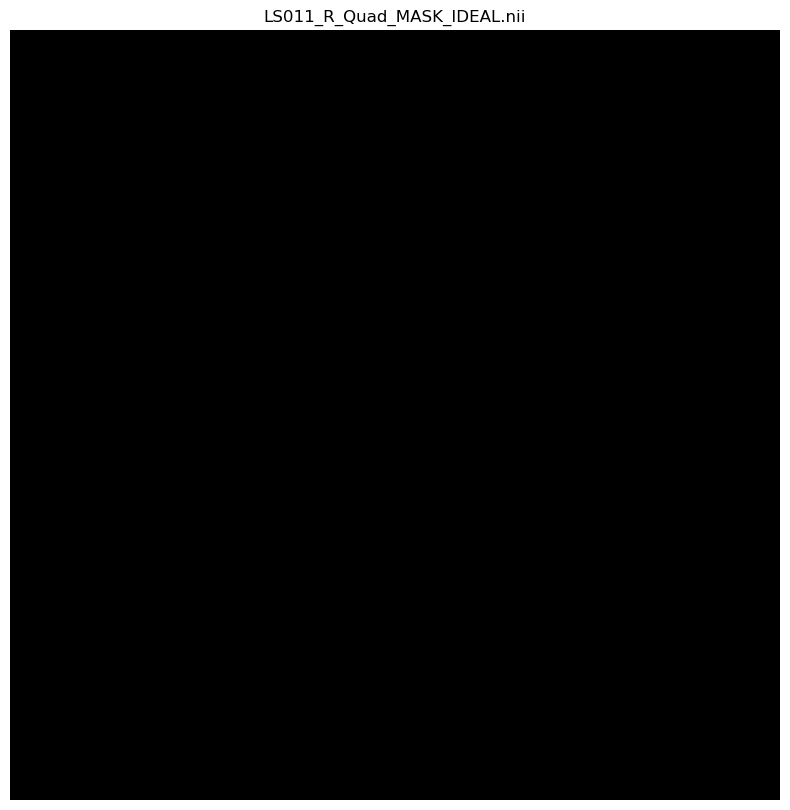

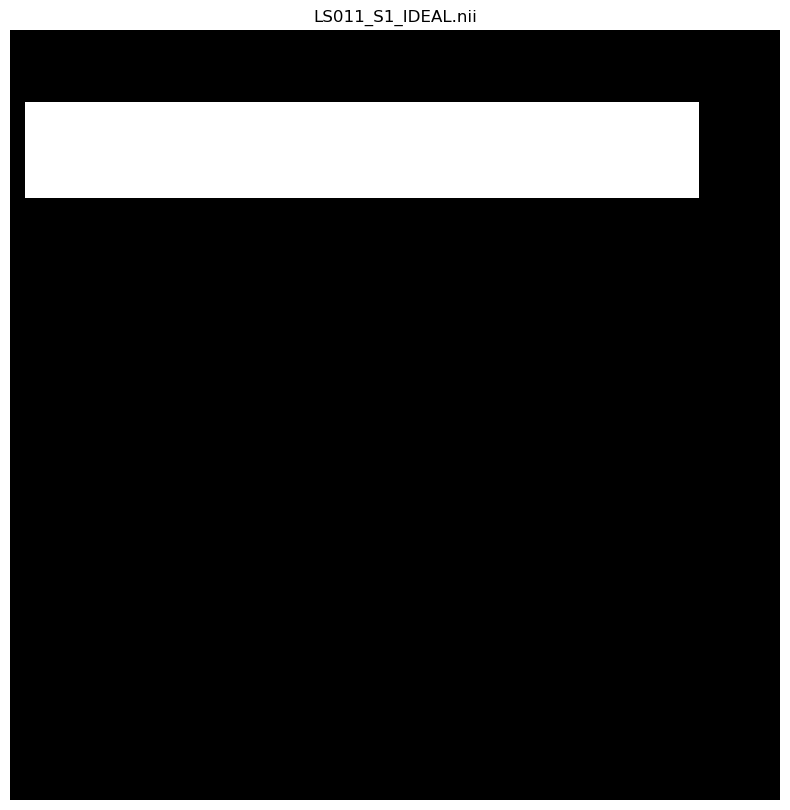

In [9]:
import os
import glob
import nibabel as nib
import matplotlib.pyplot as plt

def visualize_all_nifti_individual(subject_folder, slice_index=None):
    """
    Searches the subject_folder for all NIfTI files (*.nii and *.nii.gz),
    then loads and visualizes each file **individually** in its own
    10x10 figure.

    :param subject_folder: Path to the folder containing NIfTI files.
    :param slice_index:    The slice index to visualize. If None, 
                           uses the middle slice.
    """
    # Find all NIfTI files in the folder (both .nii and .nii.gz)
    nifti_files = sorted(glob.glob(os.path.join(subject_folder, '*.nii*')))

    if not nifti_files:
        print(f"No NIfTI files found in {subject_folder}")
        return

    for nifti_path in nifti_files:
        # Load the NIfTI file
        img = nib.load(nifti_path)
        data = img.get_fdata()

        # Determine which slice to display (assume Z dimension is data.shape[2])
        z_dim = data.shape[2]
        if slice_index is None:
            slice_idx = z_dim // 2  # middle slice
        else:
            slice_idx = min(slice_index, z_dim - 1)

        # Extract that slice
        slice_data = data[:, :, slice_idx]

        # Create a new figure for each file, 10x10 inches
        fig, ax = plt.subplots(figsize=(10, 10))

        # Display the slice
        ax.imshow(slice_data.T, cmap='gray', origin='lower')
        ax.set_title(os.path.basename(nifti_path), fontsize=12)
        ax.axis('off')

        # Show the figure (blocking). Close it to proceed to the next file.
        plt.show()

if __name__ == "__main__":
    subject_folder = "/Volumes/advent/test/LS011"
    # You can specify a particular slice index or leave it None for the middle slice
    visualize_all_nifti_individual(subject_folder, slice_index=None)


File: /Volumes/advent/test/SBT001_images.nii
Orientation: ('R', 'A', 'S')
File: /Volumes/advent/test/LS011/LS011_IDEALFat.nii
Orientation: ('P', 'I', 'R')
File: /Volumes/advent/test/LS011/LS011_IDEALWater.nii
Orientation: ('P', 'I', 'R')
Saved out-of-phase image to /Volumes/advent/test/LS011/LS011_IDEALOutOfPhase.nii


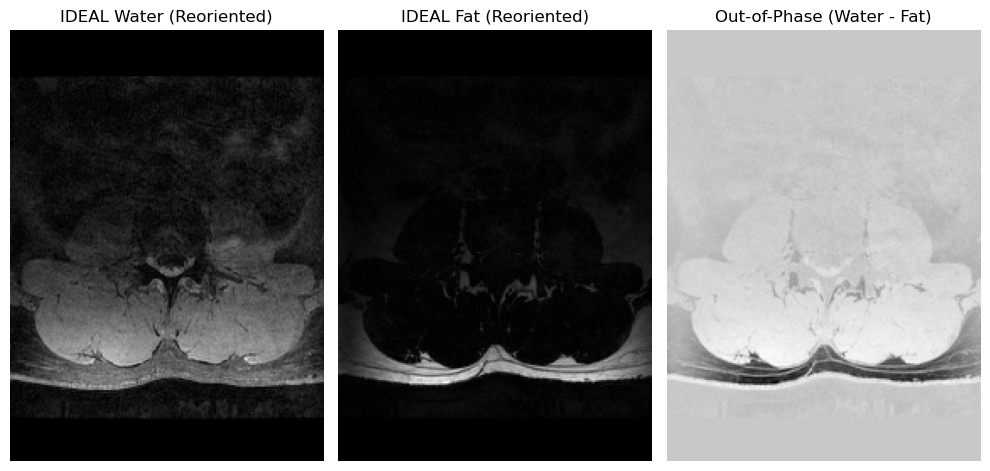

In [14]:
#!/usr/bin/env python

import os
import numpy as np
import nibabel as nib
from nibabel.orientations import aff2axcodes
from nibabel.processing import resample_from_to
import matplotlib.pyplot as plt

def check_orientation(nifti_path):
    img = nib.load(nifti_path)
    orientation = aff2axcodes(img.affine)
    print(f"File: {nifti_path}")
    print(f"Orientation: {orientation}")
    return orientation

def reorient_and_resample_to_match(img_path_reference, img_path_to_match):
    ref_img = nib.load(img_path_reference)
    match_img = nib.load(img_path_to_match)

    # Reorient both to RAS
    ref_img_ras = nib.as_closest_canonical(ref_img)
    match_img_ras = nib.as_closest_canonical(match_img)

    # Resample match_img_ras to ref_img_ras
    match_img_resampled = resample_from_to(match_img_ras, ref_img_ras)

    return ref_img_ras, match_img_resampled

def create_out_of_phase(img_water, img_fat, out_path):
    water_data = img_water.get_fdata()
    fat_data = img_fat.get_fdata()
    out_of_phase_data = water_data - fat_data

    out_of_phase_img = nib.Nifti1Image(out_of_phase_data, img_water.affine, img_water.header)
    nib.save(out_of_phase_img, out_path)
    print(f"Saved out-of-phase image to {out_path}")
    return out_of_phase_img

def visualize_three_nifti(img1, img2, img3, 
                         label1="Water", label2="Fat", label3="Out-of-Phase"):
    data1 = img1.get_fdata()
    data2 = img2.get_fdata()
    data3 = img3.get_fdata()

    mid1 = data1.shape[2] // 2
    mid2 = data2.shape[2] // 2
    mid3 = data3.shape[2] // 2

    slice1 = data1[:, :, mid1]
    slice2 = data2[:, :, mid2]
    slice3 = data3[:, :, mid3]

    fig, axes = plt.subplots(1, 3, figsize=(10, 5))

    axes[0].imshow(slice1.T, cmap='gray', origin='lower')
    axes[0].set_title(label1)
    axes[0].axis('off')

    axes[1].imshow(slice2.T, cmap='gray', origin='lower')
    axes[1].set_title(label2)
    axes[1].axis('off')

    axes[2].imshow(slice3.T, cmap='gray', origin='lower')
    axes[2].set_title(label3)
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Example usage:
    # 1) Check orientations
    check_orientation("/Volumes/advent/test/SBT001_images.nii")
    check_orientation("/Volumes/advent/test/LS011/LS011_IDEALFat.nii")
    check_orientation("/Volumes/advent/test/LS011/LS011_IDEALWater.nii")

    # 2) Reorient Fat and Water to the same orientation & dimension
    ref_img_ras, match_img_ras = reorient_and_resample_to_match(
        "/Volumes/advent/test/LS011/LS011_IDEALFat.nii",
        "/Volumes/advent/test/LS011/LS011_IDEALWater.nii"
    )

    # 3) Create out-of-phase image (Water - Fat)
    oop_img = create_out_of_phase(
        img_water=match_img_ras, 
        img_fat=ref_img_ras,
        out_path="/Volumes/advent/test/LS011/LS011_IDEALOutOfPhase.nii"
    )

    # 4) Visualize
    visualize_three_nifti(
        match_img_ras,
        ref_img_ras,
        oop_img,
        label1="IDEAL Water (Reoriented)",
        label2="IDEAL Fat (Reoriented)",
        label3="Out-of-Phase (Water - Fat)"
    )


Saved out-of-phase image to /Volumes/advent/test/LS011/LS011_IDEALOutOfPhase.nii


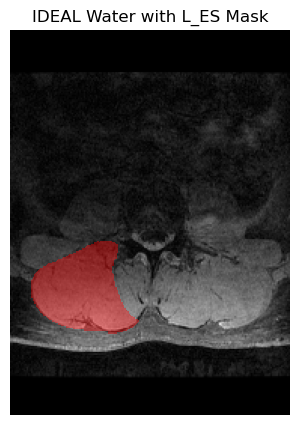

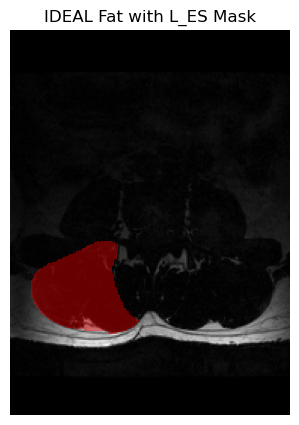

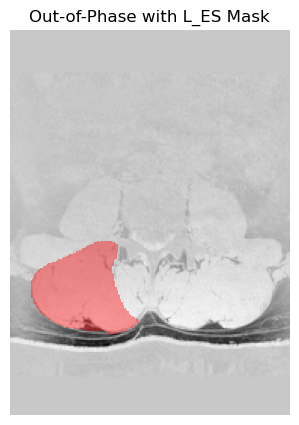

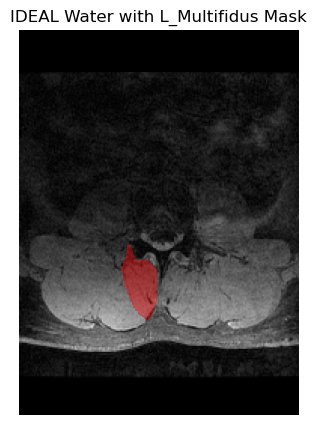

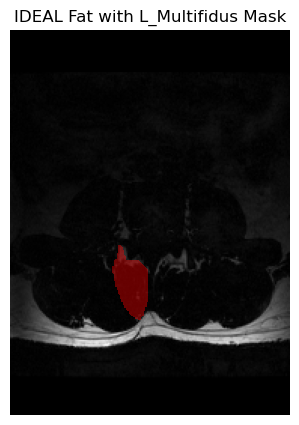

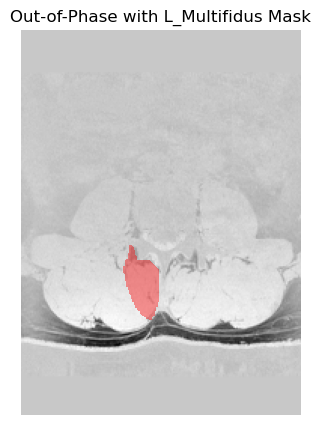

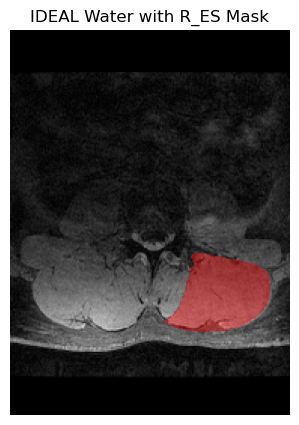

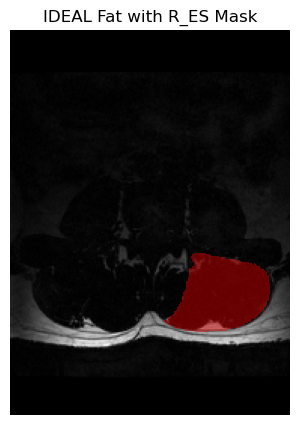

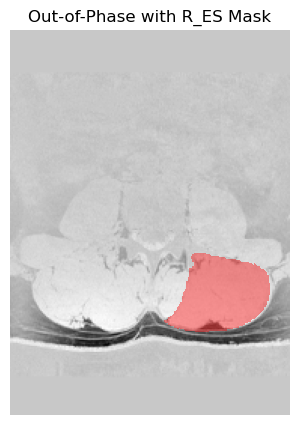

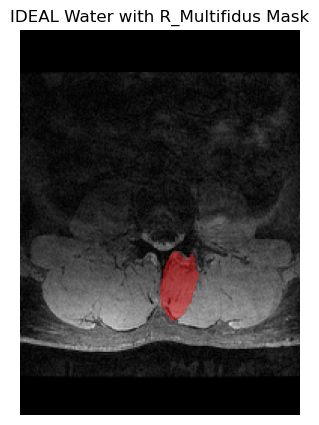

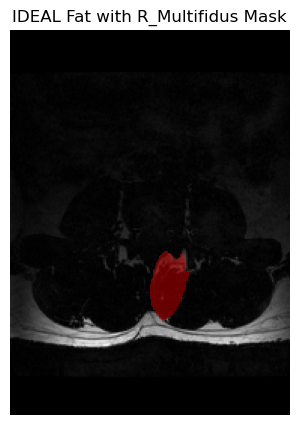

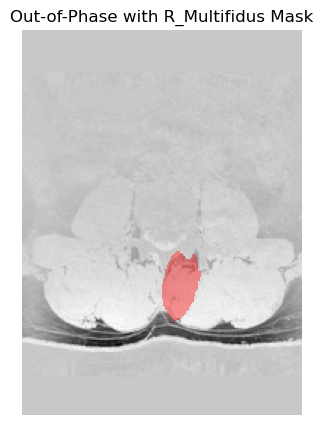

In [40]:
#!/usr/bin/env python

import os
import numpy as np
import nibabel as nib
from nibabel.orientations import aff2axcodes
from nibabel.processing import resample_from_to
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def check_orientation(nifti_path):
    """
    Loads a NIfTI file and prints its orientation codes.
    """
    img = nib.load(nifti_path)
    orientation = aff2axcodes(img.affine)
    print(f"File: {nifti_path}")
    print(f"Orientation: {orientation}")
    return orientation


def reorient_and_resample_to_match(img_path_reference, img_path_to_match):
    """
    Reorients both images to RAS and resamples the 'match' image to the dimensions of the 'reference' image.
    """
    ref_img = nib.load(img_path_reference)
    match_img = nib.load(img_path_to_match)

    # Reorient both to RAS
    ref_img_ras = nib.as_closest_canonical(ref_img)
    match_img_ras = nib.as_closest_canonical(match_img)

    # Resample match_img_ras to ref_img_ras
    match_img_resampled = resample_from_to(match_img_ras, ref_img_ras)

    return ref_img_ras, match_img_resampled


def create_out_of_phase(img_water, img_fat, out_path):
    """
    Creates an out-of-phase image by subtracting Fat from Water:
        Out-of-Phase = Water - Fat
    """
    water_data = img_water.get_fdata()
    fat_data = img_fat.get_fdata()
    out_of_phase_data = water_data - fat_data

    out_of_phase_img = nib.Nifti1Image(out_of_phase_data, img_water.affine, img_water.header)
    nib.save(out_of_phase_img, out_path)
    print(f"Saved out-of-phase image to {out_path}")
    return out_of_phase_img


def overlay_mask(image, mask, slice_idx, title):
    """
    Overlays a binary mask on an image for a specific slice.
    """
    image_data = image.get_fdata()
    mask_data = mask.get_fdata()

    slice_image = image_data[:, :, slice_idx]
    slice_mask = mask_data[:, :, slice_idx]

    plt.imshow(slice_image.T, cmap="gray", origin="lower")
    plt.imshow(slice_mask.T, cmap=ListedColormap(["none", "red"]), alpha=0.4, origin="lower")
    plt.title(title)
    plt.axis("off")
    plt.show()


if __name__ == "__main__":
    # Paths
    ideal_fat_path = "/Volumes/advent/test/LS011/LS011_IDEALFat.nii"
    ideal_water_path = "/Volumes/advent/test/LS011/LS011_IDEALWater.nii"
    mask_paths = {
        "L_ES": "/Volumes/advent/test/LS011/LS011_L_ES_MASK.nii",
        "L_Multifidus": "/Volumes/advent/test/LS011/LS011_L_Multifidus_MASK.nii",
        "R_ES": "/Volumes/advent/test/LS011/LS011_R_ES_MASK.nii",
        "R_Multifidus": "/Volumes/advent/test/LS011/LS011_R_Multifidus_MASK.nii"
    }

    # Reorient and resample IDEAL Fat and Water images
    ref_img_ras, match_img_ras = reorient_and_resample_to_match(ideal_fat_path, ideal_water_path)

    # Create out-of-phase image
    oop_img = create_out_of_phase(
        img_water=match_img_ras,
        img_fat=ref_img_ras,
        out_path="/Volumes/advent/test/LS011/LS011_IDEALOutOfPhase.nii"
    )

    # Overlay masks
    slice_idx = ref_img_ras.shape[2] // 2  # Middle slice
    for mask_name, mask_path in mask_paths.items():
        if not os.path.exists(mask_path):
            print(f"Skipping missing mask: {mask_name}")
            continue

        # Load and reorient mask
        mask_img = nib.load(mask_path)
        mask_ras = nib.as_closest_canonical(mask_img)

        # Resample mask to match IDEAL Fat dimensions
        mask_resampled = resample_from_to(mask_ras, ref_img_ras)

        # Overlay mask on IDEAL Water image
        overlay_mask(match_img_ras, mask_resampled, slice_idx, f"IDEAL Water with {mask_name} Mask")

        # Overlay mask on IDEAL Fat image
        overlay_mask(ref_img_ras, mask_resampled, slice_idx, f"IDEAL Fat with {mask_name} Mask")

        # Overlay mask on Out-of-Phase image
        overlay_mask(oop_img, mask_resampled, slice_idx, f"Out-of-Phase with {mask_name} Mask")


Saved out-of-phase image to /Volumes/advent/test/LS011/LS011_IDEALOutOfPhase.nii


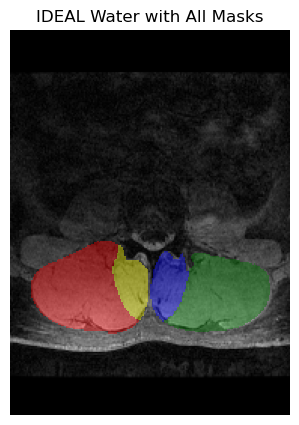

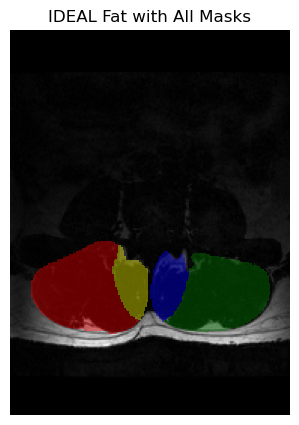

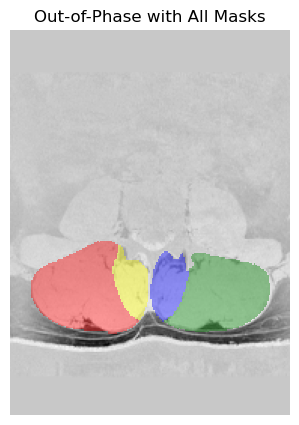

In [41]:
#!/usr/bin/env python

import os
import numpy as np
import nibabel as nib
from nibabel.orientations import aff2axcodes
from nibabel.processing import resample_from_to
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def check_orientation(nifti_path):
    """
    Loads a NIfTI file and prints its orientation codes.
    """
    img = nib.load(nifti_path)
    orientation = aff2axcodes(img.affine)
    print(f"File: {nifti_path}")
    print(f"Orientation: {orientation}")
    return orientation


def reorient_and_resample_to_match(img_path_reference, img_path_to_match):
    """
    Reorients both images to RAS and resamples the 'match' image to the dimensions of the 'reference' image.
    """
    ref_img = nib.load(img_path_reference)
    match_img = nib.load(img_path_to_match)

    # Reorient both to RAS
    ref_img_ras = nib.as_closest_canonical(ref_img)
    match_img_ras = nib.as_closest_canonical(match_img)

    # Resample match_img_ras to ref_img_ras
    match_img_resampled = resample_from_to(match_img_ras, ref_img_ras)

    return ref_img_ras, match_img_resampled


def create_out_of_phase(img_water, img_fat, out_path):
    """
    Creates an out-of-phase image by subtracting Fat from Water:
        Out-of-Phase = Water - Fat
    """
    water_data = img_water.get_fdata()
    fat_data = img_fat.get_fdata()
    out_of_phase_data = water_data - fat_data

    out_of_phase_img = nib.Nifti1Image(out_of_phase_data, img_water.affine, img_water.header)
    nib.save(out_of_phase_img, out_path)
    print(f"Saved out-of-phase image to {out_path}")
    return out_of_phase_img


def overlay_all_masks(image, masks_dict, slice_idx, title):
    """
    Overlays all masks on an image for a specific slice.
    Each mask is shown in a unique color.
    """
    image_data = image.get_fdata()
    slice_image = image_data[:, :, slice_idx]

    # Create a figure for visualization
    plt.imshow(slice_image.T, cmap="gray", origin="lower")

    # Overlay each mask with a unique color
    for mask_name, (mask_data, color) in masks_dict.items():
        slice_mask = mask_data[:, :, slice_idx]
        cmap = ListedColormap(["none", color])
        plt.imshow(slice_mask.T, cmap=cmap, alpha=0.4, origin="lower", interpolation="none")

    plt.title(title)
    plt.axis("off")
    plt.show()


if __name__ == "__main__":
    # Paths
    ideal_fat_path = "/Volumes/advent/test/LS011/LS011_IDEALFat.nii"
    ideal_water_path = "/Volumes/advent/test/LS011/LS011_IDEALWater.nii"
    mask_paths = {
        "L_ES": "/Volumes/advent/test/LS011/LS011_L_ES_MASK.nii",
        "L_Multifidus": "/Volumes/advent/test/LS011/LS011_L_Multifidus_MASK.nii",
        "R_ES": "/Volumes/advent/test/LS011/LS011_R_ES_MASK.nii",
        "R_Multifidus": "/Volumes/advent/test/LS011/LS011_R_Multifidus_MASK.nii"
    }
    mask_colors = {
        "L_ES": "red",
        "L_Multifidus": "yellow",
        "R_ES": "green",
        "R_Multifidus": "blue"
    }

    # Reorient and resample IDEAL Fat and Water images
    ref_img_ras, match_img_ras = reorient_and_resample_to_match(ideal_fat_path, ideal_water_path)

    # Create out-of-phase image
    oop_img = create_out_of_phase(
        img_water=match_img_ras,
        img_fat=ref_img_ras,
        out_path="/Volumes/advent/test/LS011/LS011_IDEALOutOfPhase.nii"
    )

    # Prepare masks for visualization
    masks_dict = {}
    slice_idx = ref_img_ras.shape[2] // 2  # Middle slice

    for mask_name, mask_path in mask_paths.items():
        if not os.path.exists(mask_path):
            print(f"Skipping missing mask: {mask_name}")
            continue

        # Load and reorient mask
        mask_img = nib.load(mask_path)
        mask_ras = nib.as_closest_canonical(mask_img)

        # Resample mask to match IDEAL Fat dimensions
        mask_resampled = resample_from_to(mask_ras, ref_img_ras)
        masks_dict[mask_name] = (mask_resampled.get_fdata(), mask_colors[mask_name])

    # overlay all masks on IDEAL Water
    overlay_all_masks(match_img_ras, masks_dict, slice_idx, "IDEAL Water with All Masks")

    # oerlay all masks on IDEAL Fat
    overlay_all_masks(ref_img_ras, masks_dict, slice_idx, "IDEAL Fat with All Masks")

    # overlay all masks on Out-of-Phase
    overlay_all_masks(oop_img, masks_dict, slice_idx, "Out-of-Phase with All Masks")


Saved out-of-phase image to: /Volumes/advent/processed_data/LS011/LS011_temp_oop.nii


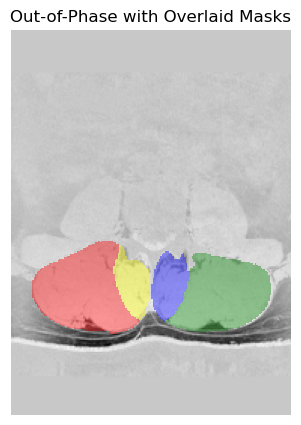

Saved main out-of-phase image to: /Volumes/advent/processed_data/LS011/LS011_OOP.nii
Saved masked image to: /Volumes/advent/processed_data/LS011/LS011_L_ES_II.nii
Saved masked image to: /Volumes/advent/processed_data/LS011/LS011_L_Mult_II.nii
Saved masked image to: /Volumes/advent/processed_data/LS011/LS011_R_ES_II.nii
Saved masked image to: /Volumes/advent/processed_data/LS011/LS011_R_Mult_II.nii
Done.


In [68]:
#!/usr/bin/env python

import os
import numpy as np
import nibabel as nib
from nibabel.orientations import aff2axcodes
from nibabel.processing import resample_from_to
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

###############################################################################
#                               HELPER FUNCTIONS                              #
###############################################################################

def check_orientation(nifti_path):
    """
    Loads a NIfTI file and prints its orientation codes.
    Useful for debugging orientation issues.
    """
    img = nib.load(nifti_path)
    orientation = aff2axcodes(img.affine)
    print(f"File: {nifti_path}")
    print(f"Orientation: {orientation}")
    return orientation

def reorient_and_resample_to_match(img_path_reference, img_path_to_match):
    """
    1) Loads two NIfTI files.
    2) Reorients both to RAS.
    3) Resamples the 'match' image to the same shape/affine as the 'reference' image.
    
    Returns:
        (ref_img_ras, match_img_resampled)
    """
    ref_img = nib.load(img_path_reference)
    match_img = nib.load(img_path_to_match)

    # Reorient both to RAS
    ref_img_ras = nib.as_closest_canonical(ref_img)
    match_img_ras = nib.as_closest_canonical(match_img)

    # Resample match_img_ras to ref_img_ras
    match_img_resampled = resample_from_to(match_img_ras, ref_img_ras)

    return ref_img_ras, match_img_resampled

def create_out_of_phase(img_water, img_fat, out_path):
    """
    Creates an out-of-phase image by subtracting:
        Out-of-Phase = Water - Fat
    
    Saves the result to 'out_path' and returns the in-memory nibabel image.
    """
    water_data = img_water.get_fdata()
    fat_data = img_fat.get_fdata()
    out_of_phase_data = water_data - fat_data

    # Construct an out-of-phase nibabel image
    out_of_phase_img = nib.Nifti1Image(out_of_phase_data,
                                       img_water.affine,
                                       img_water.header)

    # Ensure the directory exists, then save
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    nib.save(out_of_phase_img, out_path)
    print(f"Saved out-of-phase image to: {out_path}")

    return out_of_phase_img

def overlay_all_masks(base_img, masks_dict, slice_idx, title):
    """
    Displays a single slice ('slice_idx') from base_img, and overlays each
    mask in 'masks_dict'. Each mask is assigned its own color and partially
    transparent so you can see overlaps.
    """
    base_data = base_img.get_fdata()
    slice_base = base_data[:, :, slice_idx]

    plt.figure(figsize=(5, 5))
    plt.imshow(slice_base.T, cmap="gray", origin="lower")

    # Overlay each mask
    for mask_name, (mask_data, color) in masks_dict.items():
        slice_mask = mask_data[:, :, slice_idx]
        cmap = ListedColormap(["none", color])  # 2-color colormap
        plt.imshow(slice_mask.T, cmap=cmap, alpha=0.4, origin="lower", interpolation="none")

    plt.title(title)
    plt.axis("off")
    plt.show()

def save_processed_images(subject_name, base_img, masks_dict, output_folder):
    """
    Saves the 'base_img' and the masked images. 

    - The base image is saved as '<subject_name>_OOP.nii' (Out-of-Phase).
    - Each mask is saved as '<subject_name>_<mask_name>.nii'.
    """
    os.makedirs(output_folder, exist_ok=True)

    # 1) Save the base (Out-of-Phase) image
    oop_path = os.path.join(output_folder, f"{subject_name}_OOP.nii")
    nib.save(base_img, oop_path)
    print(f"Saved main out-of-phase image to: {oop_path}")

    # 2) Save each masked image
    base_data = base_img.get_fdata()
    for mask_name, (mask_data, _) in masks_dict.items():
        # Create a masked volume: 
        # if mask_data > 0, take from base_data; otherwise 0
        masked_data = np.where(mask_data > 0, base_data, 0)
        masked_img = nib.Nifti1Image(masked_data,
                                     base_img.affine,
                                     base_img.header)

        # e.g. LS011_L_ES_II.nii, LS011_R_ES_II.nii, etc.
        mask_output_path = os.path.join(output_folder,
                                        f"{subject_name}_{mask_name}.nii")
        nib.save(masked_img, mask_output_path)
        print(f"Saved masked image to: {mask_output_path}")

###############################################################################
#                                 MAIN SCRIPT                                 #
###############################################################################

if __name__ == "__main__":

    # ----------------- Things to change ------------------
    subject_name = "LS011"
    subject_folder = f"/Volumes/advent/test/{subject_name}"

    # Input images
    ideal_fat_path = os.path.join(subject_folder, f"{subject_name}_IDEALFat.nii")
    ideal_water_path = os.path.join(subject_folder, f"{subject_name}_IDEALWater.nii")

    # Masks
    mask_paths = {
        "L_ES_II":    os.path.join(subject_folder, f"{subject_name}_L_ES_MASK.nii"),
        "L_Mult_II":  os.path.join(subject_folder, f"{subject_name}_L_Multifidus_MASK.nii"),
        "R_ES_II":    os.path.join(subject_folder, f"{subject_name}_R_ES_MASK.nii"),
        "R_Mult_II":  os.path.join(subject_folder, f"{subject_name}_R_Multifidus_MASK.nii"),
    }
    mask_colors = {
        "L_ES_II":   "red",
        "L_Mult_II": "yellow",
        "R_ES_II":   "green",
        "R_Mult_II": "blue",
    }

    # Where to save the final images
    processed_data_root = "/Volumes/advent/processed_data"
    output_folder = os.path.join(processed_data_root, subject_name)

    # Whether or not to visualize slices
    DO_VISUALIZATION = True

    # -----------------------------------------------------------

    # (Optional) Check orientations for debugging
    # check_orientation(ideal_fat_path)
    # check_orientation(ideal_water_path)

    # Reorient/resample Fat & Water images to match each other
    fat_img_ras, water_img_matched_ras = reorient_and_resample_to_match(
        img_path_reference=ideal_fat_path,
        img_path_to_match=ideal_water_path
    )

    # Create Out-of-Phase (OOP) = Water - Fat
    # save it under the subject's output folder, with "OOP" in the name.
    # But note also save again in 'save_processed_images'. To avoid confusion,
    # we might temporarily save it as a separate file (or skip saving here).
    # For demonstration, let's save it to a temp location:
    temp_oop_path = os.path.join(output_folder, f"{subject_name}_temp_oop.nii")
    oop_img = create_out_of_phase(
        img_water=water_img_matched_ras,
        img_fat=fat_img_ras,
        out_path=temp_oop_path
    )

    # Prepare dictionary: mask_name -> (mask_array, color)
    masks_dict = {}
    for mask_name, mask_path in mask_paths.items():
        if not os.path.exists(mask_path):
            print(f"[WARNING] Skipping missing mask: {mask_name}")
            continue

        # Load and reorient mask
        mask_img = nib.load(mask_path)
        mask_ras = nib.as_closest_canonical(mask_img)

        # Resample mask to match the OOP image (since OOP is essentially the shape of fat_img_ras)
        mask_resampled = resample_from_to(mask_ras, fat_img_ras)
        mask_data = mask_resampled.get_fdata()

        masks_dict[mask_name] = (mask_data, mask_colors[mask_name])

    # (Optional) Visualize in the middle slice
    if DO_VISUALIZATION:
        slice_idx = oop_img.shape[2] // 2  # mid axial slice

        overlay_all_masks(oop_img,
                          masks_dict,
                          slice_idx,
                          title="Out-of-Phase with Overlaid Masks")

    # Save all images in the subject's folder
    # This will:
    #  (1) Save the OOP as <subject_name>_OOP.nii
    #  (2) Save each mask-based extracted volume as <subject_name>_<mask_name>.nii
    save_processed_images(subject_name, oop_img, masks_dict, output_folder)

    print("Done.")
